# 1. Í∞úÎ∞ú ÌôòÍ≤Ω ÏÑ∏ÌåÖÌïòÍ∏∞

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


In [2]:
import matplotlib.font_manager as fm

# ÏÇ¨Ïö©Ìï† ÌïúÍ∏Ä Ìè∞Ìä∏ ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï (Ïòà: ÏúàÎèÑÏö∞Ïùò Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# Ìè∞Ìä∏ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
font_name = fm.FontProperties(fname=font_path).get_name()

print(f"Í∞ÄÏ†∏Ïò® Ìè∞Ìä∏ Ïù¥Î¶Ñ: {font_name}")

# matplotlibÏùò rcParams ÏÑ§Ï†ïÏùÑ ÌÜµÌï¥ Ìè∞Ìä∏ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ ÏÑ§Ï†ï

print(f"matplotlib Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: {plt.rcParams['font.family']}")

Í∞ÄÏ†∏Ïò® Ìè∞Ìä∏ Ïù¥Î¶Ñ: Malgun Gothic
matplotlib Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: ['Malgun Gothic']


# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞

In [3]:
df = "C:/Users/mmtjs/Downloads/train_df.csv"

In [4]:
try:
    df = pd.read_csv(df, encoding='utf-8', on_bad_lines='skip')
    print("UTF-8 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.")
except UnicodeDecodeError:
    df = pd.read_csv(df, encoding='cp949', on_bad_lines='skip')
    print("CP949 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.")

UTF-8 Ïù∏ÏΩîÎî©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê ÏÑ±Í≥µÌñàÏäµÎãàÎã§.


In [5]:
df

date  line  station_number station_name direction  stn   ta  \
0         2021010100     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.6   
1         2021010105     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.3   
2         2021010106     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.3   
3         2021010107     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.1   
4         2021010108     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -8.5   
...              ...   ...             ...          ...       ...  ...  ...   
15589828  2023123119     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.6   
15589829  2023123120     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.0   
15589830  2023123121     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.6   
15589831  2023123122     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.8   
15589832  2023123123     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -1.3   

             wd   ws  rn_day  rn_hr1      hm        si   chi  congestion  \
0         291.1  3.3     0.0     0.0  52.477  0.184300 -12.6           0   
1         124.7  2.4     0.0     0.0  70.292  0.242800 -10.3           1   
2         126.2  1.7     0.0     0.0  55.452  0.302100 -10.1           2   
3         145.7  1.3     0.0     0.0  51.202  0.605900  -9.7           3   
4         194.2  0.6     0.0     0.0  62.856  0.000000  -9.7           3   
...         ...  ...     ...     ...     ...       ...   ...         ...   
15589828    0.0  0.0     7.0     0.0  83.100  0.224000   0.0          18   
15589829  354.7  0.0     7.0     0.0  84.700  0.064700  -0.6          17   
15589830    0.0  0.0     7.0     0.0  85.100  0.160700  -1.1          21   
15589831    0.0  0.0     7.0     0.0  85.600  0.198200  -1.3          18   
15589832  110.7  0.1     7.0     0.0  85.600  0.083808  -1.9          22   

          hour     date_dt  is_weekend_or_holiday  
0            0  2021-01-01                      1  
1            5  2021-01-01                      1  
2            6  2021-01-01                      1  
3            7  2021-01-01                      1  
4            8  2021-01-01                      1  
...        ...         ...                    ...  
15589828    19  2023-12-31                      1  
15589829    20  2023-12-31                      1  
15589830    21  2023-12-31                      1  
15589831    22  2023-12-31                      1  
15589832    23  2023-12-31                      1  

[15589833 rows x 18 columns]

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ Î∞è Ï†ÑÏ≤òÎ¶¨

In [6]:
df.head()

date  line  station_number station_name direction  stn   ta     wd  \
0  2021010100     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.6  291.1   
1  2021010105     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.3  124.7   
2  2021010106     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.3  126.2   
3  2021010107     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.1  145.7   
4  2021010108     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -8.5  194.2   

    ws  rn_day  rn_hr1      hm      si   chi  congestion  hour     date_dt  \
0  3.3     0.0     0.0  52.477  0.1843 -12.6           0     0  2021-01-01   
1  2.4     0.0     0.0  70.292  0.2428 -10.3           1     5  2021-01-01   
2  1.7     0.0     0.0  55.452  0.3021 -10.1           2     6  2021-01-01   
3  1.3     0.0     0.0  51.202  0.6059  -9.7           3     7  2021-01-01   
4  0.6     0.0     0.0  62.856  0.0000  -9.7           3     8  2021-01-01   

   is_weekend_or_holiday  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [7]:
df.tail(5)

date  line  station_number station_name direction  stn   ta  \
15589828  2023123119     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.6   
15589829  2023123120     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.0   
15589830  2023123121     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.6   
15589831  2023123122     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.8   
15589832  2023123123     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -1.3   

             wd   ws  rn_day  rn_hr1    hm        si  chi  congestion  hour  \
15589828    0.0  0.0     7.0     0.0  83.1  0.224000  0.0          18    19   
15589829  354.7  0.0     7.0     0.0  84.7  0.064700 -0.6          17    20   
15589830    0.0  0.0     7.0     0.0  85.1  0.160700 -1.1          21    21   
15589831    0.0  0.0     7.0     0.0  85.6  0.198200 -1.3          18    22   
15589832  110.7  0.1     7.0     0.0  85.6  0.083808 -1.9          22    23   

             date_dt  is_weekend_or_holiday  
15589828  2023-12-31                      1  
15589829  2023-12-31                      1  
15589830  2023-12-31                      1  
15589831  2023-12-31                      1  
15589832  2023-12-31                      1

In [8]:
df.describe()

date          line  station_number           stn            ta  \
count  1.558983e+07  1.558983e+07    1.558983e+07  1.558983e+07  1.558983e+07   
mean   2.022071e+09  4.124217e+00    1.729761e+03  4.286294e+02  1.408039e+01   
std    8.194350e+05  2.205314e+00    1.195592e+03  1.410620e+02  1.101029e+01   
min    2.021010e+09  1.000000e+00    1.500000e+02  9.800000e+01 -2.520000e+01   
25%    2.021100e+09  2.000000e+00    4.100000e+02  4.070000e+02  5.700000e+00   
50%    2.022071e+09  4.000000e+00    1.908000e+03  4.180000e+02  1.550000e+01   
75%    2.023041e+09  6.000000e+00    2.633000e+03  4.350000e+02  2.330000e+01   
max    2.023123e+09  8.000000e+00    9.006000e+03  8.890000e+02  3.960000e+01   

                 wd            ws        rn_day        rn_hr1            hm  \
count  1.558983e+07  1.558983e+07  1.558983e+07  1.558983e+07  1.558983e+07   
mean   1.846901e+02  1.688315e+00  2.232652e+00  1.671783e-01  6.313865e+01   
std    1.022971e+02  1.236861e+00  9.869582e+00  1.329990e+00  2.100603e+01   
min   -9.900000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.100000e+00   
25%    9.550000e+01  8.000000e-01  0.000000e+00  0.000000e+00  4.720000e+01   
50%    1.976000e+02  1.407000e+00  0.000000e+00  0.000000e+00  6.300000e+01   
75%    2.725000e+02  2.300000e+00  0.000000e+00  0.000000e+00  7.990000e+01   
max    3.600000e+02  1.660000e+01  3.815000e+02  1.365000e+02  1.000000e+02   

                 si           chi    congestion          hour  \
count  1.558983e+07  1.558983e+07  1.558983e+07  1.558983e+07   
mean   9.455763e-01  1.433959e+01  2.263745e+01  1.330000e+01   
std    8.838278e-01  1.201910e+01  1.924069e+01  6.148984e+00   
min    0.000000e+00 -2.700000e+01  0.000000e+00  0.000000e+00   
25%    2.200000e-01  5.100000e+00  9.000000e+00  8.000000e+00   
50%    6.447545e-01  1.570000e+01  1.900000e+01  1.300000e+01   
75%    1.500000e+00  2.470000e+01  3.100000e+01  1.800000e+01   
max    3.770000e+00  3.750000e+01  2.890000e+02  2.300000e+01   

       is_weekend_or_holiday  
count           1.558983e+07  
mean            3.203266e-01  
std             4.666021e-01  
min             0.000000e+00  
25%             0.000000e+00  
50%             0.000000e+00  
75%             1.000000e+00  
max             1.000000e+00

In [9]:
df.isnull().sum()

date                     0
line                     0
station_number           0
station_name             0
direction                0
stn                      0
ta                       0
wd                       0
ws                       0
rn_day                   0
rn_hr1                   0
hm                       0
si                       0
chi                      0
congestion               0
hour                     0
date_dt                  0
is_weekend_or_holiday    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589833 entries, 0 to 15589832
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   date                   int64  
 1   line                   int64  
 2   station_number         int64  
 3   station_name           object 
 4   direction              object 
 5   stn                    int64  
 6   ta                     float64
 7   wd                     float64
 8   ws                     float64
 9   rn_day                 float64
 10  rn_hr1                 float64
 11  hm                     float64
 12  si                     float64
 13  chi                    float64
 14  congestion             int64  
 15  hour                   int64  
 16  date_dt                object 
 17  is_weekend_or_holiday  int64  
dtypes: float64(8), int64(7), object(3)
memory usage: 2.1+ GB


In [11]:
df.isna().sum()

date                     0
line                     0
station_number           0
station_name             0
direction                0
stn                      0
ta                       0
wd                       0
ws                       0
rn_day                   0
rn_hr1                   0
hm                       0
si                       0
chi                      0
congestion               0
hour                     0
date_dt                  0
is_weekend_or_holiday    0
dtype: int64

In [12]:
print(df.duplicated().sum())

0


In [13]:
df.drop('date', axis=1, inplace=True)

- Îç∞Ïù¥ÌÑ∞Ïùò ÎàÑÎùΩÍ∞í, NAÍ∞í, Ï§ëÎ≥µÍ∞í ÏóÜÏñ¥ÏßÑ Í≤ÉÏùÑ ÌôïÏù∏! 
- 'date' ÏπºÎüºÏùÄ Ïó∞ÎèÑ, Ïõî, Ïùº, ÏãúÍ∞ÑÏúºÎ°ú ÎÇòÌÉÄÎÇú Ï†ïÎ≥¥Ïù∏Îç∞ Í∞ÅÍ∞Å ÏπºÎüºÎ≥ÑÎ°ú ÎÇòÎâòÏñ¥Ï†∏ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ≠Ï†úÏ≤òÎ¶¨

In [14]:
df['date_dt'] = pd.to_datetime(df['date_dt'])

In [15]:
import numpy as np
import pandas as pd

# ÎÇ†ÏßúÌòï Î≥ÄÌôò Î∞è Ïõî Ï†ïÎ≥¥ Ï∂îÍ∞Ä
df['date_dt'] = pd.to_datetime(df['date_dt'])
df['month'] = df['date_dt'].dt.month

# Ïó¨Î¶ÑÏ≤† Ï≤¥Í∞êÏò®ÎèÑ Ìï®Ïàò (5~9Ïõî)
def summer_chi(ta, rh):
    try:
        tw = (
            ta * np.arctan(0.151977 * np.sqrt(rh + 8.313659)) +
            np.arctan(ta + rh) -
            np.arctan(rh - 1.676331) +
            0.00391838 * rh ** 1.5 * np.arctan(0.023101 * rh) -
            4.686035
        )
        chi = -0.2442 + 0.55399 * tw + 0.45535 * ta - 0.0022 * tw**2 - 0.00278 * tw * ta + 3.0
        return chi
    except:
        return np.nan

# Í≤®Ïö∏Ï≤† Ï≤¥Í∞êÏò®ÎèÑ Ìï®Ïàò (10~4Ïõî)
def winter_chi(ta, v):
    try:
        v_16 = v ** 0.16
        chi = 13.12 + 0.6215 * ta - 11.37 * v_16 + 0.3965 * v_16 * ta
        return chi
    except:
        return np.nan

# Ï†ÑÏ≤¥ Ï≤¥Í∞êÏò®ÎèÑ Í≥ÑÏÇ∞
def calculate_chi(row):
    if 5 <= row['month'] <= 9:
        return summer_chi(row['ta'], row['hm'])
    else:
        return winter_chi(row['ta'], row['ws'])

# Í≥ÑÏÇ∞ Ï†ÅÏö©
df['calculated_chi'] = df.apply(calculate_chi, axis=1)

# Î∞òÏò¨Î¶º
df['chi_rounded'] = df['chi'].round(1)
df['calculated_chi_rounded'] = df['calculated_chi'].round(1)

# ÏùºÏπò Ïó¨Î∂Ä ÌôïÏù∏
df['is_same'] = df['chi_rounded'] == df['calculated_chi_rounded']
match_rate = df['is_same'].mean()

# Í≤∞Í≥º Ï∂úÎ†•
print(f'Ï≤¥Í∞êÏò®ÎèÑ(ÏÜåÏàò 1ÏûêÎ¶¨ Í∏∞Ï§Ä) ÏùºÏπòÏú®: {match_rate * 100:.2f}%')


Ï≤¥Í∞êÏò®ÎèÑ(ÏÜåÏàò 1ÏûêÎ¶¨ Í∏∞Ï§Ä) ÏùºÏπòÏú®: 0.49%


In [16]:
# Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Î∞òÏò¨Î¶º Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥)
df['chi_diff'] = df['chi'] - df['calculated_chi']

# Î∞òÏò¨Î¶º ÌõÑ Í∏∞Ï§ÄÏúºÎ°ú Îã§Î•¥Îã§Í≥† ÌåêÎã®Îêú Í≤ΩÏö∞ ÌïÑÌÑ∞ÎßÅ
not_matched_df = df[df['is_same'] == False]

# Ï∞®Ïù¥ ÌÜµÍ≥Ñ
diff_stats = not_matched_df['chi_diff'].describe()

# Í≤∞Í≥º Ï∂úÎ†•
print("Ï≤¥Í∞êÏò®ÎèÑ Î∂àÏùºÏπò Íµ¨Í∞Ñ ÌÜµÍ≥Ñ (ÏÜåÏàòÏ†ê Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥):")
print(diff_stats)

# Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÌèâÍ∑† Ïò§Ï∞®ÎèÑ ÌôïÏù∏
mean_abs_error = not_matched_df['chi_diff'].abs().mean()
print(f"\nÎ∂àÏùºÏπòÌïú Í≤ΩÏö∞ ÌèâÍ∑† Ï†àÎåìÍ∞í Ï∞®Ïù¥: {mean_abs_error:.2f}¬∞C")


Ï≤¥Í∞êÏò®ÎèÑ Î∂àÏùºÏπò Íµ¨Í∞Ñ ÌÜµÍ≥Ñ (ÏÜåÏàòÏ†ê Ï†Ñ Í∏∞Ï§Ä Ï∞®Ïù¥):
count    1.551299e+07
mean    -6.075349e-02
std      3.256133e+00
min     -2.067645e+01
25%     -2.263946e+00
50%     -6.716838e-01
75%      2.750149e+00
max      8.363749e+00
Name: chi_diff, dtype: float64

Î∂àÏùºÏπòÌïú Í≤ΩÏö∞ ÌèâÍ∑† Ï†àÎåìÍ∞í Ï∞®Ïù¥: 2.70¬∞C


| ÌÜµÍ≥ÑÌï≠Î™©           | Í∞í (¬∞C)         | ÏùòÎØ∏                                                     |
| -------------- | -------------- | ------------------------------------------------------ |
| `count`        | **15,512,999** | ÎπÑÍµêÏóê ÏÇ¨Ïö©Îêú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò                                         |
| `mean`         | **-0.06¬∞C**    | ÌèâÍ∑†Ï†ÅÏúºÎ°ú Í≥ÑÏÇ∞Îêú chiÍ∞Ä Ïã§Ï†úÎ≥¥Îã§ ÏïΩÍ∞Ñ **ÎÜíÎã§**Îäî Îúª (Ïã§Ï†ú chi - Í≥ÑÏÇ∞ chi < 0) |
| `std`          | **3.26¬∞C**     | Ïò§Ï∞®Ïùò ÌëúÏ§ÄÌé∏Ï∞®. ÎåÄÎ∂ÄÎ∂Ñ Í∞íÏùÄ ¬±3.26¬∞C ÏïàÏóê Î∂ÑÌè¨                         |
| `min`          | **-20.68¬∞C**   | Í≥ÑÏÇ∞Îêú Í∞íÎ≥¥Îã§ Ïã§Ï†ú chiÍ∞Ä 20.68ÎèÑ **ÎÇÆÏùÄ Í≤ΩÏö∞**Í∞Ä ÏûàÏóàÎã§Îäî Îúª               |
| `25%`          | **-2.26¬∞C**    | ÌïòÏúÑ 25%Îäî Ïò§Ï∞®Í∞Ä -2.26¬∞C Ïù¥Ìïò                                 |
| `50%` (median) | **-0.67¬∞C**    | Ï†àÎ∞òÏùÄ -0.67¬∞C Ïù¥Ìïò                                         |
| `75%`          | **+2.75¬∞C**    | ÏÉÅÏúÑ 25%Îäî Ïò§Ï∞®Í∞Ä 2.75¬∞C Ïù¥ÏÉÅ                                  |
| `max`          | **+8.36¬∞C**    | Í≥ÑÏÇ∞Îêú Í∞íÎ≥¥Îã§ Ïã§Ï†ú chiÍ∞Ä 8.36ÎèÑ **ÎÜíÏùÄ Í≤ΩÏö∞**Í∞Ä ÏûàÏóàÎã§Îäî Îúª                |


- Ï∞®Ïù¥Í∞Ä ÌÅ∞ Ïù¥Ïú† 
    - Î™®Îç∏ÎßÅ Í≥ºÏ†ï Ï§ë ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞ ? 
        - Î™®Îç∏ÎßÅ Í≥ºÏ†ï Ï§ë Î¨∏Ï†úÍ∞Ä ÏûàÏóàÎã§Í≥† ÌïòÎçîÎùºÎèÑ ÏùºÏπòÏú®Ïù¥ 0.49Î©¥ Ï¢Ä .... ÎÇ¥Í∞Ä Îî∞Î°ú Íµ¨Ìïú Í≤ÉÏùÑ chi ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÍ≥† ÏßÑÌñâÏùÑ Ìï¥ÏïºÌï†Íπå ? 

In [17]:
# Î∂àÏæåÏßÄÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_discomfort_index(ta, rh):
    try:
        return 0.81 * ta + 0.01 * rh * (0.99 * ta - 14.3) + 46.3
    except:
        return np.nan

# Ï†ÅÏö©
df['discomfort_index'] = df.apply(lambda row: calculate_discomfort_index(row['ta'], row['hm']), axis=1)

# ÏòàÏãú Ï∂úÎ†•
print(df[['ta', 'hm', 'discomfort_index']].head())


    ta      hm  discomfort_index
0 -9.6  52.477         26.032375
1 -9.3  70.292         22.243460
2 -9.3  55.452         25.731898
3 -9.1  51.202         26.994326
4 -8.5  62.856         25.137260


- Î∂àÏæåÏßÄÏàò 

| DI Í∞í  | Ìï¥ÏÑù               |
| ----- | ---------------- |
| 68 Ïù¥Ìïò | ÏæåÏ†Å               |
| 68‚Äì75 | Î∂àÏæåÍ∞ê ÎäêÎÅºÎäî ÏÇ¨Îûå Ï¶ùÍ∞Ä ÏãúÏûë |
| 75‚Äì80 | Ï†àÎ∞ò Ïù¥ÏÉÅÏù¥ Î∂àÏæåÍ∞ê ÎäêÎÇå    |
| 80 Ïù¥ÏÉÅ | ÎåÄÎ∂ÄÎ∂Ñ Î∂àÏæåÍ∞êÏùÑ ÎäêÎÇå      |


In [18]:
# Î∂àÏæåÏßÄÏàò Îì±Í∏â Î∂ÑÎ•ò
def classify_di(di):
    if di <= 68:
        return 'ÏæåÏ†Å'
    elif di <= 75:
        return 'Î∂àÏæå Ï¶ùÍ∞Ä'
    elif di <= 80:
        return 'Ï†àÎ∞ò Ïù¥ÏÉÅ Î∂àÏæå'
    else:
        return 'Îß§Ïö∞ Î∂àÏæå'

df['di_level'] = df['discomfort_index'].apply(classify_di)

# ÌôïÏù∏
print(df[['discomfort_index', 'di_level']].value_counts())

discomfort_index  di_level
69.793510         Î∂àÏæå Ï¶ùÍ∞Ä       1758
69.253807         Î∂àÏæå Ï¶ùÍ∞Ä       1604
70.333213         Î∂àÏæå Ï¶ùÍ∞Ä       1574
70.693015         Î∂àÏæå Ï¶ùÍ∞Ä       1516
71.232718         Î∂àÏæå Ï¶ùÍ∞Ä       1468
                              ... 
47.847199         ÏæåÏ†Å             1
47.847075         ÏæåÏ†Å             1
47.848676         ÏæåÏ†Å             1
47.848643         ÏæåÏ†Å             1
47.850029         ÏæåÏ†Å             1
Name: count, Length: 475650, dtype: int64


- ÏãúÍ∞Ñ Í∞ïÏàòÎüâÏùÑ Îã§ ÎçîÌïòÎ©¥ Ïùº Í∞ïÏàòÎüâÏù¥ ÎÇòÏôÄÏïº ÌïòÏßÄ ÏïäÏùÑÍπå ? 

In [19]:
# ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©Í≥Ñ Í≥ÑÏÇ∞ (ÌïòÎ£® Îã®ÏúÑ)
hourly_rain_sum = df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
hourly_rain_sum.rename(columns={'rn_hr1': 'daily_rn_hr1_sum'}, inplace=True)


In [20]:
# Ïùº Í∞ïÏàòÎüâ Ï†ïÎ≥¥ Ï∂îÏ∂ú
daily_rn_day = df[['date_dt', 'station_name', 'rn_day']].drop_duplicates()


In [21]:
# Î≥ëÌï©
rain_compare = pd.merge(hourly_rain_sum, daily_rn_day, on=['date_dt', 'station_name'])

# Ï∞®Ïù¥ Í≥ÑÏÇ∞
rain_compare['diff'] = (rain_compare['daily_rn_hr1_sum'] - rain_compare['rn_day']).round(2)


In [22]:
# ÏùºÏπòÌïòÎäî Í≤ΩÏö∞ ÎπÑÏú®
match_rate = (rain_compare['diff'].abs() < 0.01).mean() * 100
print(f"Ïùº Í∞ïÏàòÎüâ(rn_day)Í≥º ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©(rn_hr1)Ïùò ÏùºÏπò ÎπÑÏú®: {match_rate:.2f}%")

# Î∂àÏùºÏπò ÏÉòÌîå
rain_compare[rain_compare['diff'].abs() >= 0.01].head()


Ïùº Í∞ïÏàòÎüâ(rn_day)Í≥º ÏãúÍ∞Ñ Í∞ïÏàòÎüâ Ìï©(rn_hr1)Ïùò ÏùºÏπò ÎπÑÏú®: 27.92%


date_dt station_name  daily_rn_hr1_sum  rn_day  diff
86 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.890 -0.86
87 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.000  0.03
88 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.040 -0.01
89 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.170 -0.14
90 2021-01-01          ÎèôÎëêÏ≤ú             0.028   0.113 -0.08

In [23]:
# 1. Ïùº Í∞ïÏàòÎüâ Í≥ÑÏÇ∞ (date_dt + station_name Í∏∞Ï§Ä)
new_rn_day = df.groupby(['date_dt', 'station_name'])['rn_hr1'].sum().reset_index()
new_rn_day.rename(columns={'rn_hr1': 'rn_day_new'}, inplace=True)

# 2. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
df = pd.merge(df.drop(columns=['rn_day']), new_rn_day, on=['date_dt', 'station_name'], how='left')

# 3. Ïª¨Îüº ÏàúÏÑú Ï†ïÎ¶¨ (ÏÑ†ÌÉù)
cols = df.columns.tolist()
# rn_day_newÎ•º rn_dayÎ°ú Ïù¥Î¶Ñ Î≥ÄÍ≤ΩÌïòÏó¨ Í∏∞Ï°¥ ÏúÑÏπòÎ°ú
cols[cols.index('rn_day_new')] = 'rn_day'
df.columns = cols
df.rename(columns={'rn_day_new': 'rn_day'}, inplace=True)

# 4. ÌôïÏù∏
print(df[['date_dt', 'station_name', 'hour', 'rn_hr1', 'rn_day']].head(10))


     date_dt station_name  hour  rn_hr1  rn_day
0 2021-01-01          ÏÑúÏö∏Ïó≠     0     0.0     0.0
1 2021-01-01          ÏÑúÏö∏Ïó≠     5     0.0     0.0
2 2021-01-01          ÏÑúÏö∏Ïó≠     6     0.0     0.0
3 2021-01-01          ÏÑúÏö∏Ïó≠     7     0.0     0.0
4 2021-01-01          ÏÑúÏö∏Ïó≠     8     0.0     0.0
5 2021-01-01          ÏÑúÏö∏Ïó≠     9     0.0     0.0
6 2021-01-01          ÏÑúÏö∏Ïó≠    10     0.0     0.0
7 2021-01-01          ÏÑúÏö∏Ïó≠    11     0.0     0.0
8 2021-01-01          ÏÑúÏö∏Ïó≠    12     0.0     0.0
9 2021-01-01          ÏÑúÏö∏Ïó≠    13     0.0     0.0


In [24]:
# ÎπÑÍ∞Ä Ïò§ÎäîÎç∞ ÏäµÎèÑÍ∞Ä 0Ïù∏ Í≤ΩÏö∞ ÌïÑÌÑ∞ÎßÅ
weird_humidity = df[(df['rn_hr1'] > 0) & (df['hm'] == 0)]

print(f"Ïù¥ÏÉÅ ÏºÄÏù¥Ïä§ Ïàò: {len(weird_humidity)}")
display(weird_humidity[['date_dt', 'station_name', 'hour', 'rn_hr1', 'hm']].head())


Ïù¥ÏÉÅ ÏºÄÏù¥Ïä§ Ïàò: 0


Empty DataFrame
Columns: [date_dt, station_name, hour, rn_hr1, hm]
Index: []

In [25]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
df_weekday = df[df['is_weekend_or_holiday'] == 0]
df_weekend = df[df['is_weekend_or_holiday'] == 1]

- Ïó¥Ï∞® ÌòºÌï©ÎèÑÎûÄ ? 
- ex ) 1ÏãúÍ∞ÑÎèôÏïà ÏßÄÎÇòÍ∞ÄÎäî Ïó¥Ï∞®Îì§Ïùò ÌèâÍ∑† ÌòºÏû°ÎèÑ = congesition
- Ï¶â, Ï†ïÏõê ÎåÄÎπÑ ÏäπÏ∞® Ïù∏ÏõêÏúºÎ°ú ÏäπÏ∞®Ïù∏Í≥º Ï¢åÏÑùÏàòÍ∞Ä ÏùºÏπòÌï† Í≤ΩÏö∞ ÌòºÏû°ÎèÑÎ•º 34%Î°ú ÏÇ∞Ï†ïÌïúÎã§. 
- Íµ≠ÌÜ†ÍµêÌÜµÎ∂ÄÏùò ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ Í∏∞Ï§Ä Ìïú Ïπ∏Îãπ 160Î™Ö Í∏∞Ï§Ä(Ìò∏ÏÑ§Î≥Ñ Ï†ïÏõêÏóê Îî∞Îùº ÏÉÅÏùòÌïòÎã§.)

# EDA

## ÌÜµÌï© EDA

count    1.558983e+07
mean     2.263745e+01
std      1.924069e+01
min      0.000000e+00
25%      9.000000e+00
50%      1.900000e+01
75%      3.100000e+01
max      2.890000e+02
Name: congestion, dtype: float64


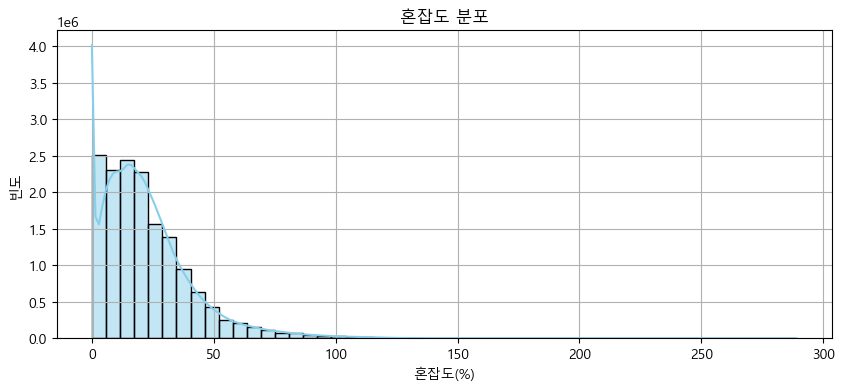

In [26]:
print(df['congestion'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df['congestion'], bins=50, kde=True, color='skyblue')
plt.title('ÌòºÏû°ÎèÑ Î∂ÑÌè¨')
plt.xlabel('ÌòºÏû°ÎèÑ(%)')
plt.ylabel('ÎπàÎèÑ')
plt.grid(True)
plt.show()

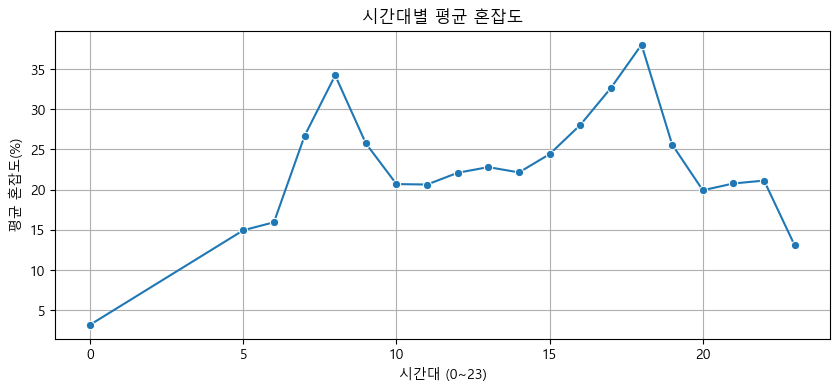

In [27]:
hourly_mean = df.groupby('hour')['congestion'].mean()

plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values, marker='o')
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ")
plt.xlabel("ÏãúÍ∞ÑÎåÄ (0~23)")
plt.ylabel("ÌèâÍ∑† ÌòºÏû°ÎèÑ(%)")
plt.grid(True)
plt.show()


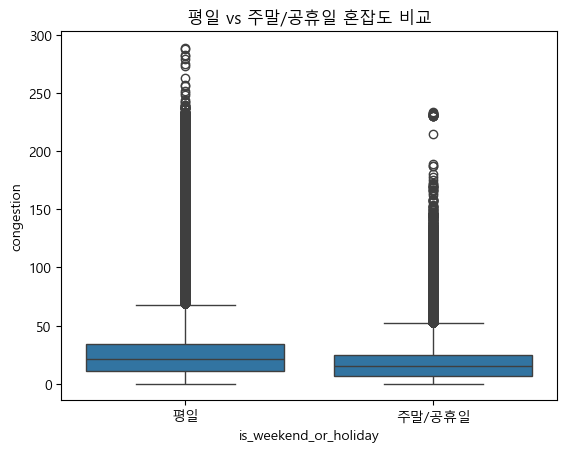

In [28]:
sns.boxplot(x='is_weekend_or_holiday', y='congestion', data=df)
plt.xticks([0, 1], ['ÌèâÏùº', 'Ï£ºÎßê/Í≥µÌú¥Ïùº'])
plt.title("ÌèâÏùº vs Ï£ºÎßê/Í≥µÌú¥Ïùº ÌòºÏû°ÎèÑ ÎπÑÍµê")
plt.show()


In [29]:
# ÌòºÏû°ÎèÑ 90% Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞
high_cong = df[df['congestion'] >= 90]

# ÏÉÅÏúÑ ÏãúÍ∞ÑÎåÄ Í∏∞Ï§Ä ÌòºÏû°ÎèÑ ÌèâÍ∑†
print(high_cong['hour'].value_counts().sort_index())

hour
0       416
5      2013
6       117
7     23107
8     53320
9     12964
10      381
11      327
12      231
13      150
14       36
15      257
16      712
17    16748
18    52145
19     4570
20       52
21     1159
22     2276
23      142
Name: count, dtype: int64


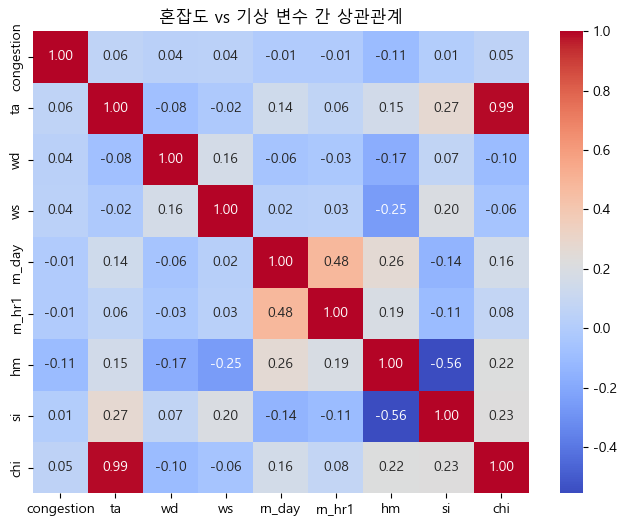

In [30]:
# Ï£ºÏöî Í∏∞ÏÉÅ Î≥ÄÏàò + ÌòºÏû°ÎèÑ ÏÑ†ÌÉù
cols = ['congestion', 'ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'chi']
corr = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("ÌòºÏû°ÎèÑ vs Í∏∞ÏÉÅ Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()

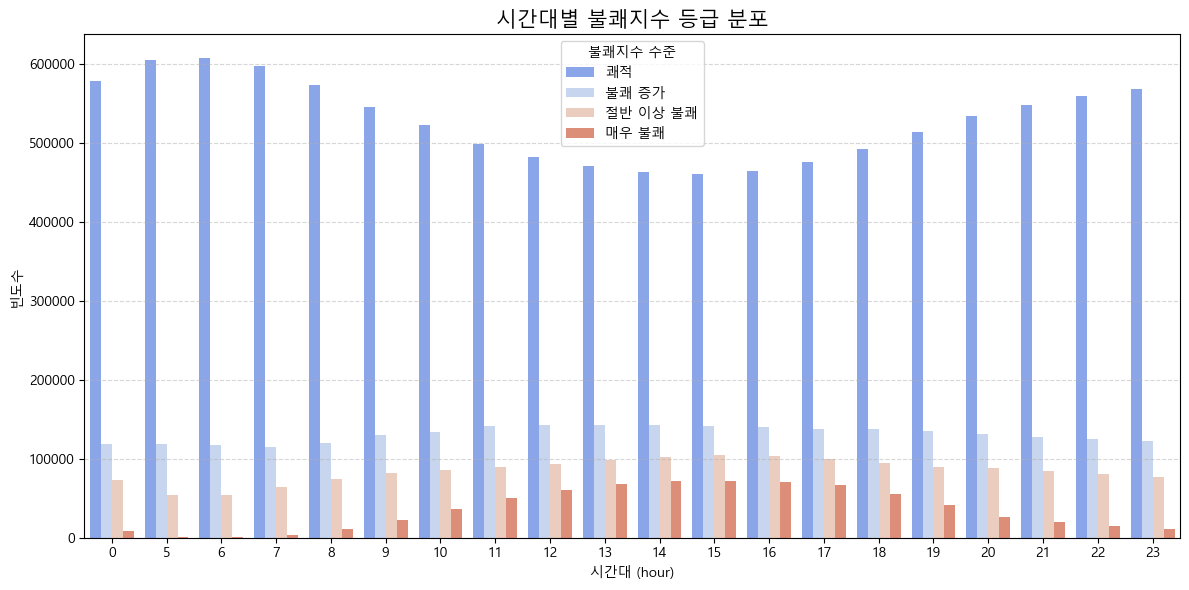

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∂àÏæåÏßÄÏàò Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='hour', hue='di_level', order=sorted(df['hour'].unique()), palette='coolwarm')

plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∂àÏæåÏßÄÏàò Îì±Í∏â Î∂ÑÌè¨', fontsize=15)
plt.xlabel('ÏãúÍ∞ÑÎåÄ (hour)')
plt.ylabel('ÎπàÎèÑÏàò')
plt.legend(title='Î∂àÏæåÏßÄÏàò ÏàòÏ§Ä')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ÌèâÏùº / Ìú¥Ïùº Î∂ÑÎ•ò EDA

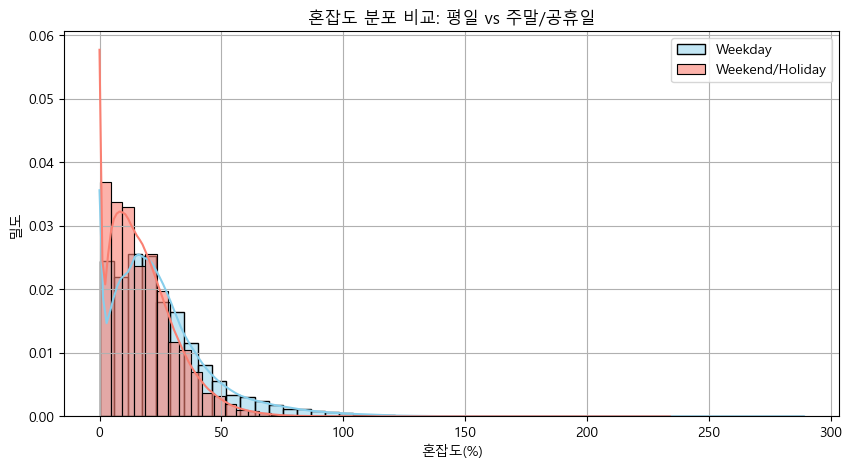

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_weekday['congestion'], color='skyblue', label='Weekday', stat='density', bins=50, kde=True)
sns.histplot(df_weekend['congestion'], color='salmon', label='Weekend/Holiday', stat='density', bins=50, kde=True, alpha=0.6)
plt.title("ÌòºÏû°ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê: ÌèâÏùº vs Ï£ºÎßê/Í≥µÌú¥Ïùº")
plt.xlabel("ÌòºÏû°ÎèÑ(%)")
plt.ylabel("Î∞ÄÎèÑ")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print("üìå ÌòºÏû°ÎèÑ ÌÜµÍ≥Ñ ÏöîÏïΩ")
print("‚ñ∂ ÌèâÏùº")
print(df_weekday['congestion'].describe())
print("\n‚ñ∂ Ï£ºÎßê/Í≥µÌú¥Ïùº")
print(df_weekend['congestion'].describe())


üìå ÌòºÏû°ÎèÑ ÌÜµÍ≥Ñ ÏöîÏïΩ
‚ñ∂ ÌèâÏùº
count    1.059600e+07
mean     2.505205e+01
std      2.088204e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.100000e+01
75%      3.400000e+01
max      2.890000e+02
Name: congestion, dtype: float64

‚ñ∂ Ï£ºÎßê/Í≥µÌú¥Ïùº
count    4.993838e+06
mean     1.751410e+01
std      1.385104e+01
min      0.000000e+00
25%      7.000000e+00
50%      1.500000e+01
75%      2.500000e+01
max      2.340000e+02
Name: congestion, dtype: float64


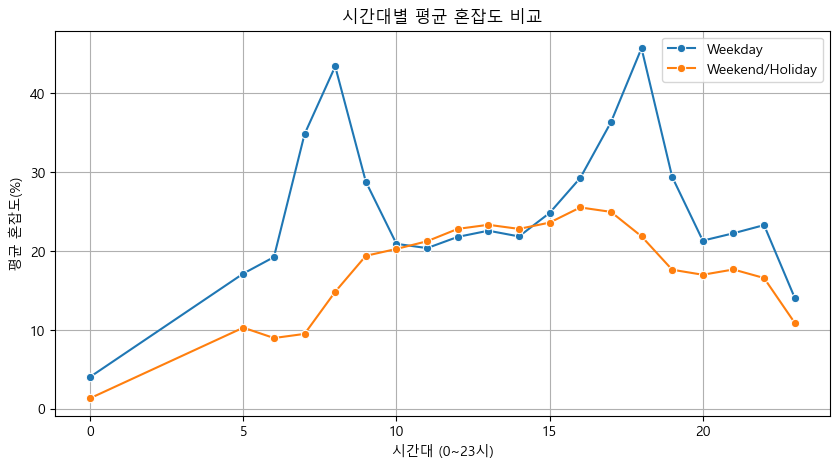

In [34]:
weekday_hourly = df_weekday.groupby('hour')['congestion'].mean()
weekend_hourly = df_weekend.groupby('hour')['congestion'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekday_hourly.index, y=weekday_hourly.values, label='Weekday', marker='o')
sns.lineplot(x=weekend_hourly.index, y=weekend_hourly.values, label='Weekend/Holiday', marker='o')
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ ÎπÑÍµê")
plt.xlabel("ÏãúÍ∞ÑÎåÄ (0~23Ïãú)")
plt.ylabel("ÌèâÍ∑† ÌòºÏû°ÎèÑ(%)")
plt.grid(True)
plt.legend()
plt.show()


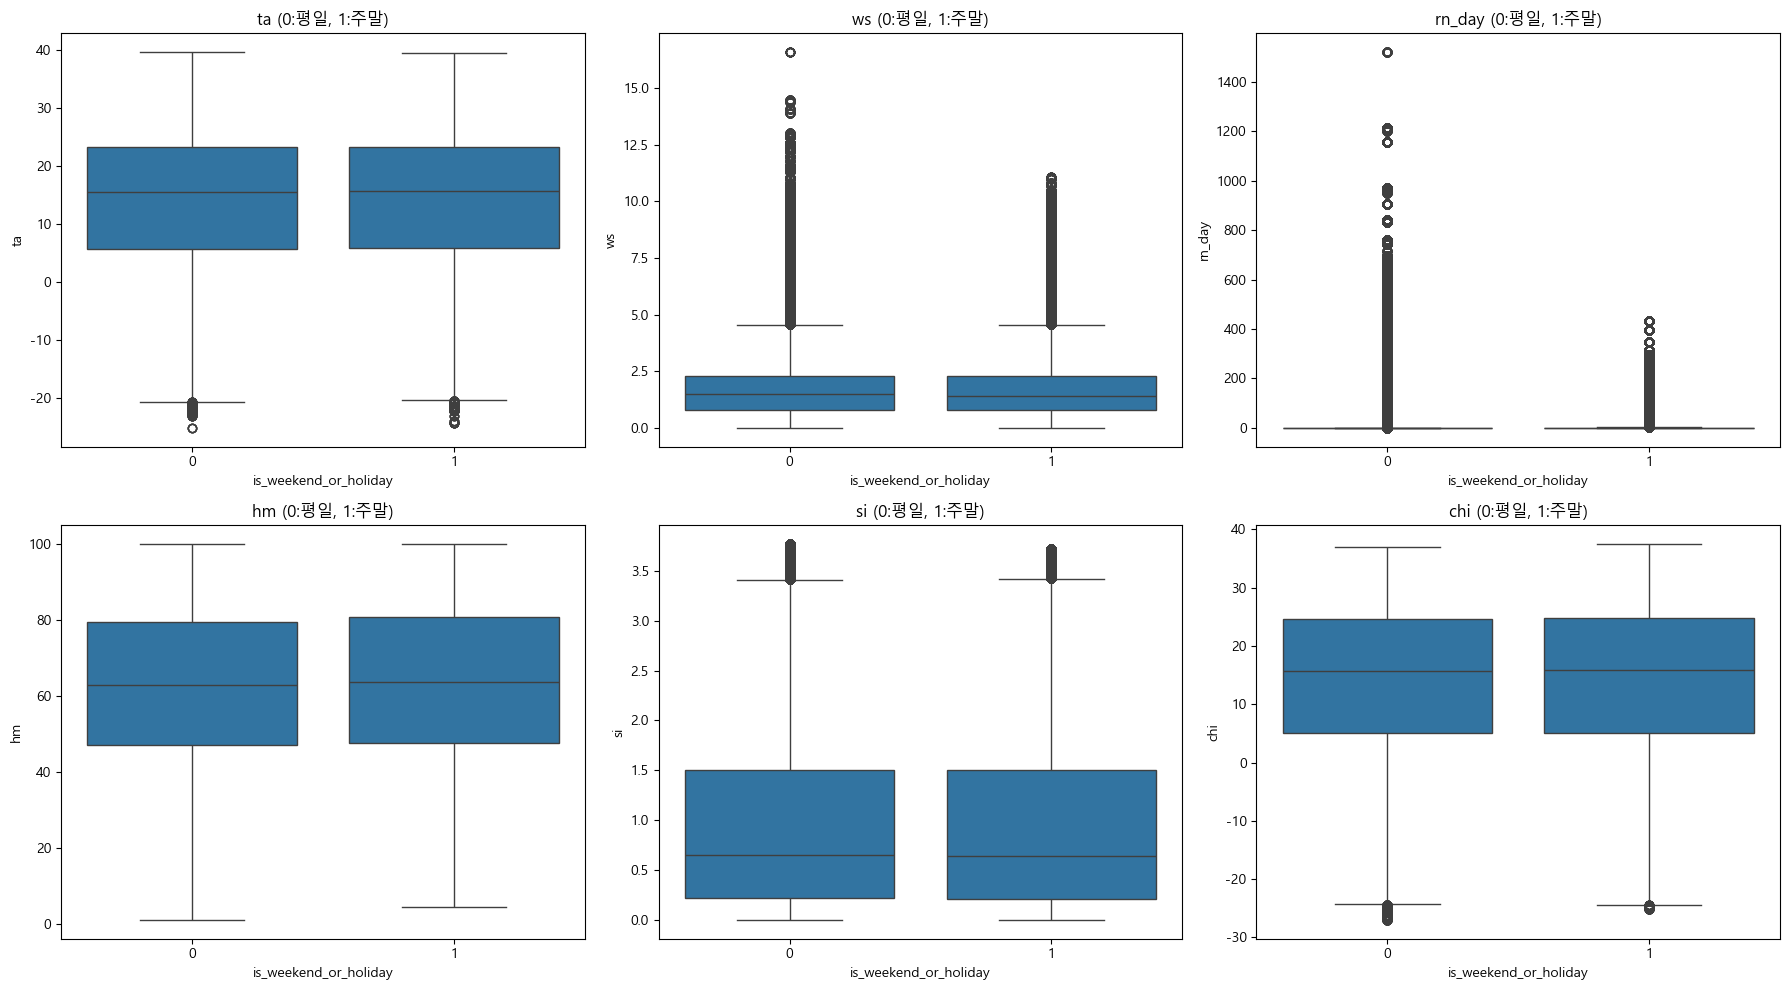

In [35]:
weather_cols = ['ta', 'ws', 'rn_day', 'hm', 'si', 'chi']

plt.figure(figsize=(18, 10))
for i, col in enumerate(weather_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='is_weekend_or_holiday', y=col)
    plt.title(f"{col} (0:ÌèâÏùº, 1:Ï£ºÎßê)")
plt.tight_layout()
plt.show()


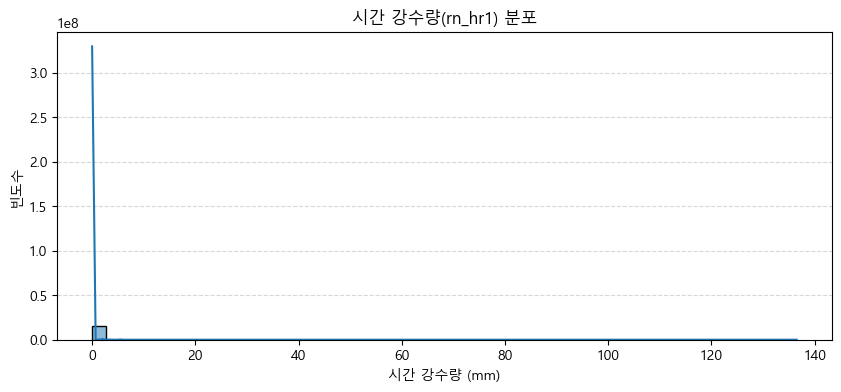

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['rn_hr1'], bins=50, kde=True)
plt.title('ÏãúÍ∞Ñ Í∞ïÏàòÎüâ(rn_hr1) Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞Ñ Í∞ïÏàòÎüâ (mm)')
plt.ylabel('ÎπàÎèÑÏàò')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [37]:
df['rn_hr1'].describe()

count    1.558983e+07
mean     1.671783e-01
std      1.329990e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.365000e+02
Name: rn_hr1, dtype: float64

In [38]:
df['rn_hr1'].max()

np.float64(136.5)

---

- Î™®Îç∏ÎßÅÏùÑ ÎèåÎ¶∞Îã§Î©¥ ? 
    - ÌòºÏû°ÎèÑÎ•º Í∑∏ÎåÄÎ°ú Ïà´ÏûêÍ∞í(Ïó∞ÏÜçÌòï)ÏúºÎ°ú ÏòàÏ∏°ÌïòÎäî Í≤É
    - Íµ¨Í∞ÑÏùÑ ÎÇòÎà†ÏÑú Î≤îÏ£ºÌòï(Î∂ÑÎ•ò)ÏúºÎ°ú ÏòàÏ∏°ÌïòÎäî Í≤É

- Í∞ÅÍ∞Å ÏµúÏ†ÅÏùò ÏÉÅÌô©Í≥º Í∂åÏû• Î∞©Ïãù

| ÏÉÅÌô©                           | Í∂åÏû• Î∞©Ïãù | Ïù¥Ïú†                   |
| ---------------------------- | ----- | -------------------- |
| ÌòºÏû°ÎèÑÍ∞Ä ÏÑ∏Î∞ÄÌïú ÏàòÏπòÎ°ú ÌïÑÏöîÌïú Í≤ΩÏö∞          | ÌöåÍ∑Ä    | Ïòà: ÏµúÏ†Å Ïä§ÏºÄÏ§ÑÎßÅ ÏïåÍ≥†Î¶¨Ï¶òÏóê ÏÇ¨Ïö©  |
| ÏÇ¨Ïö©Ïûê ÏïåÎ¶ºÏö© Îì± **Ìï¥ÏÑù Ïö©Ïù¥ÏÑ±**Ïù¥ Ï§ëÏöîÌïú Í≤ΩÏö∞ | Î∂ÑÎ•ò    | Ïòà: ‚ÄúÏßÄÍ∏à ÌòºÏû°ÎèÑÍ∞Ä Îß§Ïö∞ ÎÜíÏäµÎãàÎã§‚Äù |
| Í∞íÏùò Î∂ÑÌè¨Í∞Ä Î∂àÍ∑†ÌòïÌïòÍ±∞ÎÇò ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÎßéÏùÄ Í≤ΩÏö∞     | Î∂ÑÎ•ò    | Ïù¥ÏÉÅÏπò ÏòÅÌñ• ÏôÑÌôî Í∞ÄÎä•         |

- Ï†ïÎ¶¨ 
    - ‚úîÔ∏è ÎπÑÏ¶àÎãàÏä§ Î™©Ï†ÅÏù¥ ‚ÄúÏïåÍ∏∞ Ïâ¨Ïö¥ ÌòºÏû° Îì±Í∏â Ï†úÍ≥µ‚ÄùÏù¥ÎùºÎ©¥ ‚Üí Î∂ÑÎ•òÍ∞Ä Ï¢ãÍ≥†
    - ‚úîÔ∏è Ï†ïÎ∞ÄÌïú ÏàòÏπòÍ∞Ä ÌïÑÏöîÌïú ÏµúÏ†ÅÌôîÎÇò ÏãúÎÆ¨Î†àÏù¥ÏÖòÏù¥ Î™©Ï†ÅÏù¥ÎùºÎ©¥ ‚Üí ÌöåÍ∑ÄÍ∞Ä Ï¢ãÏäµÎãàÎã§

- ÌöåÍ∑ÄÏôÄ Î∂ÑÎ•òÎäî Î™©Ï†ÅÏù¥ Îã§Î•¥Í≥†, Ï∂úÎ†•Í∞íÎèÑ Îã§Î•¥Î©∞, ÌèâÍ∞Ä Î∞©ÏãùÎèÑ ÏôÑÏ†ÑÌûà Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞ÅÍ∞Å Îî∞Î°ú Í≤ÄÏ¶ùÏùÑ Ìï¥ÏïºÌïúÎã§.

| Ìï≠Î™©    | ÌöåÍ∑Ä Î™®Îç∏         | Î∂ÑÎ•ò Î™®Îç∏                    |
| ----- | ------------- | ------------------------ |
| Î™©ÌëúÍ∞í   | ÏàòÏπò (ex. 37.2) | Î≤îÏ£º (ex. Low/Medium/High) |
| ÎåÄÌëú ÏßÄÌëú | RMSE, R¬≤, MAE | Accuracy, F1-score, AUC  |
| Ìï¥ÏÑù    | ÏòàÏ∏°Í∞í ÏûêÏ≤¥Í∞Ä ÏùòÎØ∏    | ÏòàÏ∏° ÌÅ¥ÎûòÏä§Ïùò ÎßûÏ∂§ Ïó¨Î∂Ä            |
| Í≤ÄÏ¶ù Î∞©Ïãù | ÏàòÏπò Í∏∞Î∞ò Ïò§Ï∞® Ï∏°Ï†ï   | ÎßûÏ∂ò/Î™ª ÎßûÏ∂ò ÎπÑÏú® Ï∏°Ï†ï            |


- RMSEÏóê ÎåÄÌïú ÏÑ§Î™ÖÏù¥ ÏïàÎÇ¥ÏÑúÏóê ÏûàÎäî Í±∞Î°ú Î≥¥ÏïÑ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏÇ¨Ïö© ÌïòÎùºÎäî Í≤ÉÏù¥ Ï£º Î™©ÌëúÏù∏ Í≤É Í∞ôÎã§. 


- Î™®Îç∏ÎßÅ Ìï† Îïå ÌïÑÏöîÌïú ÏàúÏÑú ! 
    - ÌïÑÏöîÌïú Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Í∞ÄÍ≥µÏùÑ Ìï¥Ïïº Ìï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.(Î≥ÄÏàò ÏÑ†ÌÉùÏùÑ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú ??)
        - Î≥ÄÏàò ÏÑ†ÌÉùÏùÑ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú ??
        - ÏÉÅÏóÖÏßÄÍµ¨Ïù∏ÏßÄ ÏïÑÎãåÏßÄ ÎÇòÎàå ÌïÑÏöîÏÑ± ÏûàÎÇò ? 

- Î™®Îç∏ÎßÅÏùÑ ÌïúÎã§Î©¥ ? 
    - ÏûÖÎ†• (ÏòàÏãú) : Ïó≠, Í∏∞Ïò®, Ï≤¥Í∞êÏò®ÎèÑ, Î∂àÏæåÏßÄÏàò, ÏãúÍ∞Ñ, ÎÖ∏ÏÑ†
    - Ï∂úÎ†• : ÌòºÏû°ÎèÑ
- ÌïÑÏöîÌï†Íπå ? 
    - Î≥ÄÏàò Ï°∞Ìï©Î≥Ñ ÌòºÏû°ÎèÑ Ï∞®Ïù¥ Î∂ÑÏÑù
        - ÌäπÏ†ï ÎÖ∏ÏÑ† + ÌäπÏ†ï ÏãúÍ∞ÑÎç∞ + ÏÉÅÏóÖ ÏßÄÍµ¨ Î∞©Ìñ• -> ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÏùÄÍ∞Ä ? 
        - Î∂àÏæåÏßÄÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÏïÑÏßÄÎäîÍ∞Ä ? 

In [39]:
df

line  station_number station_name direction  stn   ta     wd   ws  \
0            1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.6  291.1  3.3   
1            1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.3  124.7  2.4   
2            1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.3  126.2  1.7   
3            1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -9.1  145.7  1.3   
4            1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -8.5  194.2  0.6   
...        ...             ...          ...       ...  ...  ...    ...  ...   
15589828     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.6    0.0  0.0   
15589829     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572  0.0  354.7  0.0   
15589830     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.6    0.0  0.0   
15589831     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -0.8    0.0  0.0   
15589832     8            2828          ÎÇ®ÏúÑÎ°Ä        ÌïòÏÑ†  572 -1.3  110.7  0.1   

          rn_hr1      hm  ...  is_weekend_or_holiday  month  calculated_chi  \
0            0.0  52.477  ...                      1      1      -11.217324   
1            0.0  70.292  ...                      1      1       -9.981439   
2            0.0  55.452  ...                      1      1       -9.051622   
3            0.0  51.202  ...                      1      1       -8.155941   
4            0.0  62.856  ...                      1      1       -5.746168   
...          ...     ...  ...                    ...    ...             ...   
15589828     0.0  83.100  ...                      1     12       13.492900   
15589829     0.0  84.700  ...                      1     12       13.120000   
15589830     0.0  85.100  ...                      1     12       12.747100   
15589831     0.0  85.600  ...                      1     12       12.622800   
15589832     0.0  85.600  ...                      1     12        4.089328   

          chi_rounded calculated_chi_rounded  is_same   chi_diff  \
0               -12.6                  -11.2    False  -1.382676   
1               -10.3                  -10.0    False  -0.318561   
2               -10.1                   -9.1    False  -1.048378   
3                -9.7                   -8.2    False  -1.544059   
4                -9.7                   -5.7    False  -3.953832   
...               ...                    ...      ...        ...   
15589828          0.0                   13.5    False -13.492900   
15589829         -0.6                   13.1    False -13.720000   
15589830         -1.1                   12.7    False -13.847100   
15589831         -1.3                   12.6    False -13.922800   
15589832         -1.9                    4.1    False  -5.989328   

          discomfort_index  di_level  rn_day  
0                26.032375        ÏæåÏ†Å     0.0  
1                22.243460        ÏæåÏ†Å     0.0  
2                25.731898        ÏæåÏ†Å     0.0  
3                26.994326        ÏæåÏ†Å     0.0  
4                25.137260        ÏæåÏ†Å     0.0  
...                    ...       ...     ...  
15589828         35.396314        ÏæåÏ†Å    12.0  
15589829         34.187900        ÏæåÏ†Å    12.0  
15589830         33.139206        ÏæåÏ†Å    12.0  
15589831         32.733248        ÏæåÏ†Å    12.0  
15589832         31.904528        ÏæåÏ†Å    12.0  

[15589833 rows x 25 columns]

In [40]:
df['congestion']

0            0
1            1
2            2
3            3
4            3
            ..
15589828    18
15589829    17
15589830    21
15589831    18
15589832    22
Name: congestion, Length: 15589833, dtype: int64

---

## Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ EDA

In [41]:
df['year'] = pd.to_datetime(df['date_dt']).dt.year
df['month'] = pd.to_datetime(df['date_dt']).dt.month
grouped_all = df.groupby(['year', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1']
].mean().reset_index()

In [42]:
def assign_commute_time(hour):
    if 7 <= hour <= 9:
        return 'Ï∂úÍ∑º'
    elif 17 <= hour <= 19:
        return 'Ìá¥Í∑º'
    else:
        return 'Í∏∞ÌÉÄ'

df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] = df['hour'].apply(assign_commute_time)

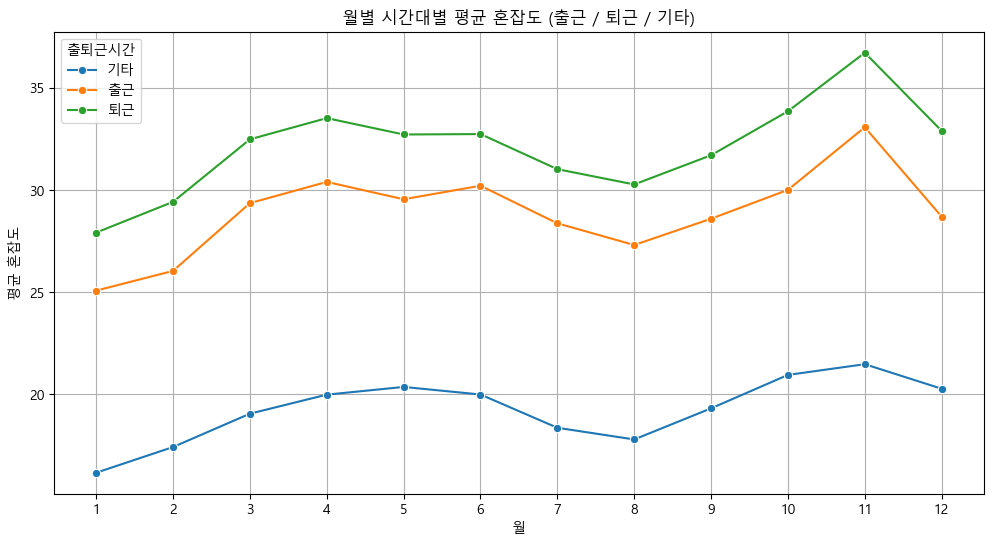

In [43]:
# Ï∂úÍ∑ºÍ≥º Ìá¥Í∑ºÏóêÎèÑ ÌòºÏû°ÎèÑ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?
# ÏõîÎ≥Ñ + Ï∂úÍ∑ºorÌá¥Í∑º Í∏∞Ï§Ä ÌèâÍ∑† ÌòºÏû°ÎèÑ
monthly_all = df.groupby(['month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])['congestion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_all, x='month', y='congestion', hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', marker='o')
plt.title('ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ (Ï∂úÍ∑º / Ìá¥Í∑º / Í∏∞ÌÉÄ)')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

- Ìá¥Í∑ºÏãúÍ∞ÑÎåÄÍ∞Ä Í∞ÄÏû• ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÍ≥† 11ÏõîÏù¥ Í∞ÄÏû• ÌòºÏû°ÎèÑÍ∞Ä ÎÜíÏùÄÍ≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- ÌòºÏû°ÎèÑÏôÄ Í¥ÄÎ†®Ìï¥ÏÑú ÎπÑÏ∂úÌá¥Í∑ºÏãúÍ∞ÑÏù¥ Îçî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùå ÌïòÏßÄÎßå Îã§ ÎÇÆÏùå

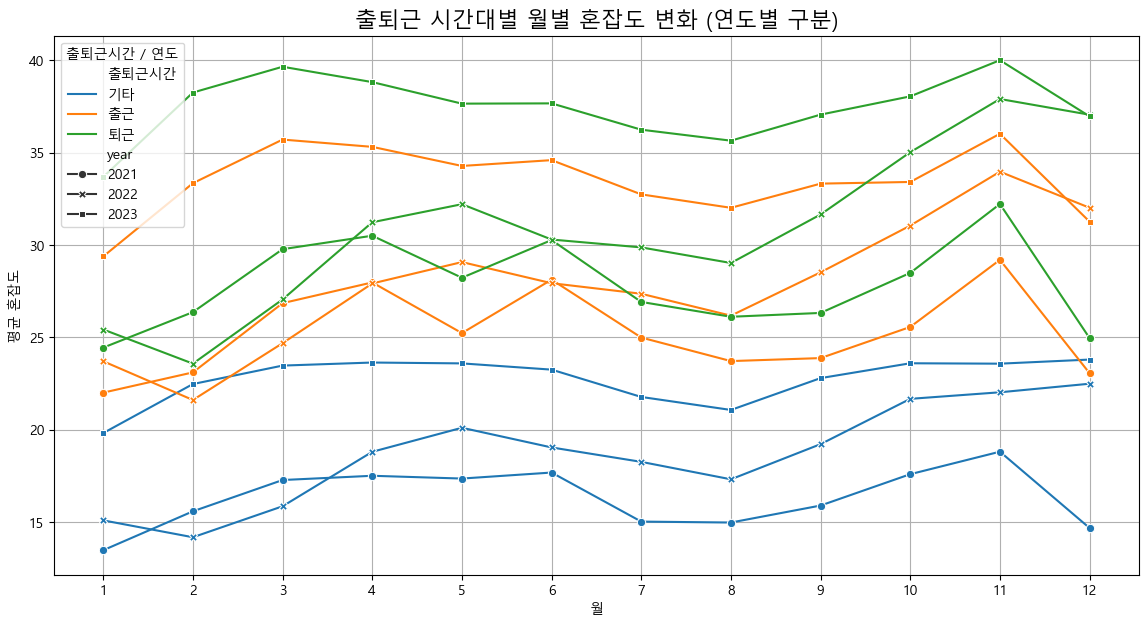

In [44]:
monthly_trend = df.groupby(['year', 'month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])['congestion'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='month',
    y='congestion',
    hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ',
    style='year',
    markers=True,
    dashes=False
)
plt.title('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏõîÎ≥Ñ ÌòºÏû°ÎèÑ Î≥ÄÌôî (Ïó∞ÎèÑÎ≥Ñ Íµ¨Î∂Ñ)', fontsize=16)
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.legend(title='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ / Ïó∞ÎèÑ')
plt.grid(True)
plt.show()

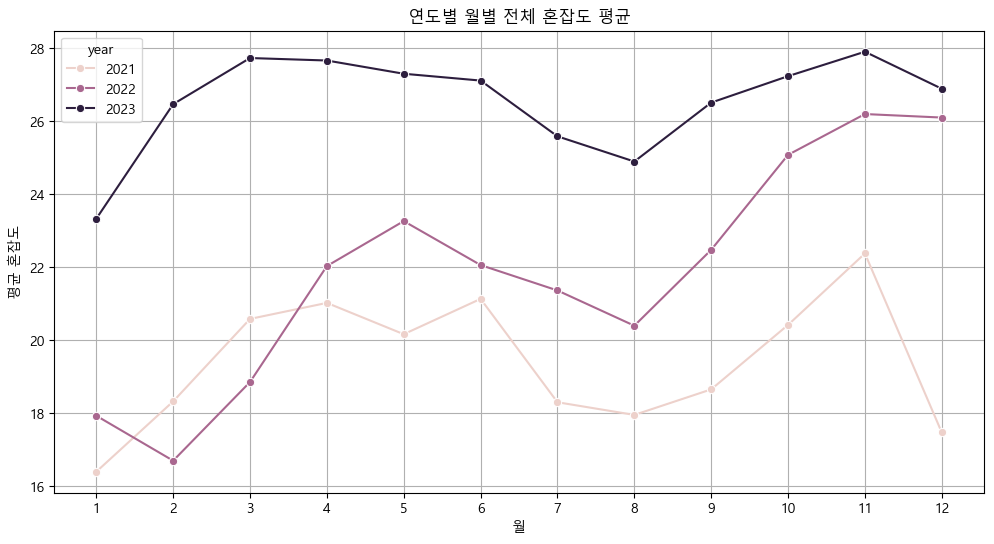

In [45]:
monthly_overall = df.groupby(['year', 'month'])['congestion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_overall,
    x='month',
    y='congestion',
    hue='year',
    marker='o'
)
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏõîÎ≥Ñ Ï†ÑÏ≤¥ ÌòºÏû°ÎèÑ ÌèâÍ∑†')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


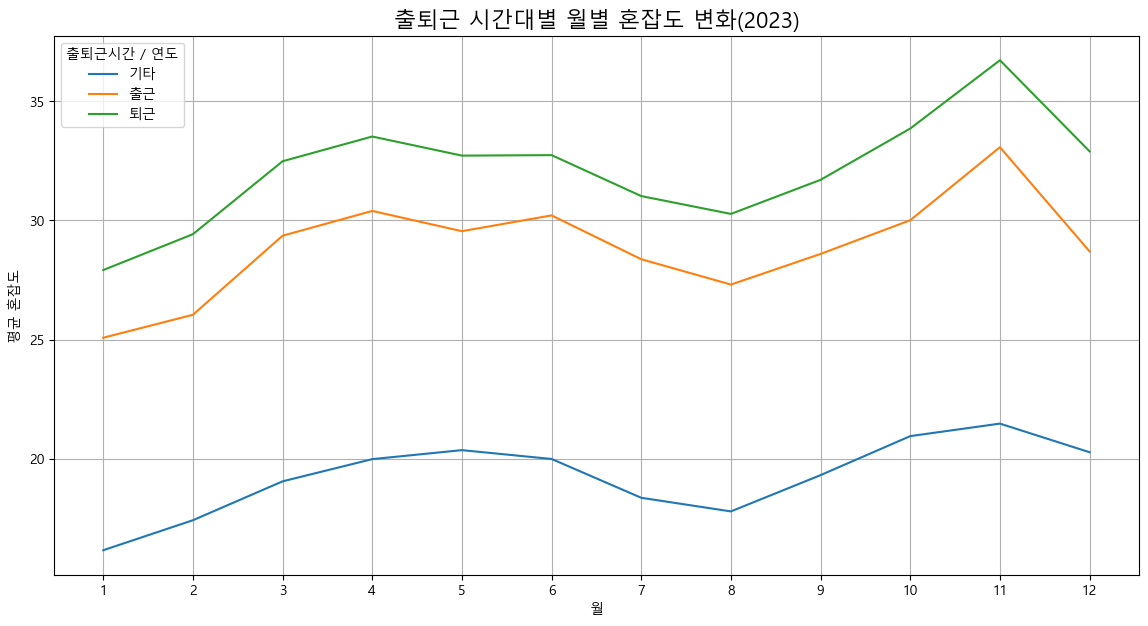

In [46]:
monthly_trend = df.groupby(['month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'])['congestion'].mean().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='month',
    y='congestion',
    hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ',
    dashes=False
)
plt.title('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏõîÎ≥Ñ ÌòºÏû°ÎèÑ Î≥ÄÌôî(2023)', fontsize=16)
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ')
plt.xticks(range(1, 13))
plt.legend(title='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ / Ïó∞ÎèÑ')
plt.grid(True)
plt.show()

In [47]:
df.columns

Index(['line', 'station_number', 'station_name', 'direction', 'stn', 'ta',
       'wd', 'ws', 'rn_hr1', 'hm', 'si', 'chi', 'congestion', 'hour',
       'date_dt', 'is_weekend_or_holiday', 'month', 'calculated_chi',
       'chi_rounded', 'calculated_chi_rounded', 'is_same', 'chi_diff',
       'discomfort_index', 'di_level', 'rn_day', 'year', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

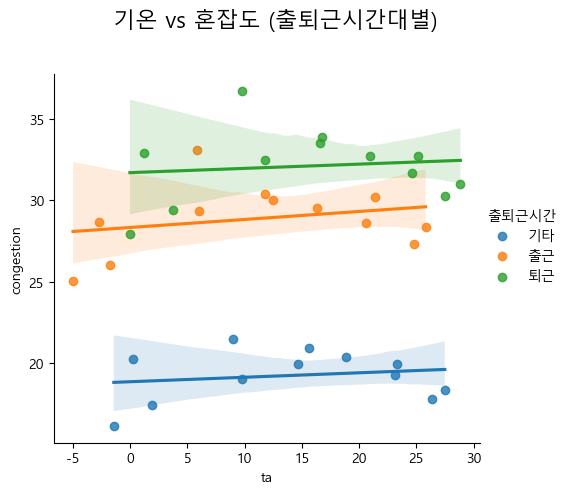

In [48]:
weather_grouped = df.groupby(['month', 'Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ']).agg({
    'congestion': 'mean',
    'ta': 'mean',          # Ïã§Ï†ú Í∏∞Ïò®
    'chi': 'mean',      # Ï≤¥Í∞êÏò®ÎèÑ
    'rn_day': 'mean',      # Ïùº ÎàÑÏ†Å Í∞ïÏàòÎüâ
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lmplot(
    data=weather_grouped,
    x='ta', y='congestion',
    hue='Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ',
    height=5, aspect=1
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Í∏∞Ïò® vs ÌòºÏû°ÎèÑ (Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÎåÄÎ≥Ñ)', fontsize=16)
plt.show()

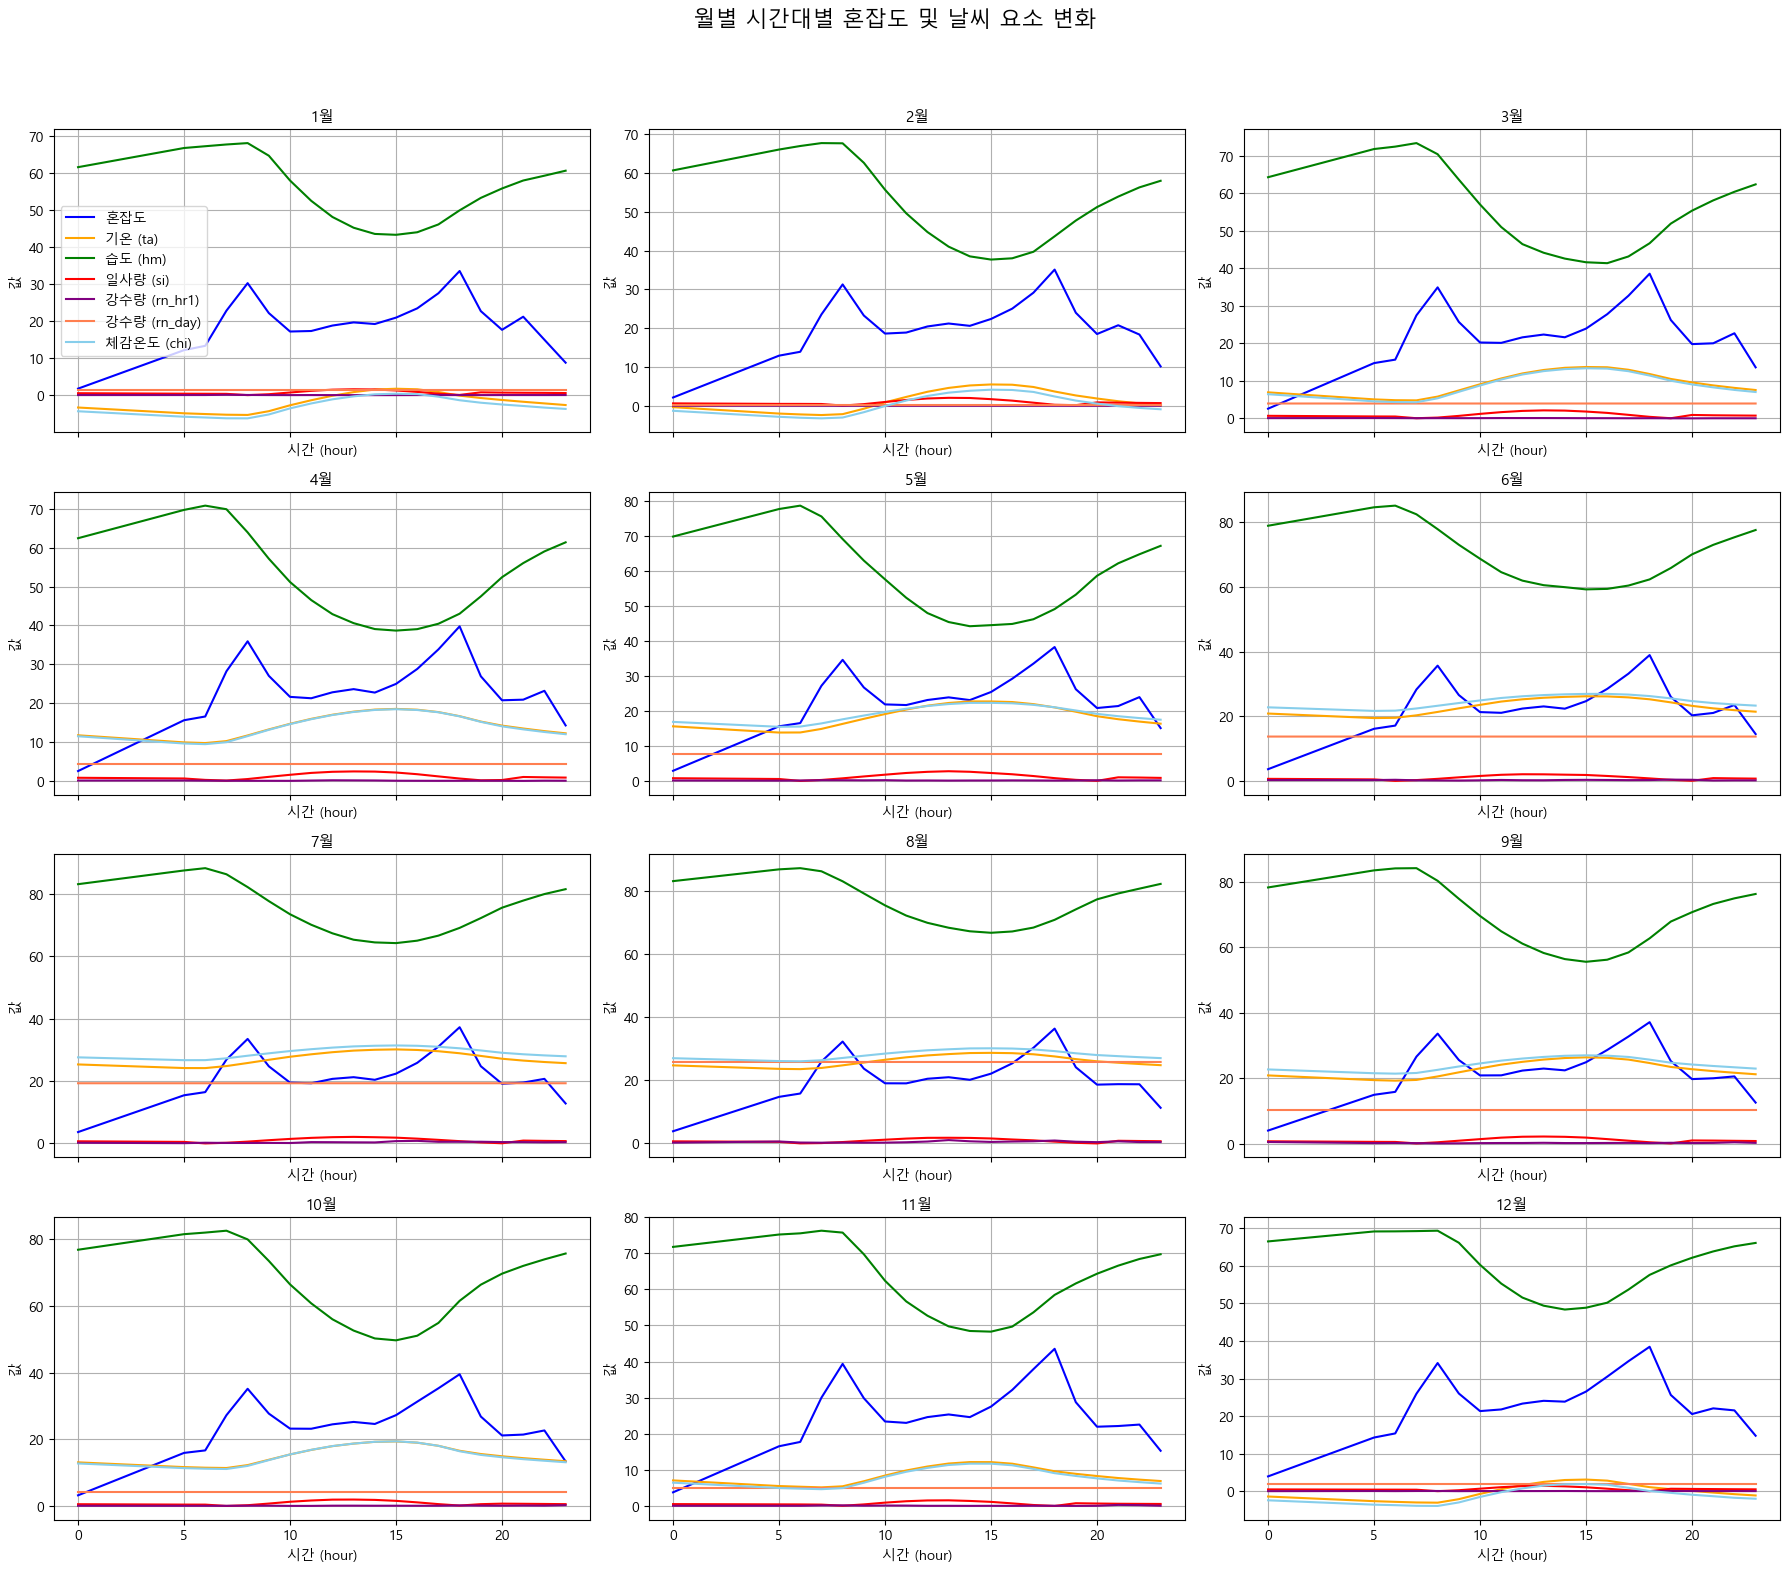

In [49]:
grouped = df.groupby(['month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# uniqueÌïú (year, month) Ï°∞Ìï© Ï†ïÎ†¨
time_keys = sorted(grouped['month'].drop_duplicates().values.tolist())

# subplot Í∑∏Î¶¨Îìú ÏÇ¨Ïù¥Ï¶à ÏÑ§Ï†ï (Ïòà: 4Ìñâ x 3Ïó¥)
ncols = 3
nrows = (len(time_keys) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4), sharex=True, sharey=False)
axes = axes.flatten()

# Í∞Å (year, month)Ïóê ÎåÄÌï¥ ÌïòÎÇòÏùò subplot ÏÉùÏÑ±
for i, month in enumerate(time_keys):
    ax = axes[i]
    df_sub = grouped[grouped['month'] == month]

    ax.plot(df_sub['hour'], df_sub['congestion'], color='blue', label='ÌòºÏû°ÎèÑ')
    ax.plot(df_sub['hour'], df_sub['ta'], color='orange', label='Í∏∞Ïò® (ta)')
    ax.plot(df_sub['hour'], df_sub['hm'], color='green', label='ÏäµÎèÑ (hm)')
    ax.plot(df_sub['hour'], df_sub['si'], color='red', label='ÏùºÏÇ¨Îüâ (si)')
    ax.plot(df_sub['hour'], df_sub['rn_hr1'], color='purple', label='Í∞ïÏàòÎüâ (rn_hr1)')
    ax.plot(df_sub['hour'], df_sub['rn_day'], color='coral', label='Í∞ïÏàòÎüâ (rn_day)')
    ax.plot(df_sub['hour'], df_sub['chi'], color='skyblue', label='Ï≤¥Í∞êÏò®ÎèÑ (chi)')

    ax.set_title(f'{month}Ïõî', fontsize=11)
    ax.set_xlabel('ÏãúÍ∞Ñ (hour)')
    ax.set_ylabel('Í∞í')
    ax.grid(True)
    if i == 0:
        ax.legend()

# ÎÇ®Îäî subplotÏùÄ Ï†úÍ±∞
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® ÏöîÏÜå Î≥ÄÌôî", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

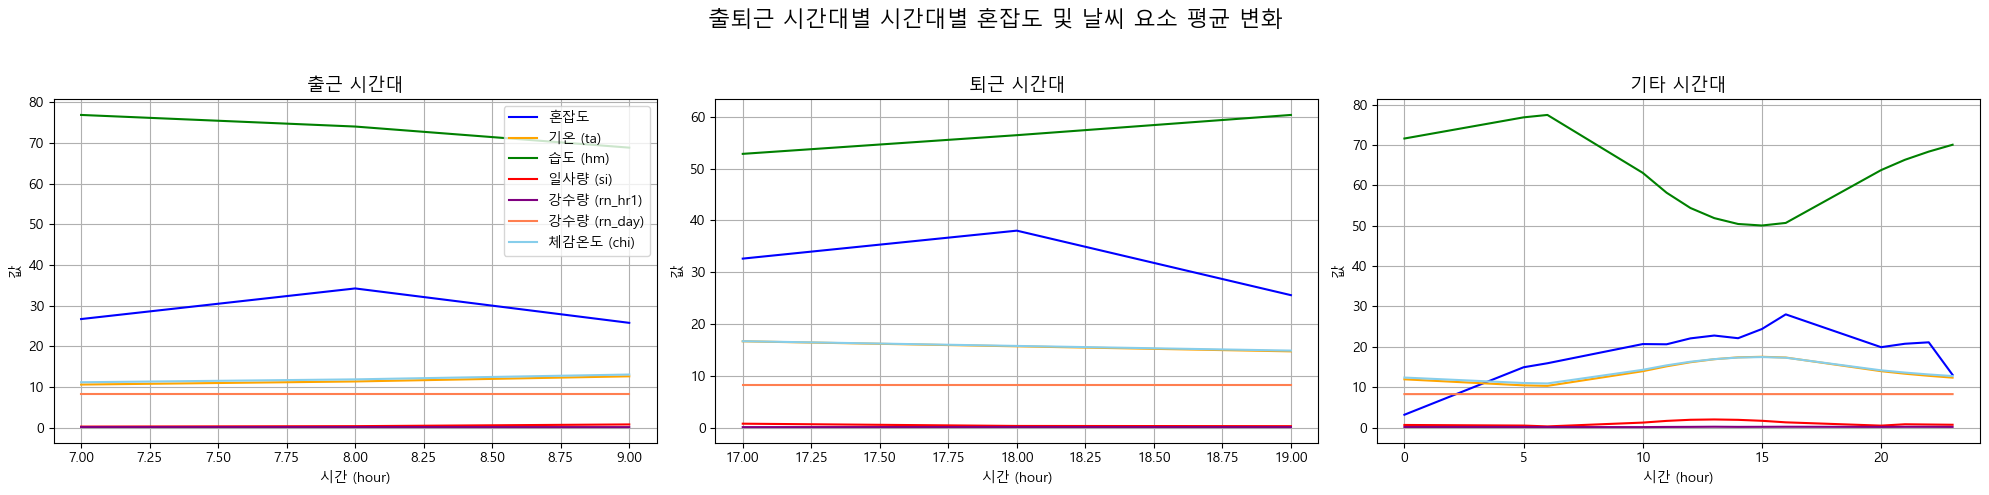

In [50]:
# 1. Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÎ≥ÑÎ°ú groupby
grouped_by_commute = df.groupby(['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. subplot Ï§ÄÎπÑ (Ï∂úÍ∑º, Ìá¥Í∑º, Í∏∞ÌÉÄ Ï¥ù 3Í∞ú)
commute_categories = ['Ï∂úÍ∑º', 'Ìá¥Í∑º', 'Í∏∞ÌÉÄ']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=False)

# 3. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ subplot Í∑∏Î¶¨Í∏∞
for i, category in enumerate(commute_categories):
    ax = axes[i]
    df_sub = grouped_by_commute[grouped_by_commute['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == category]

    ax.plot(df_sub['hour'], df_sub['congestion'], label='ÌòºÏû°ÎèÑ', color='blue')
    ax.plot(df_sub['hour'], df_sub['ta'], label='Í∏∞Ïò® (ta)', color='orange')
    ax.plot(df_sub['hour'], df_sub['hm'], label='ÏäµÎèÑ (hm)', color='green')
    ax.plot(df_sub['hour'], df_sub['si'], label='ÏùºÏÇ¨Îüâ (si)', color='red')
    ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='Í∞ïÏàòÎüâ (rn_hr1)', color='purple')
    ax.plot(df_sub['hour'], df_sub['rn_day'], label='Í∞ïÏàòÎüâ (rn_day)', color='coral')
    ax.plot(df_sub['hour'], df_sub['chi'], label='Ï≤¥Í∞êÏò®ÎèÑ (chi)', color='skyblue')

    ax.set_title(f'{category} ÏãúÍ∞ÑÎåÄ', fontsize=13)
    ax.set_xlabel('ÏãúÍ∞Ñ (hour)')
    ax.set_ylabel('Í∞í')
    ax.grid(True)
    if i == 0:
        ax.legend(loc='upper right')

# Ï†ÑÏ≤¥ ÌÉÄÏù¥ÌãÄÍ≥º Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.suptitle('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® ÏöîÏÜå ÌèâÍ∑† Î≥ÄÌôî', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

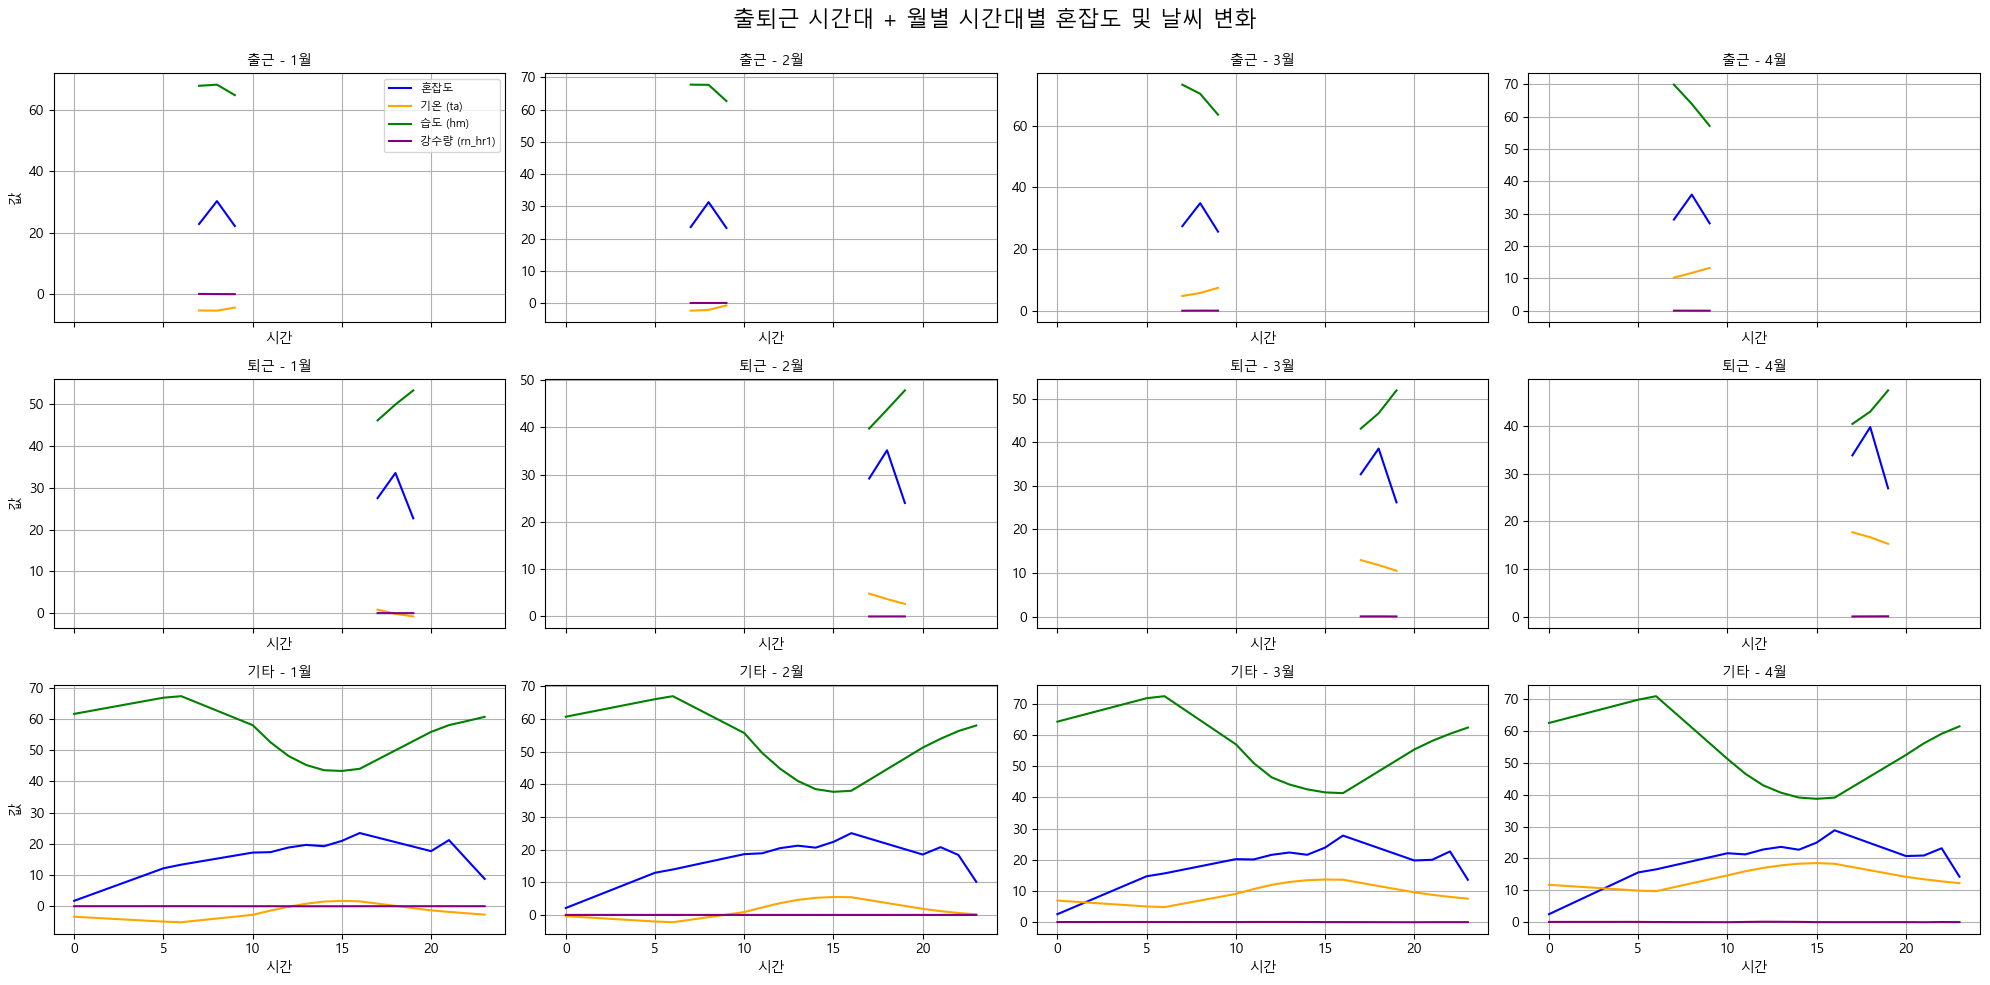

In [51]:
# 1. groupbyÎ°ú ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
grouped = df.groupby(['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ Ïõî Î¶¨Ïä§Ìä∏ Ï†ïÏùò
commute_categories = ['Ï∂úÍ∑º', 'Ìá¥Í∑º', 'Í∏∞ÌÉÄ']
months = list(range(1, 13))

# 3. subplot ÏÑ§Ï†ï
nrows = 3  # Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ 3Í∞ú
ncols = 4  # Ïõî 4Í∞úÏî©
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=False)
axes = axes.reshape(nrows, ncols)

# 4. Î∞òÎ≥µÌï¥ÏÑú subplot Í∑∏Î¶¨Í∏∞
for i, commute in enumerate(commute_categories):
    for j, month in enumerate(months[:4]):  # 1~4Ïõî Î®ºÏ†Ä
        ax = axes[i, j]
        df_sub = grouped[(grouped['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == commute) & (grouped['month'] == month)]

        ax.plot(df_sub['hour'], df_sub['congestion'], label='ÌòºÏû°ÎèÑ', color='blue')
        ax.plot(df_sub['hour'], df_sub['ta'], label='Í∏∞Ïò® (ta)', color='orange')
        ax.plot(df_sub['hour'], df_sub['hm'], label='ÏäµÎèÑ (hm)', color='green')
        ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='Í∞ïÏàòÎüâ (rn_hr1)', color='purple')

        ax.set_title(f'{commute} - {month}Ïõî', fontsize=10)
        ax.set_xlabel('ÏãúÍ∞Ñ')
        if j == 0:
            ax.set_ylabel('Í∞í')

        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄ + ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® Î≥ÄÌôî', fontsize=16)
plt.show()


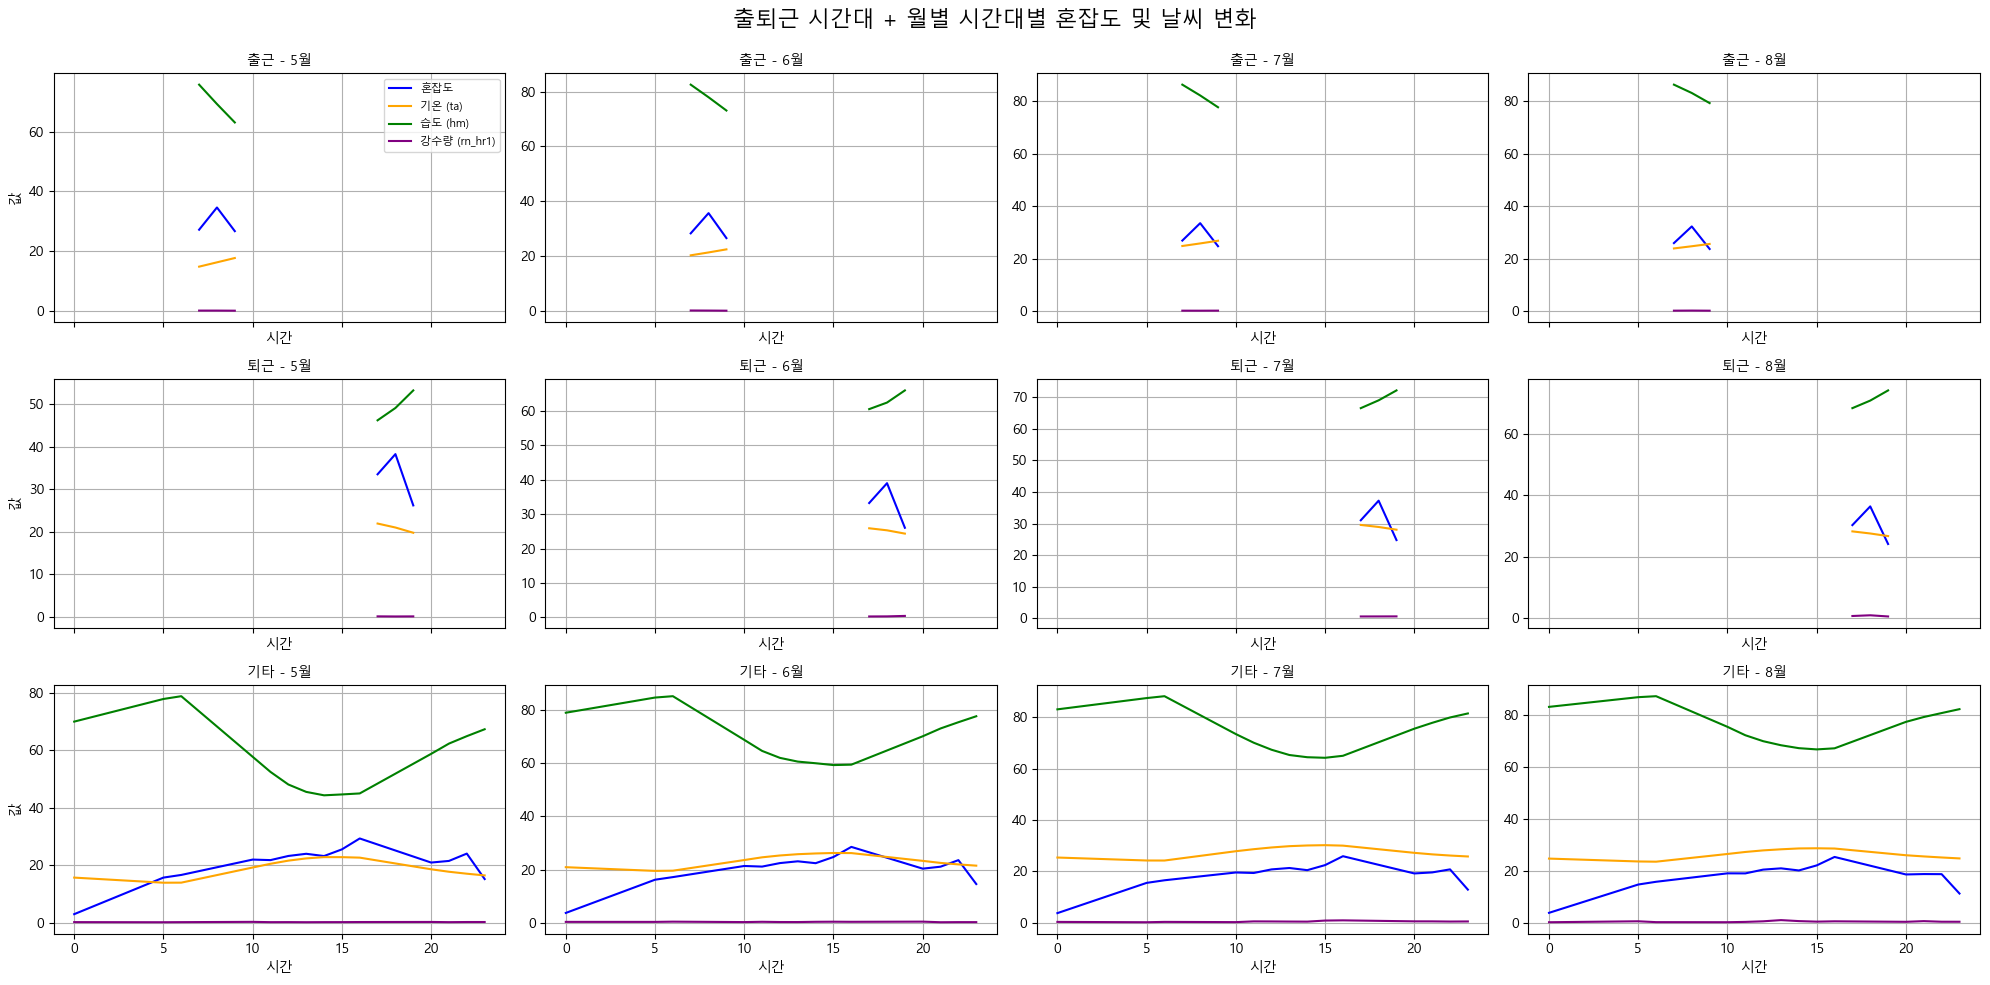

In [52]:
# 1. groupbyÎ°ú ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
grouped = df.groupby(['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ', 'month', 'hour'])[
    ['congestion', 'ta', 'hm', 'si', 'rn_hr1', 'rn_day', 'chi']
].mean().reset_index()

# 2. Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ Ïõî Î¶¨Ïä§Ìä∏ Ï†ïÏùò
commute_categories = ['Ï∂úÍ∑º', 'Ìá¥Í∑º', 'Í∏∞ÌÉÄ']
months = list(range(1, 13))

# 3. subplot ÏÑ§Ï†ï
nrows = 3  # Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ 3Í∞ú
ncols = 4  # Ïõî 4Í∞úÏî©
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharex=True, sharey=False)
axes = axes.reshape(nrows, ncols)

# 4. Î∞òÎ≥µÌï¥ÏÑú subplot Í∑∏Î¶¨Í∏∞
for i, commute in enumerate(commute_categories):
    for j, month in enumerate(months[4:8]):  # 5-8Ïõî
        ax = axes[i, j]
        df_sub = grouped[(grouped['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == commute) & (grouped['month'] == month)]

        ax.plot(df_sub['hour'], df_sub['congestion'], label='ÌòºÏû°ÎèÑ', color='blue')
        ax.plot(df_sub['hour'], df_sub['ta'], label='Í∏∞Ïò® (ta)', color='orange')
        ax.plot(df_sub['hour'], df_sub['hm'], label='ÏäµÎèÑ (hm)', color='green')
        ax.plot(df_sub['hour'], df_sub['rn_hr1'], label='Í∞ïÏàòÎüâ (rn_hr1)', color='purple')

        ax.set_title(f'{commute} - {month}Ïõî', fontsize=10)
        ax.set_xlabel('ÏãúÍ∞Ñ')
        if j == 0:
            ax.set_ylabel('Í∞í')

        ax.grid(True)
        if i == 0 and j == 0:
            ax.legend(fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄ + ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌòºÏû°ÎèÑ Î∞è ÎÇ†Ïî® Î≥ÄÌôî', fontsize=16)
plt.show()


In [53]:
from scipy.stats import f_oneway

# Í∞Å Í∑∏Î£πÏùò ÌòºÏû°ÎèÑ Ï∂îÏ∂ú
congestion_go = df[df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == 'Ï∂úÍ∑º']['congestion']
congestion_off = df[df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == 'Ìá¥Í∑º']['congestion']
congestion_else = df[df['Ï∂úÌá¥Í∑ºÏãúÍ∞Ñ'] == 'Í∏∞ÌÉÄ']['congestion']

# ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (ANOVA)
f_stat, p_value = f_oneway(congestion_go, congestion_off, congestion_else)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("‚úÖ Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÏóê Îî∞Îùº ÌòºÏû°ÎèÑÏùò Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print("‚ùå Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÏóê Îî∞Î•∏ ÌòºÏû°ÎèÑ Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

F-statistic: 619295.3779
P-value: 0.0000e+00
‚úÖ Ï∂úÌá¥Í∑ºÏãúÍ∞ÑÏóê Îî∞Îùº ÌòºÏû°ÎèÑÏùò Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.


üéØ Î∂ÑÏÑù Í∞úÏöî
- Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄÏóê Îî∞Îùº ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑ(congestion)Í∞Ä Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄÎ•º Í≤ÄÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA)Î•º ÏàòÌñâ. Ïù¥ Î∂ÑÏÑùÏùÄ Îã§Ïùå ÏÑ∏ Í∑∏Î£π Í∞Ñ ÌèâÍ∑† ÌòºÏû°ÎèÑ Ï∞®Ïù¥Î•º ÎπÑÍµê
    - Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ (Ïòà: 07~09Ïãú)
    - Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ (Ïòà: 18~20Ïãú)
    - Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ (Í∑∏ Ïô∏)
üìä Í≤∞Í≥º ÏöîÏïΩ
- F-statistic: 619,295.3779
- P-value: 0.0000e+00 (Ï¶â, Í±∞Ïùò 0)
‚úÖ Ìï¥ÏÑù
- üîç F-statistic: 619,295.3779
    - FÍ∞íÏù¥ Îß§Ïö∞ ÌÅ¨Îã§Îäî Í≤ÉÏùÄ ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Î∂ÑÏÇ∞(ÌèâÍ∑†Ïùò Ï∞®Ïù¥)Ïù¥ Í∑∏Î£π ÎÇ¥Ïùò Î∂ÑÏÇ∞Î≥¥Îã§ Îß§Ïö∞ ÌÅ¨Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏
    - Ï¶â, Îã®ÏàúÌïú Ïö∞Ïó∞Ïù¥ÎÇò ÎÇ¥Î∂Ä Î≥ÄÎèôÏÑ±ÏúºÎ°úÎäî ÏÑ§Î™ÖÎêòÏßÄ ÏïäÏùÑ Ï†ïÎèÑÎ°ú Ï∂úÍ∑º/Ìá¥Í∑º/Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ ÌòºÏû°ÎèÑ ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§Îäî ÎúªÏûÑ

- üî¨ P-value: 0.0000
    - p-valueÍ∞Ä 0.05Î≥¥Îã§ Ìõ®Ïî¨ ÏûëÍ≥†, ÏÇ¨Ïã§ÏÉÅ 0Ïóê ÏàòÎ†¥ÌïòÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§(Î™®Îì† Í∑∏Î£πÏùò ÌèâÍ∑†Ïù¥ Í∞ôÎã§)ÏùÑ Í∏∞Í∞Å
    - Ï¶â, Ï∂úÍ∑º/Ìá¥Í∑º/Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ Í∞Ñ ÌòºÏû°ÎèÑ ÌèâÍ∑†Ïù¥ Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î•¥Îã§Îäî Í∞ïÎ†•Ìïú ÌÜµÍ≥ÑÏ†Å Í∑ºÍ±∞Í∞Ä ÏûàÏùå

In [54]:
from scipy.stats import ttest_ind

# Ï∂úÍ∑º vs Ìá¥Í∑º
t_stat, p_value = ttest_ind(congestion_go, congestion_off, equal_var=False)
print(f"[Ï∂úÍ∑º vs Ìá¥Í∑º] P-value: {p_value:.4e}")

# Ï∂úÍ∑º vs Í∏∞ÌÉÄ
t_stat, p_value = ttest_ind(congestion_go, congestion_else, equal_var=False)
print(f"[Ï∂úÍ∑º vs Í∏∞ÌÉÄ] P-value: {p_value:.4e}")

# Ìá¥Í∑º vs Í∏∞ÌÉÄ
t_stat, p_value = ttest_ind(congestion_off, congestion_else, equal_var=False)
print(f"[Ìá¥Í∑º vs Í∏∞ÌÉÄ] P-value: {p_value:.4e}")

[Ï∂úÍ∑º vs Ìá¥Í∑º] P-value: 0.0000e+00
[Ï∂úÍ∑º vs Í∏∞ÌÉÄ] P-value: 0.0000e+00
[Ìá¥Í∑º vs Í∏∞ÌÉÄ] P-value: 0.0000e+00


## ÏÉÅÏÑ† vs ÌïòÏÑ†

In [55]:
# Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ†Ïóê Îî∞Î•∏ ÌòºÏû°ÎèÑ Î∞è Î∂àÏæåÏßÄÏàò ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
direction_analysis = df.groupby(['line', 'direction']).agg(
    mean_congestion=('congestion', 'mean'),
    median_congestion=('congestion', 'median'),
    max_congestion=('congestion', 'max'),
    mean_discomfort_index=('discomfort_index', 'mean'),
    median_discomfort_index=('discomfort_index', 'median'),
    max_discomfort_index=('discomfort_index', 'max')
).reset_index()

# Í≤∞Í≥º Ï∂úÎ†•
print("--- Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌòºÏû°ÎèÑ Î∞è Î∂àÏæåÏßÄÏàò Î∂ÑÏÑù Í≤∞Í≥º ---")
print(direction_analysis)

# ÌäπÏ†ï Ìò∏ÏÑ†Ïóê ÎåÄÌïú ÏÉÅÏÑ∏ Î∂ÑÏÑù ÏòàÏãú (Ïòà: 7Ìò∏ÏÑ†)
print("\n--- 7Ìò∏ÏÑ† ÏÉÅÏÑ†/ÌïòÏÑ† Î∂ÑÏÑù Í≤∞Í≥º ---")
print(direction_analysis[direction_analysis['line'] == 7])

--- Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌòºÏû°ÎèÑ Î∞è Î∂àÏæåÏßÄÏàò Î∂ÑÏÑù Í≤∞Í≥º ---
    line direction  mean_congestion  median_congestion  max_congestion  \
0      1        ÏÉÅÏÑ†        19.652837               16.0             231   
1      1        ÌïòÏÑ†        19.689643               16.0             230   
2      2        ÎÇ¥ÏÑ†        30.999152               28.0             159   
3      2        Ïô∏ÏÑ†        31.389910               29.0             167   
4      3        ÏÉÅÏÑ†        21.542479               17.0             289   
5      3        ÌïòÏÑ†        21.576693               17.0             242   
6      4        ÏÉÅÏÑ†        21.817668               18.0             156   
7      4        ÌïòÏÑ†        20.240102               17.0             176   
8      5        ÏÉÅÏÑ†        22.802003               19.0             152   
9      5        ÌïòÏÑ†        22.630041               20.0             146   
10     6        ÏÉÅÏÑ†        16.171612               14.0           

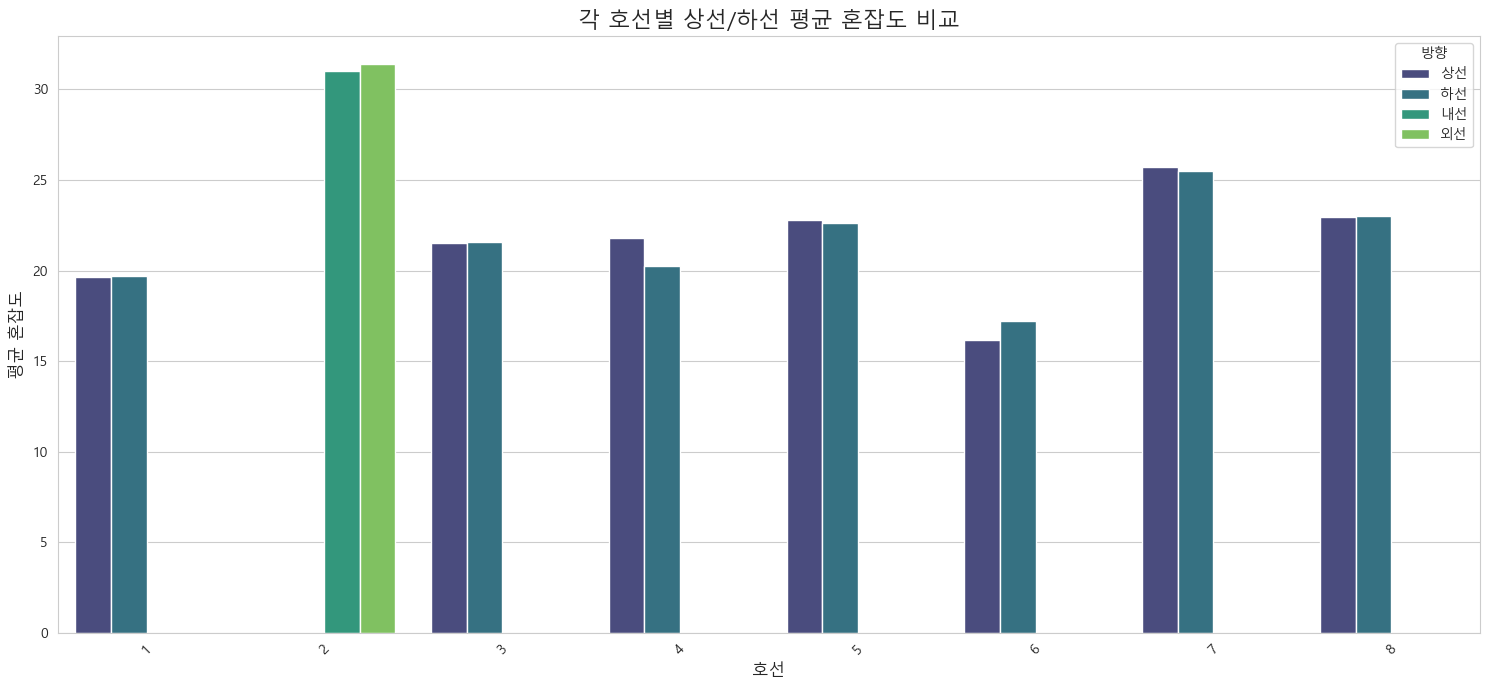

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏÉùÏÑ±Îêú direction_analysis Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# ÎßåÏïΩ direction_analysisÍ∞Ä ÏóÜÎã§Î©¥, ÏïÑÎûò ÏΩîÎìúÎ•º Îã§Ïãú Ïã§ÌñâÌïòÏó¨ ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
# direction_analysis = df_1.groupby(['line', 'direction']).agg(
#     mean_congestion=('congestion', 'mean'),
#     mean_discomfort_index=('discomfort_index', 'mean')
# ).reset_index()

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic' # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ

# 1. Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌèâÍ∑† ÌòºÏû°ÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 7))
sns.barplot(data=direction_analysis, x='line', y='mean_congestion', hue='direction', palette='viridis')
plt.title('Í∞Å Ìò∏ÏÑ†Î≥Ñ ÏÉÅÏÑ†/ÌïòÏÑ† ÌèâÍ∑† ÌòºÏû°ÎèÑ ÎπÑÍµê', fontsize=16)
plt.xlabel('Ìò∏ÏÑ†', fontsize=12)
plt.ylabel('ÌèâÍ∑† ÌòºÏû°ÎèÑ', fontsize=12)
plt.xticks(rotation=45) # Ìò∏ÏÑ† Ïù¥Î¶ÑÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.legend(title='Î∞©Ìñ•')
plt.tight_layout() # Í∑∏ÎûòÌîÑ ÏöîÏÜåÎì§Ïù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÏûêÎèô Ï°∞Ï†ï
plt.show()

# 2021-2022 Ï†úÍ±∞

- 2021ÎÖÑÍ≥º 2022ÎÖÑÎèÑÏóê ÏΩîÎ°úÎÇò Î∞îÏù¥Îü¨Ïä§Î°ú Ïù∏Ìïú Í±∞Î¶¨ÎëêÍ∏∞ Ï†ïÏ±ÖÏúºÎ°ú Ïù∏Ìï¥ Ìñ•ÌõÑ Î™®Îç∏ÎßÅÏóê ÏûàÏñ¥ Î∂àÌïÑÏöîÌïú ÏöîÏÜåÍ∞Ä Îì§Ïñ¥Í∞à Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†úÍ±∞Î•º Ìï¥ Ï§ÄÎã§.

In [57]:
# Ïó∞ÎèÑ Ï∂îÏ∂úÌïòÏó¨ ÌïÑÌÑ∞ÎßÅ
df_1 = df[~df['date_dt'].dt.year.isin([2021, 2022])]

# ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±

In [58]:
# ÏãúÍ∞ÑÎåÄ Ï°∞Í±¥ Ï†ïÏùò
conditions = [
    (df_1['hour'] >= 7) & (df_1['hour'] <= 9),  # Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ (07Ïãú, 08Ïãú, 09Ïãú)
    (df_1['hour'] >= 18) & (df_1['hour'] <= 20) # Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ (18Ïãú, 19Ïãú, 20Ïãú)
]

# Í∞Å Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Í∞í Ï†ïÏùò
choices = ['Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ', 'Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ']

# np.selectÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ 'ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ' Ïª¨Îüº ÏÉùÏÑ±
# Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞ 'Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ'Î°ú Î∂ÑÎ•ò
df_1['ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ'] = np.select(conditions, choices, default='Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ')

# Í≤∞Í≥º ÌôïÏù∏ (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
print(df_1[['hour', 'ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ']].head())
print(df_1['ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ'].value_counts())

C:\Users\mmtjs\AppData\Local\Temp\ipykernel_19072\2817711629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ'] = np.select(conditions, choices, default='Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ')


          hour  ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ
10331755     0  Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ
10331756     5  Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ
10331757     6  Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ
10331758     7  Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ
10331759     8  Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ
ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ
Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ    3680655
Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ     788712
Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ     788711
Name: count, dtype: int64


In [59]:
import pandas as pd
import numpy as np
# --- 'is_high_discomfort' ÌîåÎûòÍ∑∏ ÏÉùÏÑ± (ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ±Ïùò Ï†ÑÏ†ú Ï°∞Í±¥) ---
# 'di_level'Ïù¥ 'Î∂àÏæå' ÎòêÎäî 'Îß§Ïö∞ Î∂àÏæå'Ïù∏ Í≤ΩÏö∞Î•º ÎÜíÏùÄ Î∂àÏæåÏßÄÏàòÎ°ú Ï†ïÏùò
df_1['is_high_discomfort'] = df_1['di_level'].isin(['Î∂àÏæå', 'Îß§Ïö∞ Î∂àÏæå']).astype(int)
# --- 'is_high_discomfort' ÌîåÎûòÍ∑∏ ÏÉùÏÑ± ÎÅù ---

print("--- ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± Ï†Ñ df_1Ïùò ÏùºÎ∂Ä (Í∏∞Ï°¥ Ïª¨Îüº ÌôïÏù∏) ---")
print(df_1[['hour', 'di_level', 'discomfort_index', 'is_weekend_or_holiday', 'ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ', 'is_high_discomfort']].head())
print("\n")

### 2. ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± (Í∏∞Ï°¥ 'ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ' Ïª¨Îüº Í∏∞Ï§ÄÏúºÎ°ú)

# 2.1. 'ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ'Ïóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàò ÏÉùÏÑ±
# Í∞Å ÏãúÍ∞ÑÎåÄ Ïπ¥ÌÖåÍ≥†Î¶¨('Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ', 'Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ', 'Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ')Ïóê ÎåÄÌïú Ïù¥ÏßÑ Ïª¨ÎüºÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
# drop_first=FalseÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îì† Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎåÄÌïú ÎçîÎØ∏ Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
time_category_dummies = pd.get_dummies(df_1['ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ'], prefix='ÏãúÍ∞ÑÎåÄ', dtype=int)
df_1 = pd.concat([df_1, time_category_dummies], axis=1)

# 2.2. Î∂àÏæåÏßÄÏàòÏôÄ Í∞Å ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ Ï°∞Ìï© (Ïó∞ÏÜçÌòï ÏÉÅÌò∏ÏûëÏö©)
# Í∞Å ÏãúÍ∞ÑÎåÄ ÎçîÎØ∏ Î≥ÄÏàòÏôÄ discomfort_indexÎ•º Í≥±Ìï©ÎãàÎã§.
df_1['discomfort_index_x_Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ'] = df_1['discomfort_index'] * df_1['ÏãúÍ∞ÑÎåÄ_Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ']
df_1['discomfort_index_x_Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ'] = df_1['discomfort_index'] * df_1['ÏãúÍ∞ÑÎåÄ_Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ']
df_1['discomfort_index_x_Í∏∞ÌÉÄÏãúÍ∞ÑÎåÄ'] = df_1['discomfort_index'] * df_1['ÏãúÍ∞ÑÎåÄ_Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ']

# 2.3. ÎÜíÏùÄ Î∂àÏæåÏßÄÏàòÏôÄ Í∞Å ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ Ï°∞Ìï© (Ïù¥ÏßÑÌòï ÏÉÅÌò∏ÏûëÏö©)
# Í∞Å ÏãúÍ∞ÑÎåÄ ÎçîÎØ∏ Î≥ÄÏàòÏôÄ is_high_discomfortÎ•º Í≥±Ìï©ÎãàÎã§.
df_1['is_high_di_x_Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ'] = df_1['is_high_discomfort'] * df_1['ÏãúÍ∞ÑÎåÄ_Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ']
df_1['is_high_di_x_Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ'] = df_1['is_high_discomfort'] * df_1['ÏãúÍ∞ÑÎåÄ_Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ']
df_1['is_high_di_x_Í∏∞ÌÉÄÏãúÍ∞ÑÎåÄ'] = df_1['is_high_discomfort'] * df_1['ÏãúÍ∞ÑÎåÄ_Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ']

# 2.4. Î∂àÏæåÏßÄÏàòÏôÄ Ìú¥Ïùº Ïó¨Î∂Ä Ï°∞Ìï© (Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄ)
# Ìú¥ÏùºÏóê Î∂àÏæåÏßÄÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù Í∞íÏù¥ Ïª§Ïßê
df_1['discomfort_index_x_is_weekend_or_holiday'] = df_1['discomfort_index'] * df_1['is_weekend_or_holiday']

# 2.5. ÎÜíÏùÄ Î∂àÏæåÏßÄÏàòÏôÄ Ìú¥Ïùº Ïó¨Î∂Ä Ï°∞Ìï© (Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄ)
# Î∂àÏæåÏßÄÏàòÍ∞Ä ÎÜíÍ≥† Ìú¥ÏùºÏù∏ Í≤ΩÏö∞ 1, ÏïÑÎãàÎ©¥ 0
df_1['is_high_di_weekend_or_holiday'] = (df_1['is_high_discomfort'] & df_1['is_weekend_or_holiday']).astype(int)


print("\n--- ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± ÌõÑ df_1Ïùò ÏùºÎ∂Ä ---")
print(df_1[[
    'hour', 'di_level', 'discomfort_index', 'is_weekend_or_holiday', 'ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ', 'is_high_discomfort',
    'ÏãúÍ∞ÑÎåÄ_Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ', 'ÏãúÍ∞ÑÎåÄ_Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ', 'ÏãúÍ∞ÑÎåÄ_Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ', # ÏÉùÏÑ±Îêú ÎçîÎØ∏ Î≥ÄÏàòÎì§
    'discomfort_index_x_Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ', 'discomfort_index_x_Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ', 'discomfort_index_x_Í∏∞ÌÉÄÏãúÍ∞ÑÎåÄ',
    'is_high_di_x_Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ', 'is_high_di_x_Ìá¥Í∑ºÏãúÍ∞ÑÎåÄ', 'is_high_di_x_Í∏∞ÌÉÄÏãúÍ∞ÑÎåÄ',
    'discomfort_index_x_is_weekend_or_holiday', 'is_high_di_weekend_or_holiday'
]].head())

C:\Users\mmtjs\AppData\Local\Temp\ipykernel_19072\2814744786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['is_high_discomfort'] = df_1['di_level'].isin(['Î∂àÏæå', 'Îß§Ïö∞ Î∂àÏæå']).astype(int)


--- ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± Ï†Ñ df_1Ïùò ÏùºÎ∂Ä (Í∏∞Ï°¥ Ïª¨Îüº ÌôïÏù∏) ---
          hour di_level  discomfort_index  is_weekend_or_holiday  ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ  \
10331755     0       ÏæåÏ†Å         37.231005                      1  Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ   
10331756     5       ÏæåÏ†Å         37.336308                      1  Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ   
10331757     6       ÏæåÏ†Å         34.742504                      1  Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ   
10331758     7       ÏæåÏ†Å         32.584688                      1  Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ   
10331759     8       ÏæåÏ†Å         31.711920                      1  Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ   

          is_high_discomfort  
10331755                   0  
10331756                   0  
10331757                   0  
10331758                   0  
10331759                   0  



--- ÏÉÅÌò∏ÏûëÏö© Î≥ÄÏàò ÏÉùÏÑ± ÌõÑ df_1Ïùò ÏùºÎ∂Ä ---
          hour di_level  discomfort_index  is_weekend_or_holiday  ÏãúÍ∞ÑÎåÄ_Íµ¨Î∂Ñ  \
10331755     0       ÏæåÏ†Å         37.231005            

In [60]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5258078 entries, 10331755 to 15589832
Data columns (total 40 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   line                                      int64         
 1   station_number                            int64         
 2   station_name                              object        
 3   direction                                 object        
 4   stn                                       int64         
 5   ta                                        float64       
 6   wd                                        float64       
 7   ws                                        float64       
 8   rn_hr1                                    float64       
 9   hm                                        float64       
 10  si                                        float64       
 11  chi                                       float64       
 12  congestion 

# ÏÉÅÍ¥Ä Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÌîºÏ≤ò ÏÑ†ÌÉù

| Î∂ÑÏÑù Î™©Ï†Å                          | ÏÇ¨Ïö©Ìï† Î∂ÑÏÑù Î∞©Î≤ï                                        | ÏÑ§Î™Ö                       |
| ------------------------------- | ------------------------------------------------ | ------------------------ |
| **ÌòºÏû°ÎèÑÏôÄ Ïñ¥Îñ§ Î≥ÄÏàòÎì§Ïù¥ Í¥ÄÎ†® ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥† Ïã∂Îã§** | `Pearson` ÎòêÎäî `Spearman` ÏÉÅÍ¥ÄÍ≥ÑÏàò                     | ÏÑ†Ìòï/ÎπÑÏÑ†Ìòï **ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎßå** ÌåêÎã®     |
| **ÌòºÏû°ÎèÑÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏ÏùÑ Ìï¥ÏÑùÌïòÍ≥† Ïã∂Îã§**     | `Poisson ÌöåÍ∑Ä`                                     | ÌÜµÍ≥ÑÏ†Å **Ïú†ÏùòÏÑ± + Ïù∏Í≥º Ìï¥ÏÑù** Í∞ÄÎä•   |
| **ÌòºÏû°ÎèÑÎ•º ÏòàÏ∏°ÌïòÍ≥† Ïã∂Îã§ (Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Í∞í ÎΩëÍ∏∞)**  | üí° Î®∏Ïã†Îü¨Îãù Î™®Îç∏ (Ïòà: Random Forest, XGBoost, LightGBM) | ÏòàÏ∏° Ï†ïÌôïÎèÑÏóê ÏßëÏ§ë, **ÏÑ§Î™ÖÎ†•ÏùÄ Îñ®Ïñ¥Ïßê** |


In [61]:
# ÌïÑÏöîÌïú ÏàòÏπòÌòï Î≥ÄÏàòÎì§Îßå Ï∂îÎ†§ÏÑú ÌôïÏù∏
numerical_cols = ['ta', 'hm', 'ws', 'rn_day', 'rn_hr1', 'si', 'chi', 'discomfort_index', 'congestion']
df_corr = df_1[numerical_cols]

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
pearson_corr = df_corr.corr(method='pearson')
spearman_corr = df_corr.corr(method='spearman')


C:\Users\mmtjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


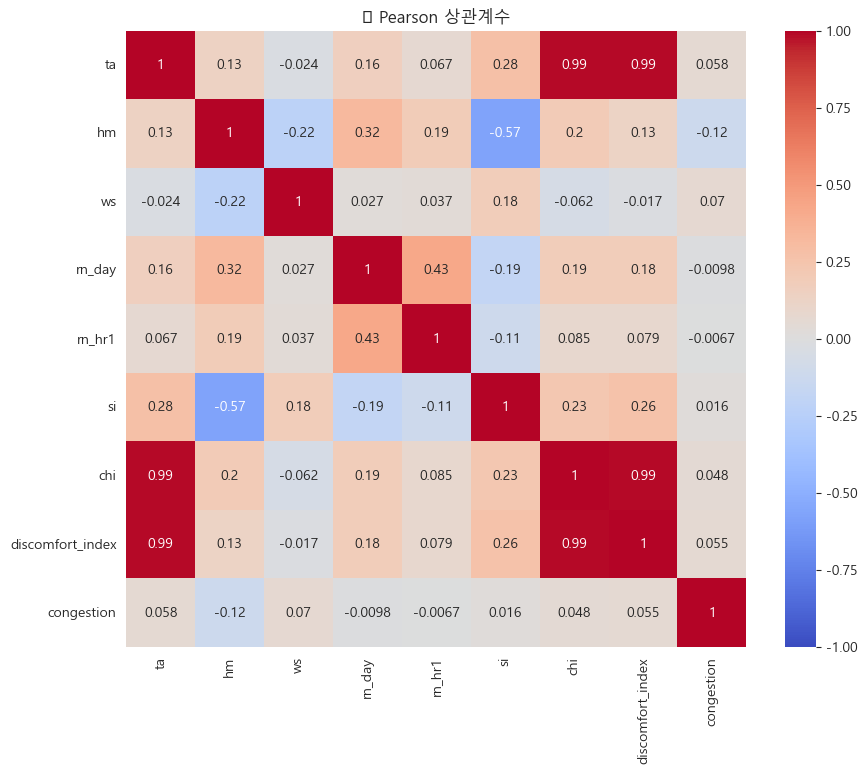

C:\Users\mmtjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


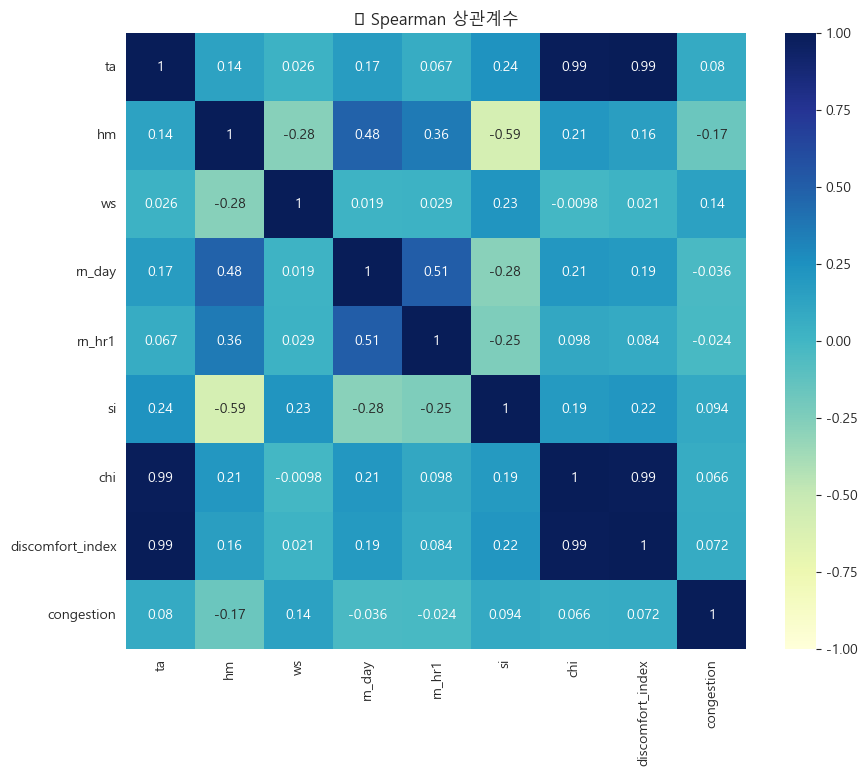

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson ÌûàÌä∏Îßµ
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("üìä Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò")
plt.show()

# Spearman ÌûàÌä∏Îßµ (ÏÑ†ÌÉù)
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("üìä Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò")
plt.show()

- ÏÉÅÍ¥Ä Î∂ÑÏÑù ÏöîÏïΩ(pearson, spearman Í∏∞Ï§Ä ÌòºÏû°ÎèÑÏôÄÏùò Í¥ÄÍ≥Ñ)

| Î≥ÄÏàò                            | ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò | Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò | ÏöîÏïΩ Ìï¥ÏÑù                                                         |
| ----------------------------- | -------- | --------- | ------------------------------------------------------------- |
| **Í∏∞Ïò® (`ta`)**                 | 0.058    | 0.080     | ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥Ä. Í∏∞Ïò®Ïù¥ ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑÍ∞Ä ÏÜåÌè≠ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏúºÎÇò, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í∞ïÌïòÎã§Í≥† Î≥¥Í∏¥ Ïñ¥Î†§ÏõÄ.   |
| **ÏäµÎèÑ (`hm`)**                 | -0.12    | -0.17     | **ÏùåÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä Í∞ÄÏû• ÎöúÎ†∑Ìï®.** ÏäµÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑÍ∞Ä ÎÇÆÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÎπÑÍµêÏ†Å Î∂ÑÎ™ÖÌï®.         |
| **ÌíçÏÜç (`ws`)**                 | 0.07     | 0.14      | Îã§ÏÜå ÏïΩÌïòÏßÄÎßå ÏñëÏùò ÏÉÅÍ¥Ä. Î∞îÎûåÏù¥ Í∞ïÌïú ÎÇ† Ïô∏Î∂Ä Ïù¥ÎèôÏù¥ ÌôúÎ∞úÌï† Ïàò ÏûàÎã§Îäî Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±.              |
| **ÏùºÏÇ¨Îüâ (`si`)**                | 0.016    | 0.094     | Í±∞Ïùò ÏòÅÌñ• ÏóÜÏùå. Îã§Îßå, Ïä§ÌîºÏñ¥Îßå Í∏∞Ï§ÄÏúºÎ°úÎäî ÏïΩÍ∞ÑÏùò Îã®Ï°∞ Ï¶ùÍ∞Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå.               |
| **Ï≤¥Í∞êÏò®ÎèÑ (`chi`)**              | 0.048    | 0.066     | ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Îß§Ïö∞ ÏïΩÌïòÎ©∞, ÌòºÏû°ÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Í≥† Î≥¥Í∏∞Îäî Ïñ¥Î†§ÏõÄ.                          |
| **Î∂àÏæåÏßÄÏàò (`Discomfort_INDEX`)** | 0.055    | 0.072     | Îã§ÏÜå ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥Ä. Î∂àÏæåÏßÄÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌòºÏû°ÎèÑÍ∞Ä Îã§ÏÜå Ï¶ùÍ∞ÄÌï† Ïàò ÏûàÏùå. Îã§Îßå Í∞ïÌïú Ïù∏Í≥ºÎùºÍ≥† Î≥¥Í∏∞Îäî Ïñ¥Î†§ÏõÄ. |
| **Í∞ïÏàòÎüâ (`rn_day`, `rn_hr1`)**  | Í±∞Ïùò Î¨¥Í¥Ä    | Í±∞Ïùò Î¨¥Í¥Ä     | ÌòºÏû°ÎèÑÏôÄÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏÇ¨Ïã§ÏÉÅ ÏóÜÏùå. ÎπÑÍ∞Ä ÏôÄÎèÑ ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑÏóê ÌÅ∞ Î≥ÄÌôîÎäî ÏóÜÏùÑ Ïàò ÏûàÏùå.               |


- üîç Ï¢ÖÌï© Ìï¥ÏÑù (Ìï¥ÏÑù Ï§ëÏã¨ ÏöîÏïΩ)
    - ÌòºÏû°ÎèÑÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•Ïù¥ ÏûàÏñ¥ Î≥¥Ïù¥Îäî Î≥ÄÏàòÎäî ÏäµÎèÑ(hm)Í∞Ä Í∞ÄÏû• Î™ÖÌôïÌï®.

        - ÎÜíÏùÄ ÏäµÎèÑ ‚Üí ÎÇÆÏùÄ ÌòºÏû°ÎèÑÎ°ú Ïù¥Ïñ¥ÏßÄÎäî ÏùåÏùò Í¥ÄÍ≥ÑÍ∞Ä Í∞ïÌï®.

        - Ïã§ÏÉùÌôú Ìï¥ÏÑù: ÍøâÍøâÌïòÍ≥† Î∂àÏæåÌïú ÎÇ†Ïî®ÏóêÎäî ÎåÄÏ§ëÍµêÌÜµ Ïô∏Î∂ÄÏù¥ÎèôÏù¥ Ï§ÑÏñ¥Îì§Í±∞ÎÇò ÏãúÏ∞® Î∂ÑÏÇ∞Ïù¥ ÏùºÏñ¥ÎÇ† Ïàò ÏûàÏùå.

    - Í∏∞Ïò®(ta), Î∂àÏæåÏßÄÏàò(Discomfort_INDEX), ÌíçÏÜç(ws)Îäî ÏùºÏ†ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÏù¥ ÏûàÏúºÎÇò, Îß§Ïö∞ ÏïΩÌïú ÏàòÏ§ÄÏûÑ.

        - Ïù¥Îäî Îã®ÎèÖ Î≥ÄÏàòÎ°ú ÌòºÏû°ÎèÑÎ•º ÏÑ§Î™ÖÌïòÍ∏∞Î≥¥Îã§Îäî, Îã§Î•∏ Î≥ÄÏàòÏôÄÏùò Ï°∞Ìï©ÏúºÎ°ú ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ñÎäî Í≤ΩÏö∞Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.

    - Ï≤¥Í∞êÏò®ÎèÑ(chi)ÏôÄ ÏùºÏÇ¨Îüâ(si)ÏùÄ ÌòºÏû°ÎèÑÏôÄ Í±∞Ïùò Î¨¥Í¥Ä.

        - Îî∞ÎùºÏÑú ÏõêÏù∏ Î∂ÑÏÑùÏóêÏÑúÎäî Ïö∞ÏÑ†ÏàúÏúÑÎ•º ÎÇÆÍ≤å ÎëêÎäî Í≤ÉÏù¥ Ï†ÅÏ†àÌï®.

    - Í∞ïÏàòÎüâÏùÄ Î¨¥Ïãú Í∞ÄÎä•. ÎπÑÍ∞Ä ÏôÄÎèÑ ÏßÄÌïòÏ≤† Ïù¥Ïö©ÎüâÏóê ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§Î©¥, ÏÇ¨ÎûåÎì§Ïù¥ Ïù¥ÎØ∏ Ïã§ÎÇ¥ Ïù¥ÎèôÏùÑ Í∏∞Î≥∏Í∞íÏúºÎ°ú ÎëêÍ≥† ÏûàÎã§Îäî ÏùòÎØ∏Ïùº Ïàò ÏûàÏùå.

- ‚úÖ Í≤∞Î°†: Î≥ÄÏàò ÏÑ†ÌÉù Ï†ÑÎûµ
    - ÏõêÏù∏ Î∂ÑÏÑù / ÏÑ†Ìòï ÌöåÍ∑ÄÏö© Ï£ºÏöî Î≥ÄÏàò:

        - hm, ta, ws, Discomfort_INDEX

    - ÏòàÏ∏° Î™®Îç∏ ÌôïÏû•Ïö© Î∂ÄÍ∞Ä Î≥ÄÏàò (ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Ï∂îÍ∞Ä):

        - hour, line, direction, station_name, is_weekend_or_holiday

- ‚úÖ ÏÑ†ÌÉùÌïú Î≥ÄÏàò Í∏∞Î∞ò Î™®Îç∏ÎßÅÏùÑ ÏúÑÌïú ÌïÑÏàò Í≥ºÏ†ï ÏöîÏïΩ

| Îã®Í≥Ñ                            | ÏÑ§Î™Ö                                                  | Î™©Ï†Å                  |
| ----------------------------- | --------------------------------------------------- | ------------------- |
| **1. Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ (ÏÑ†ÌÉùÏ†Å)**          | ÌöåÍ∑ÄÎÇò Í±∞Î¶¨ Í∏∞Î∞ò Î™®Îç∏(KNN, SVM Îì±)ÏóêÏÑúÎäî Î≥ÄÏàò Îã®ÏúÑ ÌÜµÏùºÏùÑ ÏúÑÌï¥ ÌëúÏ§ÄÌôî/Ï†ïÍ∑úÌôî ÌïÑÏöî | Î™®Îç∏ ÏÑ±Îä• Ìñ•ÏÉÅ, Ìï¥ÏÑù ÏùºÍ¥ÄÏÑ± ÌôïÎ≥¥ |
| **2. Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†êÍ≤Ä (VIF)**         | ÏÑ†ÌÉùÎêú Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÑàÎ¨¥ ÎÜíÏúºÎ©¥ ÌöåÍ∑Ä Í≥ÑÏàòÍ∞Ä Î∂àÏïàÏ†ï                    | ÌöåÍ∑ÄÍ≥ÑÏàò ÏôúÍ≥° Î∞©ÏßÄ          |
| **3. Ïù¥ÏÉÅÏπò Î∞è ÏòÅÌñ•Î†• Í¥ÄÏ∏°Ïπò Ï†êÍ≤Ä**       | ÏùºÎ∂Ä Ïù¥ÏÉÅÍ∞íÏù¥ Î™®Îç∏ÏùÑ ÏôúÍ≥°Ìï† Ïàò ÏûàÏùå                                | ÌöåÍ∑Ä Ï†ÅÌï©ÎèÑ Ìñ•ÏÉÅ           |
| **4. ÌïôÏäµ/Í≤ÄÏ¶ù Î∂ÑÎ¶¨ Î∞è ÍµêÏ∞®Í≤ÄÏ¶ù**        | Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Î∞è ÏùºÎ∞òÌôî Îä•Î†• ÌôïÏù∏                                  | ÏïàÏ†ïÏ†Å ÏÑ±Îä• ÌèâÍ∞Ä           |
| **5. ÌèâÍ∞Ä ÏßÄÌëú ÏÑ§Ï†ï**               | MSE, RMSE, MAE, R¬≤, Adjusted R¬≤ Îì±                   | Î™®Îç∏Ïùò Ïã§Ï†ú ÏòàÏ∏°Î†•ÏùÑ ÏàòÏπòÎ°ú ÌèâÍ∞Ä  |
| **6. ÏòàÏ∏° Í≤∞Í≥º Ìï¥ÏÑù Î∞è ÏûîÏ∞® Î∂ÑÏÑù**       | Î™®Îç∏Ïùò ÏòàÏ∏° ÌïúÍ≥Ñ Î∞è Ìå®ÌÑ¥ ÌååÏïÖ                                   | Ìï¥ÏÑù Í∏∞Î∞ò Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú       |
| **7. Î≥ÄÏàò Ï§ëÏöîÎèÑ Ïû¨Í≤ÄÌÜ† (ÏòàÏ∏° Î™®Îç∏Ïùò Í≤ΩÏö∞)** | RandomForest, XGBoost Îì±ÏóêÏÑú Ï§ëÏöî Î≥ÄÏàò ÌååÏïÖ                  | ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Î∞è Ìï¥ÏÑù Î≥¥ÏôÑ    |


In [63]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5258078 entries, 10331755 to 15589832
Data columns (total 40 columns):
 #   Column                                    Dtype         
---  ------                                    -----         
 0   line                                      int64         
 1   station_number                            int64         
 2   station_name                              object        
 3   direction                                 object        
 4   stn                                       int64         
 5   ta                                        float64       
 6   wd                                        float64       
 7   ws                                        float64       
 8   rn_hr1                                    float64       
 9   hm                                        float64       
 10  si                                        float64       
 11  chi                                       float64       
 12  congestion 

# Íµ∞Ïßë Î∂ÑÏÑù

--- df_1 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÏúÑ 5Í∞ú Ìñâ (ÌôïÏù∏Ïö©) ---
          line  station_number station_name direction  stn   ta     wd   ws  \
10331755     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419  0.3  318.0  3.4   
10331756     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -0.8   29.6  3.7   
10331757     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -1.8   48.1  3.4   
10331758     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -2.6   21.4  2.9   
10331759     1             150          ÏÑúÏö∏Ïó≠        ÏÉÅÏÑ†  419 -3.0  353.4  2.8   

          rn_hr1    hm  ...  ÏãúÍ∞ÑÎåÄ_Ï∂úÍ∑º ÏãúÍ∞ÑÎåÄ  ÏãúÍ∞ÑÎåÄ_Ìá¥Í∑º ÏãúÍ∞ÑÎåÄ  discomfort_index_x_Ï∂úÍ∑ºÏãúÍ∞ÑÎåÄ  \
10331755     0.0  66.5  ...           0           0                  0.000000   
10331756     0.0  55.1  ...           0           0                  0.000000   
10331757     0.0  62.8  ...           0           0                  0.000000   
10331758     0.0  68.8  ...           1       

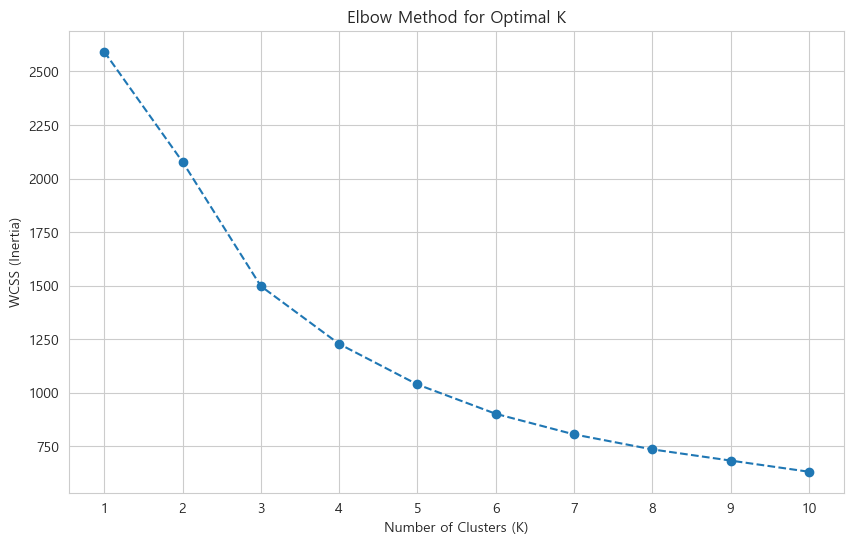

ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ WCSS Í∞êÏÜåÏú®Ïù¥ Í∏âÍ≤©Ìûà Ï§ÑÏñ¥ÎìúÎäî ÏßÄÏ†êÏùÑ ÏµúÏ†ÅÏùò KÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.

--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§. ÏµúÏ†ÅÏùò K Í∞í: 3 ---
--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (K=3) - ÏÉÅÏúÑ 5Í∞ú Ïó≠ ---
  station_name  cluster_label
0           Í∞ÄÎä•              0
1         Í∞ÄÎùΩÏãúÏû•              1
2      Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ              1
3           Í∞ÑÏÑù              0
4           Í∞ïÎÇ®              1


--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† ÌäπÏÑ± (Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÏõêÎ≥∏ Í∞í) ---
               mean_congestion  max_congestion  mean_discomfort_index  \
cluster_label                                                           
0                    14.807946          57.128              57.493772   
1                    33.353439         119.000              58.478380   
2                     5.763542          74.000              27.118209   

               prop_high_discomfort    mean_ta    mean_hm   mean_ws  \
cluster_label     

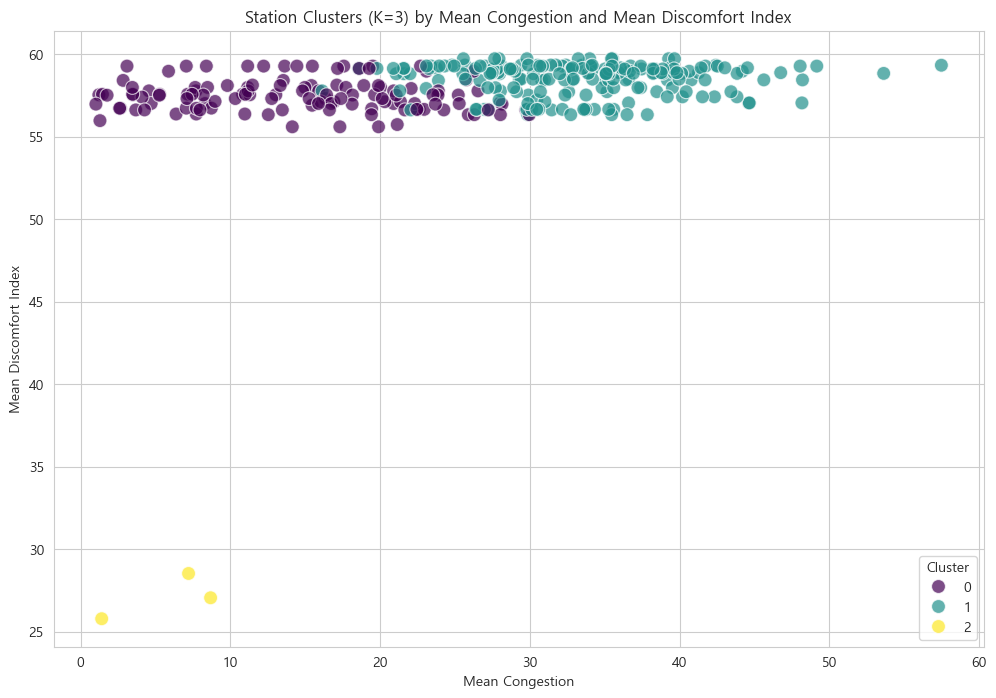

--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠ Ïù¥Î¶Ñ (ÏÉÅÏúÑ 10Í∞ú) ---

ÌÅ¥Îü¨Ïä§ÌÑ∞ 0:
['Í∞ÄÎä•', 'Í∞ÑÏÑù', 'Í∞ïÏùº', 'Í∞úÌôîÏÇ∞', 'Í≤ΩÏ∞∞Î≥ëÏõê', 'Í≥†Ïûî', 'Í≥µÎ¶â', 'Í¥ëÏö¥ÎåÄ', 'Íµ¨ÏÇ∞', 'Íµ¨ÌååÎ∞ú']
------------------------------

ÌÅ¥Îü¨Ïä§ÌÑ∞ 1:
['Í∞ÄÎùΩÏãúÏû•', 'Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ', 'Í∞ïÎÇ®', 'Í∞ïÎÇ®Íµ¨Ï≤≠', 'Í∞ïÎèô', 'Í∞ïÎèôÍµ¨Ï≤≠', 'Í∞ïÎ≥Ä', 'Í∞úÎ¥â', 'Í±¥ÎåÄÏûÖÍµ¨', 'Í≤ΩÎßàÍ≥µÏõê']
------------------------------

ÌÅ¥Îü¨Ïä§ÌÑ∞ 2:
['Ïó∞Ï≤ú', 'Ï†ÑÍ≥°', 'Ï≤≠ÏÇ∞']
------------------------------


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

if 'is_high_discomfort' not in df_1.columns:
    df_1['is_high_discomfort'] = df_1['di_level'].isin(['Î∂àÏæå', 'Îß§Ïö∞ Î∂àÏæå']).astype(int)

print("--- df_1 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò ÏÉÅÏúÑ 5Í∞ú Ìñâ (ÌôïÏù∏Ïö©) ---")
print(df_1.head())
print("\n")

### 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßëÍ≥Ñ
# Ïó≠ Î≥Ñ ÌäπÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÌîºÏ≤òÎ•º Ï†ïÏùòÌïòÍ≥† ÏßëÍ≥ÑÌï©ÎãàÎã§.
# Í∞Å Ïª¨ÎüºÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï† Îïå numeric_only=TrueÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï†ÅÏö©Ìï©ÎãàÎã§.
station_features = df_1.groupby('station_name').agg(
    mean_congestion=('congestion', lambda x: x.mean(numeric_only=True)),
    max_congestion=('congestion', 'max'),
    mean_discomfort_index=('discomfort_index', lambda x: x.mean(numeric_only=True)),
    prop_high_discomfort=('is_high_discomfort', lambda x: x.mean(numeric_only=True)), # ÎÜíÏùÄ Î∂àÏæåÏßÄÏàò Î∞úÏÉù ÎπÑÏú®
    mean_ta=('ta', lambda x: x.mean(numeric_only=True)),
    mean_hm=('hm', lambda x: x.mean(numeric_only=True)),
    mean_ws=('ws', lambda x: x.mean(numeric_only=True)),
    total_rn_day=('rn_day', 'sum') # sum()ÏùÄ Ïà´ÏûêÌòïÏù¥ ÏïÑÎãå Í∞íÏùÑ ÏûêÎèôÏúºÎ°ú Î¨¥ÏãúÌïòÎØÄÎ°ú Î≥ÄÍ≤Ω Î∂àÌïÑÏöî
).reset_index()

print("--- Ïó≠ Î≥Ñ ÏßëÍ≥ÑÎêú ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú Ìñâ) ---")
print(station_features.head())
print("\n")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò ÏÑ†ÌÉù (station_name Ïª¨Îüº Ï†úÏô∏)
features_for_clustering = station_features.drop(columns=['station_name'])

### 2. ÌîºÏ≤ò Ïä§ÏºÄÏùºÎßÅ
# StandardScalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌîºÏ≤òÎì§ÏùÑ ÌëúÏ§ÄÌôîÌï©ÎãàÎã§.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

print("--- Ïä§ÏºÄÏùºÎßÅÎêú ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ (ÏÉÅÏúÑ 5Í∞ú Ìñâ) ---")
print(scaled_features_df.head())
print("\n")

### 3. ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò(K) Í≤∞Ï†ï (ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï)
# WCSS (Within-Cluster Sum of Squares) ÎòêÎäî InertiaÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏóòÎ≥¥Ïö∞ Ìè¨Ïù∏Ìä∏Î•º Ï∞æÏäµÎãàÎã§.
wcss = []
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ ÏãúÎèÑ (ÌïÑÏöîÏóê Îî∞Îùº Î≤îÏúÑ Ï°∞Ï†ï Í∞ÄÎä•)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11)) # xÏ∂ï ÎààÍ∏àÏùÑ 1Î∂ÄÌÑ∞ 10ÍπåÏßÄ ÌëúÏãú
plt.grid(True)
plt.show()
print("ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ WCSS Í∞êÏÜåÏú®Ïù¥ Í∏âÍ≤©Ìûà Ï§ÑÏñ¥ÎìúÎäî ÏßÄÏ†êÏùÑ ÏµúÏ†ÅÏùò KÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.\n")

### 4. K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö©
# ÏóòÎ≥¥Ïö∞ Î∞©Î≤ïÏùÑ ÌÜµÌï¥ Í≤∞Ï†ïÎêú ÏµúÏ†ÅÏùò K Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# ÏïÑÎûò optimal_k Í∞íÏùÄ ÏóòÎ≥¥Ïö∞ Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Ï±ÑÏÜåÎ¶¨1ÎãòÍªòÏÑú ÏßÅÏ†ë Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.
# ÏòàÏãúÎ°ú 3ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄÎßå, Ïã§Ï†ú Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† Í∞ÄÏû• Ï†ÅÏ†àÌïú Í∞íÏùÑ ÏÑ†ÌÉùÌïòÏã≠ÏãúÏò§.
optimal_k = 3

print(f"--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏãúÏûëÌï©ÎãàÎã§. ÏµúÏ†ÅÏùò K Í∞í: {optimal_k} ---")
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# ÏõêÎ≥∏ Ïó≠ ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞Ïóê ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® Ï∂îÍ∞Ä
station_features['cluster_label'] = cluster_labels

print(f"--- K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (K={optimal_k}) - ÏÉÅÏúÑ 5Í∞ú Ïó≠ ---")
print(station_features[['station_name', 'cluster_label']].head())
print("\n")

### 5. Íµ∞Ïßë Í≤∞Í≥º Ìï¥ÏÑù Î∞è ÏãúÍ∞ÅÌôî

# 5.1. Í∞Å Íµ∞ÏßëÏùò ÌèâÍ∑† ÌäπÏÑ± Î∂ÑÏÑù
# Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÏõêÎ≥∏ ÌîºÏ≤òÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å Íµ∞ÏßëÏùò ÌäπÏÑ±ÏùÑ ÌååÏïÖÌïòÎäî Í≤ÉÏù¥ Îçî ÏßÅÍ¥ÄÏ†ÅÏûÖÎãàÎã§.
# station_name Ïª¨ÎüºÏùÑ Ï†úÏô∏ÌïòÍ≥† ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
cluster_summary = station_features.drop(columns=['station_name']).groupby('cluster_label').mean()
print("--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÌèâÍ∑† ÌäπÏÑ± (Ïä§ÏºÄÏùºÎßÅÎêòÏßÄ ÏïäÏùÄ ÏõêÎ≥∏ Í∞í) ---")
print(cluster_summary)
print("\n")

# 5.2. Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïó≠Ïùò Í∞úÏàò ÌôïÏù∏
print("--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïó≠Ïùò Í∞úÏàò ---")
print(station_features['cluster_label'].value_counts().sort_index())
print("\n")

# 5.3. ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Íµ∞Ïßë ÌäπÏÑ± ÌååÏïÖ
# Îëê Í∞ÄÏßÄ Ï£ºÏöî ÌîºÏ≤òÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# Ïòà: 'mean_congestion'Í≥º 'mean_discomfort_index'Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(data=station_features, x='mean_congestion', y='mean_discomfort_index',
                hue='cluster_label', palette='viridis', s=100, alpha=0.7)
plt.title(f'Station Clusters (K={optimal_k}) by Mean Congestion and Mean Discomfort Index')
plt.xlabel('Mean Congestion')
plt.ylabel('Mean Discomfort Index')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# 5.4. Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠ Ïù¥Î¶Ñ ÌôïÏù∏ (ÏùºÎ∂Ä)
print("--- Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠ Ïù¥Î¶Ñ (ÏÉÅÏúÑ 10Í∞ú) ---")
for i in range(optimal_k):
    print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ {i}:")
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïòÏó¨ Ï°∞Í±¥Î¨∏ Ï∂îÍ∞Ä
    if not station_features[station_features['cluster_label'] == i].empty:
        print(station_features[station_features['cluster_label'] == i]['station_name'].head(10).tolist())
    else:
        print("Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïòÎäî Ïó≠Ïù¥ ÏóÜÏäµÎãàÎã§.")
    print("-" * 30)


In [65]:
df_1['station_name'].unique()

array(['ÏÑúÏö∏Ïó≠', 'ÏãúÏ≤≠', 'Ï¢ÖÍ∞Å', 'Ï¢ÖÎ°ú3Í∞Ä', 'Ï¢ÖÎ°ú5Í∞Ä', 'ÎèôÎåÄÎ¨∏', 'Ïã†ÏÑ§Îèô', 'Ï†úÍ∏∞Îèô', 'Ï≤≠ÎüâÎ¶¨',
       'ÎèôÎ¨òÏïû', 'ÎÇ®ÏòÅ', 'Ïö©ÏÇ∞', 'ÎÖ∏ÎüâÏßÑ', 'ÎåÄÎ∞©', 'ÏòÅÎì±Ìè¨', 'Ïã†ÎèÑÎ¶º', 'ÌöåÍ∏∞', 'Ïô∏ÎåÄÏïû', 'Ïã†Ïù¥Î¨∏',
       'ÏÑùÍ≥Ñ', 'Í¥ëÏö¥ÎåÄ', 'ÏõîÍ≥Ñ', 'ÎÖπÏ≤ú', 'Ï∞ΩÎèô', 'Ïã†Í∏∏', 'Íµ¨Î°ú', 'Í∞úÎ¥â', 'Ïò§Î•òÎèô', 'Ïó≠Í≥°', 'Î∂ÄÏ≤ú',
       'ÏÜ°ÎÇ¥', 'Î∂ÄÌèâ', 'Î∞±Ïö¥', 'ÎèôÏïî', 'Ï£ºÏïà', 'Ï†úÎ¨ºÌè¨', 'ÎèôÏù∏Ï≤ú', 'Ïù∏Ï≤ú', 'Íµ¨Ïùº', 'ÏÜåÏÇ¨', 'Î∂ÄÍ∞ú',
       'Í∞ÑÏÑù', 'ÎèÑÏõê', 'Ïò®Ïàò', 'Ï§ëÎèô', 'ÎèÑÌôî', 'Î∞©Ìïô', 'ÎèÑÎ¥â', 'ÎèÑÎ¥âÏÇ∞', 'ÎßùÏõîÏÇ¨', 'ÌöåÎ£°',
       'ÏùòÏ†ïÎ∂Ä', 'Í∞ÄÎä•', 'ÎÖπÏñë', 'ÏñëÏ£º', 'ÎçïÍ≥Ñ', 'ÎçïÏ†ï', 'ÏßÄÌñâ', 'ÎèôÎëêÏ≤úÏ§ëÏïô', 'Î≥¥ÏÇ∞', 'ÎèôÎëêÏ≤ú',
       'ÏÜåÏöîÏÇ∞', 'Ï≤≠ÏÇ∞', 'Ï†ÑÍ≥°', 'Ïó∞Ï≤ú', 'ÏùÑÏßÄÎ°úÏûÖÍµ¨', 'ÏùÑÏßÄÎ°ú3Í∞Ä', 'ÏùÑÏßÄÎ°ú4Í∞Ä', 'ÎèôÎåÄÎ¨∏Ïó≠ÏÇ¨Î¨∏ÌôîÍ≥µÏõê',
       'Ïã†Îãπ', 'ÏÉÅÏôïÏã≠Î¶¨', 'ÏôïÏã≠Î¶¨', 'ÌïúÏñëÎåÄ', 'ÎöùÏÑ¨', 'ÏÑ±Ïàò', 'Í±¥ÎåÄÏûÖÍµ¨', 'Íµ¨Ïùò', 'Í∞ïÎ≥Ä', 'Ïû†Ïã§ÎÇòÎ£®',
       'Ï

- 1. ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò Î∞è Î∂ÑÌè¨
    - ÏµúÏ†ÅÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàòÎäî 3Í∞úÎ°ú ÏÑ†Ï†ïÌïòÏÖ®Í≥†, Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïó≠ Í∞úÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.
        - ÌÅ¥Îü¨Ïä§ÌÑ∞ 0: 125Í∞ú Ïó≠
        - ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: 196Í∞ú Ïó≠
        - ÌÅ¥Îü¨Ïä§ÌÑ∞ 2: 3Í∞ú Ïó≠ (Îß§Ïö∞ ÏÜåÏàò)

- 2. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÎπÑÍµê

|ÌÅ¥Îü¨Ïä§ÌÑ∞	|ÌèâÍ∑† ÌòºÏû°ÎèÑ (mean_congestion)	|ÏµúÎåÄ ÌòºÏû°ÎèÑ (max_congestion)	|ÌèâÍ∑† Î∂àÏæåÏßÄÏàò (mean_discomfort_index)	|ÎÜíÏùÄ Î∂àÏæåÏßÄÏàò ÎπÑÏú® (prop_high_discomfort)	|ÌèâÍ∑† Í∏∞Ïò® (mean_ta)	|ÌèâÍ∑† ÏäµÎèÑ (mean_hm)	|ÌèâÍ∑† ÌíçÏÜç (mean_ws)	|Ï¥ù Í∞ïÏàòÎüâ (total_rn_day)|
|----|----|----|----|---|---|---|---|----|
|0	|14.81	|57.13	|57.49	|0.049	|13.92	|66.22	|1.49	|101,710|
|1	|33.35	|119.00	|58.48	|0.051	|14.53	|62.39	|1.71	|154,151|
|2	|5.76	|74.00	|27.12	|0.000	|-5.86	|73.27	|0.99	|892|


- ÌÅ¥Îü¨Ïä§ÌÑ∞ 1ÏùÄ ÌèâÍ∑† ÌòºÏû°ÎèÑÏôÄ ÏµúÎåÄ ÌòºÏû°ÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÍ≥†, Î∂àÏæåÏßÄÏàòÎèÑ Í∞ÄÏû• ÎÜíÏùÄ Í∑∏Î£πÏûÖÎãàÎã§. Í∏∞Ïò®ÏùÄ Í∞ÄÏû• ÎÜíÍ≥†, Í∞ïÏàòÎüâÎèÑ Í∞ÄÏû• ÎßéÏäµÎãàÎã§.
- ÌÅ¥Îü¨Ïä§ÌÑ∞ 0ÏùÄ Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÌòºÏû°ÎèÑÏôÄ Î∂àÏæåÏßÄÏàòÎ•º Î≥¥Ïù¥Î©∞, Í∏∞Ïò®Í≥º Í∞ïÏàòÎüâÎèÑ Ï§ëÍ∞Ñ ÏàòÏ§ÄÏûÖÎãàÎã§.
- ÌÅ¥Îü¨Ïä§ÌÑ∞ 2Îäî ÌèâÍ∑† ÌòºÏû°ÎèÑÏôÄ Î∂àÏæåÏßÄÏàòÍ∞Ä Îß§Ïö∞ ÎÇÆÍ≥†, Í∏∞Ïò®ÎèÑ Îß§Ïö∞ ÎÇÆÏúºÎ©∞, Í∞ïÏàòÎüâÎèÑ Í±∞Ïùò ÏóÜÎäî ÌäπÏù¥Ìïú Í∑∏Î£πÏûÖÎãàÎã§. Ïó≠Ïù¥ 3Í∞úÎ°ú Îß§Ïö∞ Ï†ÅÏñ¥ ÌäπÏàòÌïú ÌôòÍ≤ΩÏù¥ÎÇò Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ïó≠Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.

- 3. ÏãúÍ∞ÅÌôî Ìï¥ÏÑù
    - ÏÇ∞Ï†êÎèÑ Í∑∏ÎûòÌîÑÏóêÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Í≥º 1ÏùÄ Î∂àÏæåÏßÄÏàò(ÏÑ∏Î°úÏ∂ï)Í∞Ä ÎπÑÏä∑Ìïú ÏàòÏ§ÄÏúºÎ°ú ÎÜíÍ≤å Î∂ÑÌè¨ÌïòÏßÄÎßå, ÌòºÏû°ÎèÑ(Í∞ÄÎ°úÏ∂ï)ÏóêÏÑúÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïù¥ Ìõ®Ïî¨ ÎÜíÏùÄ Í∞íÏùÑ Î≥¥ÏûÖÎãàÎã§.
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 2Îäî ÌòºÏû°ÎèÑÏôÄ Î∂àÏæåÏßÄÏàò Î™®Îëê ÎÇÆÏùÄ ÏòÅÏó≠Ïóê ÏúÑÏπòÌï¥ ÏûàÏñ¥, Îã§Î•∏ Îëê ÌÅ¥Îü¨Ïä§ÌÑ∞ÏôÄ Î™ÖÌôïÌûà Íµ¨Î∂ÑÎê©ÎãàÎã§.
- 4. Ï¢ÖÌï© Ìï¥ÏÑù Î∞è ÌôúÏö© Î∞©Ïïà
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (Í≥†ÌòºÏû°¬∑Í≥†Î∂àÏæåÏßÄÏàò Í∑∏Î£π): ÏÑúÏö∏ Ï£ºÏöî Ï§ëÏã¨ÏßÄÎÇò Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÎåÄ ÌòºÏû°Ïù¥ Ïã¨Ìïú Ïó≠Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§. Ïù¥ Í∑∏Î£πÏùÄ ÌòºÏû° ÏôÑÌôî Î∞è ÏæåÏ†ÅÌïú ÌôòÍ≤Ω Ï°∞ÏÑ±ÏùÑ ÏúÑÌïú Ïö∞ÏÑ† Í¥ÄÎ¶¨ ÎåÄÏÉÅÏûÖÎãàÎã§.
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (Ï§ëÍ∞Ñ ÌòºÏû°¬∑Ï§ëÍ∞Ñ Î∂àÏæåÏßÄÏàò Í∑∏Î£π): ÌòºÏû°ÎèÑÏôÄ Î∂àÏæåÏßÄÏàòÍ∞Ä Ï§ëÍ∞Ñ ÏàòÏ§ÄÏù∏ Ïó≠Îì§Î°ú, Í¥ÄÎ¶¨ Ïö∞ÏÑ†ÏàúÏúÑÎäî ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Î≥¥Îã§Îäî ÎÇÆÏúºÎÇò Ï£ºÍ∏∞Ï†ÅÏù∏ Î™®ÎãàÌÑ∞ÎßÅÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.
    - ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (Ï†ÄÌòºÏû°¬∑Ï†ÄÎ∂àÏæåÏßÄÏàò Í∑∏Î£π): ÌòºÏû°ÎèÑÍ∞Ä ÎÇÆÍ≥† ÏæåÏ†ÅÌïú ÌôòÍ≤ΩÏùÑ Í∞ÄÏßÑ Ïó≠Îì§Î°ú, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í¥ÄÎ¶¨ Î∂ÄÎã¥Ïù¥ Ï†ÅÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê©ÎãàÎã§. Îã§Îßå Ïó≠ ÏàòÍ∞Ä Ï†ÅÏñ¥ Í∞úÎ≥Ñ Ïó≠ ÌäπÏÑ±ÏùÑ Î©¥Î∞ÄÌûà Î∂ÑÏÑùÌï† ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

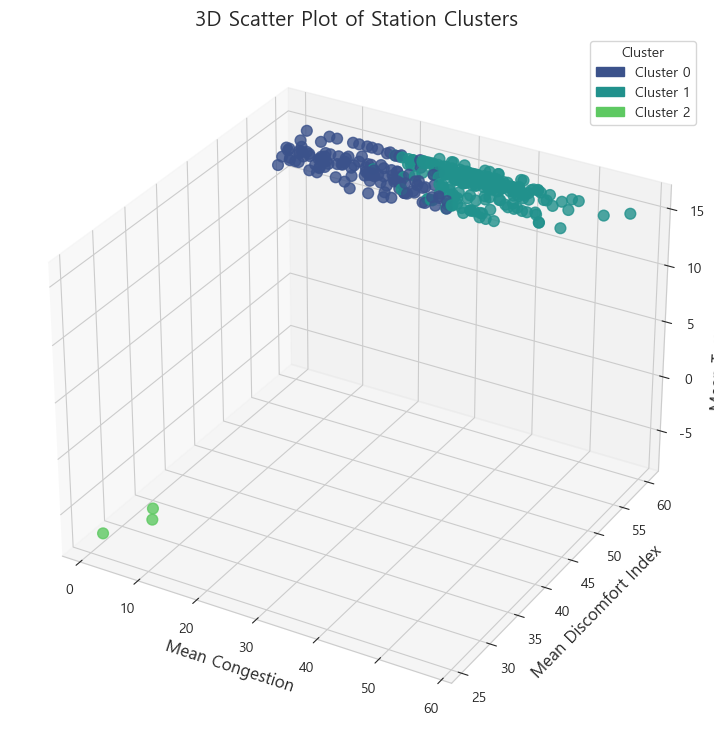

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D ÌîåÎ°ØÏùÑ ÏúÑÌïú Î™®Îìà
import seaborn as sns

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÍ∞Ä Ìè¨Ìï®Îêú station_features Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# x, y, z Ï∂ïÏóê ÏÇ¨Ïö©Ìï† Î≥ÄÏàò ÏßÄÏ†ï
x = station_features['mean_congestion']
y = station_features['mean_discomfort_index']
z = station_features['mean_ta']

# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®Ïóê Îî∞Îùº ÏÉâÏÉÅ ÏßÄÏ†ï
clusters = station_features['cluster_label']
palette = sns.color_palette("viridis", n_colors=clusters.nunique())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉâÏÉÅ Îß§Ìïë
colors = [palette[label] for label in clusters]

# 3D ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
scatter = ax.scatter(x, y, z, c=colors, s=60, alpha=0.8)

# Ï∂ï ÎùºÎ≤® ÏÑ§Ï†ï
ax.set_xlabel('Mean Congestion', fontsize=12)
ax.set_ylabel('Mean Discomfort Index', fontsize=12)
ax.set_zlabel('Mean Temperature (Ta)', fontsize=12)

# Ï†úÎ™© ÏÑ§Ï†ï
ax.set_title('3D Scatter Plot of Station Clusters', fontsize=15)

# Î≤îÎ°Ä ÏÉùÏÑ±
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÏÉâÏÉÅÍ≥º Ïù¥Î¶ÑÏùÑ Î≤îÎ°ÄÎ°ú ÌëúÏãú
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=palette[i], label=f'Cluster {i}') for i in range(clusters.nunique())]
ax.legend(handles=legend_patches, title='Cluster')

plt.show()

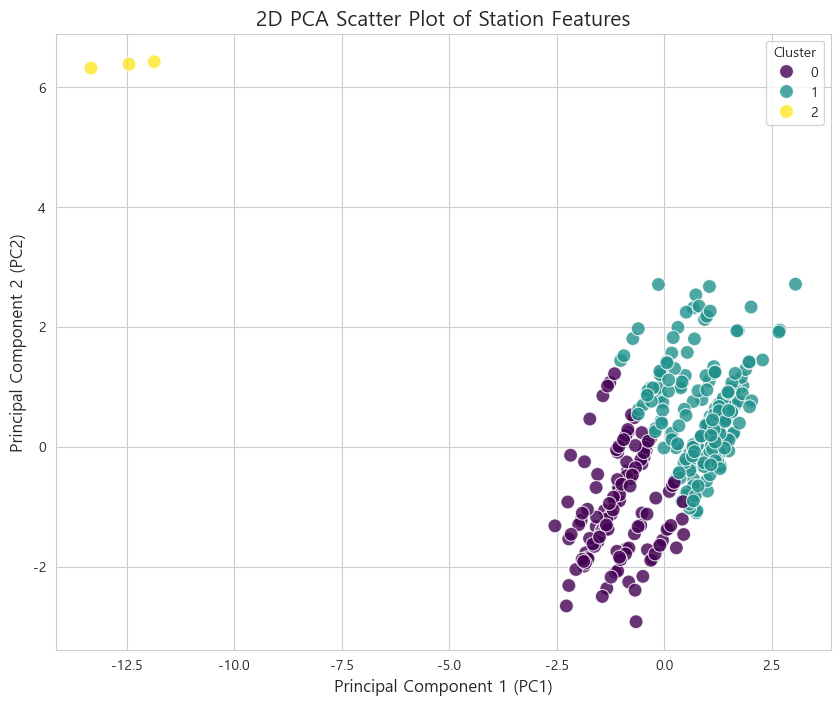

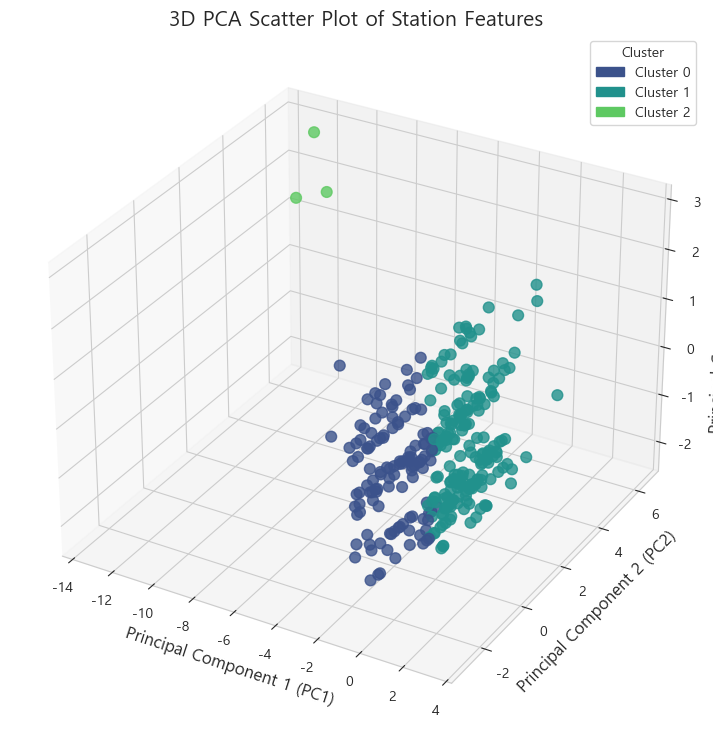

2D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®
PC1: 34.47%
PC2: 20.55%
2D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: 55.02%

3D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®
PC1: 34.47%
PC2: 20.55%
PC3: 15.97%
3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: 70.98%



In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# 1. PCA Ï†ÅÏö© (2Ï∞®Ïõê)
pca = PCA(n_components=2)
principal_components_2d = pca.fit_transform(scaled_features)


pca_df_2d = pd.DataFrame(data=principal_components_2d, columns=['PC1', 'PC2'])
pca_df_2d['cluster_label'] = cluster_labels  

# 2Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df_2d, x='PC1', y='PC2', hue='cluster_label', palette='viridis', s=100, alpha=0.8)
plt.title('2D PCA Scatter Plot of Station Features', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# PCA Ï†ÅÏö© -> 3Ï∞®Ïõê
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_features)


pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['cluster_label'] = cluster_labels 

# 3Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 3D ÏÇ∞Ï†êÎèÑ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Ï†ï
x = pca_df_3d['PC1']
y = pca_df_3d['PC2']
z = pca_df_3d['PC3']
clusters = pca_df_3d['cluster_label']

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉâÏÉÅ Îß§Ìïë
palette = sns.color_palette("viridis", n_colors=clusters.nunique())
colors = [palette[label] for label in clusters]

# 3D ÏÇ∞Ï†êÎèÑ Í∑∏Î¶¨Í∏∞
scatter = ax.scatter(x, y, z, c=colors, s=60, alpha=0.8)


ax.set_xlabel('Principal Component 1 (PC1)', fontsize=12)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize=12)
ax.set_zlabel('Principal Component 3 (PC3)', fontsize=12)


ax.set_title('3D PCA Scatter Plot of Station Features', fontsize=15)

# Î≤îÎ°Ä ÏÉùÏÑ±
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=palette[i], label=f'Cluster {i}') for i in range(clusters.nunique())]
ax.legend(handles=legend_patches, title='Cluster')

plt.show()

# 3. PCA Î≥ÄÎèôÏÑ± ÏÑ§Î™Ö ÎπÑÏú® ÌôïÏù∏
explained_variance_2d = pca.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

print("2D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®")
for i, v in enumerate(explained_variance_2d, start=1):
    print(f"PC{i}: {v:.2%}")
print(f"2D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: {explained_variance_2d.cumsum()[-1]:.2%}\n")

print("3D PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ Î∂ÑÏÇ∞ ÏÑ§Î™Ö ÎπÑÏú®")
for i, v in enumerate(explained_variance_3d, start=1):
    print(f"PC{i}: {v:.2%}")
print(f"3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®: {explained_variance_3d.cumsum()[-1]:.2%}\n")

 2DÏôÄ 3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú® Ï∞®Ïù¥Ïùò ÏùòÎØ∏

2D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®(55.02%):
PC1Í≥º PC2Îßå ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌïòÎäî Í≤ΩÏö∞, ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏÑ±(Ï†ïÎ≥¥)Ïùò ÏïΩ 55%Î•º Ïú†ÏßÄÌïòÍ≥† ÏûàÎäîÍ±∞Í≥†

Ïù¥Í≤ÉÏùÄ Ï∞®ÏõêÏùÑ 2Í∞ú(PC1, PC2)Î°ú Ï§ÑÏòÄÏùÑ Îïå ÏïΩ 45%Ïùò Ï†ïÎ≥¥Í∞Ä ÏÜêÏã§ÎêúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïòÍ≥†?

3D ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®(70.98%):
PC1, PC2Ïóê PC3ÍπåÏßÄ Ìè¨Ìï®ÌñàÏùÑ Îïå Îç∞Ïù¥ÌÑ∞Î•º ÏÑ§Î™ÖÌïòÎäî ÎπÑÏú®Ïù¥ 55.02%ÏóêÏÑú 70.98%Î°ú Ï¶ùÍ∞ÄÌïòÍ≥†

Îî∞ÎùºÏÑú 3Ï∞®ÏõêÏúºÎ°ú ÌôïÏû•ÌïòÎ©¥ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏïΩ 15.96%ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞ Î≥ÄÎèôÏÑ±ÏùÑ Îçî ÏÑ§Î™ÖÌï† Ïàò ÏûàÍ≤†Ï£†?

Ìï¥ÏÑùÌï† Ïàò ÏûàÎäî Í≤∞Î°†

2D Ìï¥ÏÑùÏù¥ Ï†ÅÌï©Ìïú ÏÉÅÌô©:
Îç∞Ïù¥ÌÑ∞Ïùò Î≥ÄÎèôÏÑ± Ï†ïÎ≥¥ Ï§ë ÏïΩ 55%Î•º ÏÑ§Î™ÖÌïòÎ©∞, Ïù¥Î•º ÏãúÍ∞ÅÌôîÌïòÍ±∞ÎÇò Î∂ÑÏÑùÌïòÎäî Îç∞ Ï∂©Î∂ÑÌïòÎã§Í≥† ÌåêÎã®Îê† Îïå.

Ïòà: ÏÑ§Î™Ö ÎπÑÏú®Ïù¥ 50~60% Ïù¥ÏÉÅÏù¥Î©¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ∞ ÌùêÎ¶Ñ(Ìå®ÌÑ¥)ÏùÑ Ïù¥Ìï¥ÌïòÍ∏∞Ïóê Ï†ÅÌï©Ìïú Í≤ΩÏö∞Í∞Ä ÎßéÍ∏¥Ìï¥

3D Ìï¥ÏÑùÏù¥ Ï†ÅÌï©Ìïú ÏÉÅÌô©:

PC1, PC2, PC3Î•º ÌÜµÌï¥ 70.98%Ïùò Î≥ÄÎèôÏÑ±ÏùÑ ÏÑ§Î™ÖÌïòÎØÄÎ°ú, ÎπÑÍµêÏ†Å ÎÜíÏùÄ ÎπÑÏú®Ïùò Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥Î•º Îã§Î£∞ Ïàò ÏûàÏ£†

ÌïòÏßÄÎßå ÎàÑÏ†Å ÏÑ§Î™Ö ÎπÑÏú®Ïù¥ Ïó¨Ï†ÑÌûà 100%Í∞Ä ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê ÏùºÎ∂Ä Î≥ÄÎèô Ï†ïÎ≥¥Í∞Ä Ïó¨Ï†ÑÌûà ÏÜêÏã§Îêú ÏÉÅÌÉúÏù¥Îã§

In [68]:
station_features

station_name  mean_congestion  max_congestion  mean_discomfort_index  \
0             Í∞ÄÎä•        19.439286              58              56.694763   
1           Í∞ÄÎùΩÏãúÏû•        28.121909             129              59.280310   
2        Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ        35.397321             152              59.333417   
3             Í∞ÑÏÑù        16.914698              69              57.120372   
4             Í∞ïÎÇ®        45.631250             143              58.443883   
..           ...              ...             ...                    ...   
319           ÌôîÏ†ï        17.383173              69              57.312046   
320           ÌöåÍ∏∞        20.884409              76              59.138458   
321           ÌöåÎ£°        23.695673              95              56.976171   
322           ÌöåÌòÑ        30.466209              80              56.656856   
323        Ìö®Ï∞ΩÍ≥µÏõêÏïû        26.685508             108              59.286532   

     prop_high_discomfort    mean_ta    mean_hm   mean_ws   total_rn_day  \
0                0.040522  13.421683  67.098763  0.561884   93893.312461   
1                0.062363  15.122763  60.435115  1.244568  404353.682504   
2                0.057143  15.157563  59.349150  1.512963  106026.320000   
3                0.053709  13.746532  70.374030  1.288355  101334.791284   
4                0.084478  14.549424  71.041040  1.092833  101643.340738   
..                    ...        ...        ...       ...            ...   
319              0.042308  13.867660  66.915858  1.683407   87721.379063   
320              0.044231  15.026786  57.513286  1.686778  116629.360000   
321              0.067308  13.410060  73.342666  1.156868   97704.540565   
322              0.031044  13.210371  64.728970  2.333757   77810.566644   
323              0.062088  15.095765  59.313544  1.950207   98083.920000   

     cluster_label  
0                0  
1                1  
2                1  
3                0  
4                1  
..             ...  
319              0  
320              1  
321              0  
322              1  
323              1  

[324 rows x 10 columns]

In [69]:
# station_featuresÏóêÎäî 'station_name'Í≥º 'cluster_label' Ïª¨ÎüºÏù¥ ÏûàÏäµÎãàÎã§.
# df_1Ïóê 'cluster_label' Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ Î≥ëÌï©(merge)Ìï©ÎãàÎã§.

df_1 = df_1.merge(
    station_features[['station_name', 'cluster_label']],
    on='station_name',
    how='left'  # df_1 Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©, ÏóÜÎäî Ïó≠ÏùÄ NaN Ï≤òÎ¶¨
)

# Î≥ëÌï© Í≤∞Í≥º ÌôïÏù∏
print(df_1[['station_name', 'cluster_label']].head())


  station_name  cluster_label
0          ÏÑúÏö∏Ïó≠              1
1          ÏÑúÏö∏Ïó≠              1
2          ÏÑúÏö∏Ïó≠              1
3          ÏÑúÏö∏Ïó≠              1
4          ÏÑúÏö∏Ïó≠              1


In [70]:
# df_1ÏùÑ CSV ÌååÏùºÎ°ú Ï†ÄÏû•
df_1.to_csv('df_1_with_cluster.csv', index=False, encoding='utf-8-sig')

print("df_1 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ 'df_1_with_cluster.csv' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

df_1 Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ 'df_1_with_cluster.csv' ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


---

# Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏.

In [71]:
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek


In [72]:
# ‚úÖ Step 1: ÏöîÏùº Ïª¨Îüº ÏÉùÏÑ± Î∞è Î≥µÏÇ¨
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

# ‚úÖ Step 2: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ (5%) - ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÑÏóê!
df_1_processed = df_1_processed.sample(frac=0.05, random_state=42)

# ‚úÖ Step 3: Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Ï†ïÎ¶¨
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour',
    'is_weekend_or_holiday', 'line', 'station_number', 'DAY_OF_WEEK'
]
categorical_features = ['station_name', 'direction']
target_variable = 'congestion'

# ‚úÖ Step 4: Ïõê-Ìï´ Ïù∏ÏΩîÎî© (Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàò)
encoded_features = pd.get_dummies(df_1_processed[categorical_features], drop_first=True)

# ‚úÖ Step 5: ÏµúÏ¢Ö ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
final_features_df = pd.concat([
    df_1_processed[numerical_features],
    encoded_features,
    df_1_processed[[target_variable]]
], axis=1)

# ‚úÖ Step 6: ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
from sklearn.model_selection import train_test_split
X = final_features_df.drop(target_variable, axis=1)
y = final_features_df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ‚úÖ Step 7: Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†êÍ≤Ä (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ÌÉÄÏûÖ Ï†ïÎ¶¨
for col in X_train.select_dtypes(include='bool').columns:
    X_train[col] = X_train[col].astype(int)
X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns)
X_train = X_train.fillna(0)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Ï∂úÎ†•
print("--- VIF (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏) ---")
print(vif_data.sort_values("VIF", ascending=False))


KeyboardInterrupt: 

In [ ]:
# ‚úÖ Step 1: ÏöîÏùº Ïª¨Îüº ÏÉùÏÑ± Î∞è Î≥µÏÇ¨
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

# ‚úÖ Step 2: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ (5%) - ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÑÏóê!
df_1_processed = df_1_processed.sample(frac=0.05, random_state=42)
# ÏÉòÌîåÎßÅ ÌõÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏùÑ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïòÏó¨ ÏµúÏÜå ÏÉòÌîå Ïàò ÌôïÏù∏
if len(df_1_processed) < 2: # VIF Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ ÏµúÏÜå 2Í∞ú Ïù¥ÏÉÅÏùò ÏÉòÌîå ÌïÑÏöî
    print("ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ VIF Í≥ÑÏÇ∞Ïù¥ Ïñ¥Î†µÏäµÎãàÎã§. ÏÉòÌîåÎßÅ ÎπÑÏú®ÏùÑ Ï°∞Ï†ïÌïòÍ±∞ÎÇò Îçî ÎßéÏùÄ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî.")
    # Ïù¥ Í≤ΩÏö∞, VIF Í≥ÑÏÇ∞ÏùÑ Í±¥ÎÑàÎõ∞Í±∞ÎÇò Îã§Î•∏ Ï≤òÎ¶¨Î•º Ìï† Ïàò ÏûàÏäµÎãàÎã§.
    # Ïó¨Í∏∞ÏÑúÎäî ÏòàÏãúÎ•º ÏúÑÌï¥ ÏÉòÌîåÎßÅ ÎπÑÏú®ÏùÑ Ï°∞Ï†ïÌïòÏßÄ ÏïäÍ≥† ÏßÑÌñâÌï©ÎãàÎã§.

# ‚úÖ Step 3: Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Ï†ïÎ¶¨
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour',
    'is_weekend_or_holiday', 'line', 'station_number', 'DAY_OF_WEEK'
]
# station_nameÏùÑ categorical_featuresÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.
categorical_features = ['direction'] # station_name Ï†úÏô∏
target_variable = 'congestion'

# ‚úÖ Step 4: Ïõê-Ìï´ Ïù∏ÏΩîÎî© (Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàò)
# station_nameÏù¥ Ï†úÏô∏Îêú categorical_featuresÎ°ú Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§.
encoded_features = pd.get_dummies(df_1_processed[categorical_features], drop_first=True)

# ‚úÖ Step 5: ÏµúÏ¢Ö ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
# station_nameÏùÄ Ìè¨Ìï®ÎêòÏßÄ ÏïäÏäµÎãàÎã§.
final_features_df = pd.concat([
    df_1_processed[numerical_features],
    encoded_features,
    df_1_processed[[target_variable]]
], axis=1)

# ‚úÖ Step 6: ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X = final_features_df.drop(target_variable, axis=1)
y = final_features_df[target_variable]

# ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ train_test_splitÏù¥ Ïò§Î•òÎ•º Î∞úÏÉùÏãúÌÇ¨ Ïàò ÏûàÏúºÎØÄÎ°ú ÌôïÏù∏
if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†ÏùÑ ÏàòÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    X_train, X_test, y_train, y_test = X, pd.DataFrame(), y, pd.DataFrame() # Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï¥àÍ∏∞Ìôî

# ‚úÖ Step 7: Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†êÍ≤Ä (VIF)
if not X_train.empty:
    # ÌÉÄÏûÖ Ï†ïÎ¶¨
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns, errors='ignore') # object ÌÉÄÏûÖ Ïª¨Îüº Ï†úÍ±∞
    X_train = X_train.fillna(0)

    # VIF Í≥ÑÏÇ∞
    # VIF Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏµúÏÜåÌïúÏùò Ïª¨ÎüºÏù¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
    if X_train.shape[1] > 0:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_train.columns
        # VIF Í≥ÑÏÇ∞ Ïãú Î¨¥ÌïúÎåÄ Í∞íÏù¥ ÎÇòÏò¨ Ïàò ÏûàÏúºÎØÄÎ°ú, Ïù¥Î•º Ï≤òÎ¶¨Ìï©ÎãàÎã§.
        vif_values = []
        for i in range(X_train.shape[1]):
            try:
                vif_values.append(variance_inflation_factor(X_train.values, i))
            except Exception as e:
                vif_values.append(float('inf')) # Í≥ÑÏÇ∞ Ïò§Î•ò Ïãú Î¨¥ÌïúÎåÄ Ï≤òÎ¶¨
                print(f"VIF Í≥ÑÏÇ∞ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e} (Ïª¨Îüº: {X_train.columns[i]})")
        vif_data["VIF"] = vif_values

        # Ï∂úÎ†•
        print("--- VIF (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏) ---")
        print(vif_data.sort_values("VIF", ascending=False))
    else:
        print("VIFÎ•º Í≥ÑÏÇ∞Ìï† ÌîºÏ≤òÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ VIFÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

--- VIF (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏) ---
                  feature        VIF
3        discomfort_index  90.928637
0                      ta  20.389840
1                      hm  10.339153
11           direction_ÌïòÏÑ†   8.919842
9            direction_ÏÉÅÏÑ†   8.905896
6                    line   8.029015
8             DAY_OF_WEEK   6.434579
4                    hour   5.893495
7          station_number   5.680917
2                      ws   2.957488
5   is_weekend_or_holiday   2.920716
10           direction_Ïô∏ÏÑ†   1.962000


In [ ]:
# ‚úÖ Step 1: ÏöîÏùº Ïª¨Îüº ÏÉùÏÑ± Î∞è Î≥µÏÇ¨
df_1_processed = df_1.copy()
df_1_processed['DAY_OF_WEEK'] = df_1_processed['date_dt'].dt.dayofweek

# ‚úÖ Step 2: ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ (5%) - ÏõêÌï´ Ïù∏ÏΩîÎî© Ï†ÑÏóê ÏàòÌñâ
df_1_processed = df_1_processed.sample(frac=0.05, random_state=42)
if len(df_1_processed) < 2:
    print("ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ VIFÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§. ÏÉòÌîå ÎπÑÏú®ÏùÑ Ï°∞Ï†ïÌïòÍ±∞ÎÇò Îçî ÎßéÏùÄ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.")

# ‚úÖ Step 3: Î≥ÄÏàò ÏÑ†ÌÉù Î∞è Ï†ïÎ¶¨
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour',
    'is_weekend_or_holiday', 'line', 'station_number', 'DAY_OF_WEEK'
]
categorical_features = ['direction']  # station_name Ï†úÏô∏
target_variable = 'congestion'

# ‚úÖ Step 4: Ïõê-Ìï´ Ïù∏ÏΩîÎî© (Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥ÄÏàò)
encoded_features = pd.get_dummies(df_1_processed[categorical_features], drop_first=True)

# ‚úÖ Step 5: ÏµúÏ¢Ö ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Íµ¨ÏÑ±
final_features_df = pd.concat([
    df_1_processed[numerical_features],
    encoded_features,
    df_1_processed[[target_variable]]
], axis=1)

# ‚úÖ Step 6: ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X = final_features_df.drop(target_variable, axis=1)
y = final_features_df[target_variable]

if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏñ¥ ÌïôÏäµ/Í≤ÄÏ¶ù Î∂ÑÌï†ÏùÑ ÏàòÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    X_train, X_test, y_train, y_test = X, pd.DataFrame(), y, pd.DataFrame()

# ‚úÖ Step 7: Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ï†êÍ≤Ä (VIF)
if not X_train.empty:
    # ÌÉÄÏûÖ Ï†ïÎ¶¨
    for col in X_train.select_dtypes(include='bool').columns:
        X_train[col] = X_train[col].astype(int)
    X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns, errors='ignore')
    X_train = X_train.fillna(0)

    if X_train.shape[1] > 0:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_train.columns
        vif_values = []
        for i in range(X_train.shape[1]):
            try:
                vif_values.append(variance_inflation_factor(X_train.values, i))
            except Exception as e:
                vif_values.append(float('inf'))
                print(f"VIF Í≥ÑÏÇ∞ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e} (Ïó¥: {X_train.columns[i]})")
        vif_data["VIF"] = vif_values

        # Ï∂úÎ†•
        print("--- VIF (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏) ---")
        print(vif_data.sort_values("VIF", ascending=False))
    else:
        print("VIF Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤òÍ∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ VIF Í≥ÑÏÇ∞ÏùÑ ÏàòÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")


--- VIF (Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏) ---
                  feature        VIF
3        discomfort_index  90.928637
0                      ta  20.389840
1                      hm  10.339153
11           direction_ÌïòÏÑ†   8.919842
9            direction_ÏÉÅÏÑ†   8.905896
6                    line   8.029015
8             DAY_OF_WEEK   6.434579
4                    hour   5.893495
7          station_number   5.680917
2                      ws   2.957488
5   is_weekend_or_holiday   2.920716
10           direction_Ïô∏ÏÑ†   1.962000


In [ ]:
# ‚úÖ Step 8: ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï© Î∞è ÌöåÍ∑Ä ÏßÑÎã®
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_const).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             congestion   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2015.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:36:05   Log-Likelihood:            -9.2552e+05
No. Observations:              210323   AIC:                         1.851e+06
Df Residuals:                  210310   BIC:                         1.851e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    43.02

In [ ]:
# ‚úÖ Step 9: Ïù¥ÏÉÅÏπò Î∞è ÏòÅÌñ• Í¥ÄÏ∏°Ïπò ÌôïÏù∏ (Leverage, Cook's Distance)
influence = lm.get_influence()
summary_frame = influence.summary_frame()
print("--- Ïù¥ÏÉÅÏπò Î∞è ÏòÅÌñ• Í¥ÄÏ∏°Ïπò ÏÉÅÏúÑ 5Í∞ú ---")
print(summary_frame[['hat_diag', 'cooks_d']].sort_values("cooks_d", ascending=False).head())

--- Ïù¥ÏÉÅÏπò Î∞è ÏòÅÌñ• Í¥ÄÏ∏°Ïπò ÏÉÅÏúÑ 5Í∞ú ---
          hat_diag   cooks_d
10892809  0.000131  0.000854
10964839  0.000118  0.000729
10729299  0.000122  0.000647
10889738  0.000068  0.000546
10886718  0.000064  0.000525


In [ ]:
summary_frame

dfb_const    dfb_ta    dfb_hm    dfb_ws  dfb_discomfort_index  \
10632361  -0.000041 -0.000038 -0.000070 -0.000001              0.000042   
15215584   0.002360  0.003154 -0.002160 -0.000731             -0.002615   
14237257   0.000088  0.000189  0.000261  0.000214             -0.000169   
14143725   0.000210  0.000234 -0.000177  0.000095             -0.000220   
13460176   0.001012  0.000814 -0.001161 -0.001065             -0.000664   
...             ...       ...       ...       ...                   ...   
12097989   0.002066  0.002304 -0.001999  0.002732             -0.002109   
12537345  -0.000812 -0.001502  0.001215  0.000936              0.001025   
13881270   0.000068  0.000070 -0.000177 -0.000102             -0.000064   
13777702  -0.000555 -0.000797 -0.000608  0.000312              0.000759   
12363949  -0.000082 -0.000407 -0.000795  0.000689              0.000527   

          dfb_hour  dfb_is_weekend_or_holiday  dfb_line  dfb_station_number  \
10632361  0.000012               9.380771e-08  0.000075           -0.000010   
15215584 -0.000009               2.480370e-03  0.000577            0.002713   
14237257  0.000235              -2.717071e-04 -0.000102           -0.000063   
14143725 -0.000002              -1.468295e-04  0.000041            0.000032   
13460176 -0.001217               2.993563e-05 -0.000154            0.000453   
...            ...                        ...       ...                 ...   
12097989  0.002641               1.734300e-04  0.000699           -0.004617   
12537345 -0.000482               3.108525e-03 -0.002371            0.005112   
13881270  0.000109               6.174309e-05 -0.000021            0.000059   
13777702 -0.000155               2.251763e-04 -0.000063            0.000240   
12363949 -0.002119              -1.103955e-03 -0.000441            0.002589   

          dfb_DAY_OF_WEEK  dfb_direction_ÏÉÅÏÑ†  dfb_direction_Ïô∏ÏÑ†  \
10632361         0.000041         -0.000019     -2.465880e-07   
15215584        -0.000068          0.000029     -1.713387e-05   
14237257         0.000003         -0.000076      5.985928e-08   
14143725         0.000137         -0.000021     -8.696851e-07   
13460176        -0.000631         -0.000093      3.198024e-06   
...                   ...               ...               ...   
12097989        -0.002787          0.003381     -3.301737e-05   
12537345        -0.002221         -0.002815      2.614991e-05   
13881270         0.000075         -0.000012     -7.486287e-07   
13777702        -0.000603         -0.000050      4.027478e-06   
12363949        -0.001322         -0.001770      2.498727e-05   

          dfb_direction_ÌïòÏÑ†       cooks_d  standard_resid  hat_diag  \
10632361         -0.000046  2.027937e-09       -0.025173  0.000042   
15215584         -0.001124  5.122773e-06        1.064349  0.000059   
14237257          0.000052  4.189851e-08       -0.118379  0.000039   
14143725          0.000030  1.237388e-08        0.046801  0.000073   
13460176          0.000348  5.812835e-07        0.406248  0.000046   
...                    ...           ...             ...       ...   
12097989          0.001546  8.046237e-06        1.682757  0.000037   
12537345         -0.001158  6.051046e-06       -1.521147  0.000034   
13881270          0.000042  9.356023e-09        0.050361  0.000048   
13777702          0.000161  1.777785e-07        0.193511  0.000062   
12363949         -0.000767  2.553630e-06       -0.913699  0.000040   

          dffits_internal  student_resid    dffits  
10632361        -0.000162      -0.025173 -0.000162  
15215584         0.008161       1.064350  0.008161  
14237257        -0.000738      -0.118378 -0.000738  
14143725         0.000401       0.046801  0.000401  
13460176         0.002749       0.406247  0.002749  
...                   ...            ...       ...  
12097989         0.010227       1.682764  0.010228  
12537345        -0.008869      -1.521151 -0.008869  
13881270         0.000349       0.050361  0.00034

In [ ]:
# --- 1. 'date_dt' Ïª¨ÎüºÏóêÏÑú 'day_of_week' (ÏöîÏùº) Ï∂îÏ∂ú ---
# ÏõîÏöîÏùº=0, ÏùºÏöîÏùº=6ÏúºÎ°ú Ïù∏ÏΩîÎî©Îê©ÎãàÎã§.
# .copy()Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÎ≥∏ df_1Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÍ≥† ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
df_1_processed = df_1.copy()
df_1_processed['day_of_week'] = df_1_processed['date_dt'].dt.dayofweek

print("--- 'day_of_week' Ïª¨Îüº Ï∂îÍ∞Ä ÌõÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ ---")
print(df_1_processed[['date_dt', 'day_of_week']].head())
print("\n" + "="*70 + "\n")

# --- 2. ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖãÏóê Ìè¨Ìï®Ìï† Î≥ÄÏàò Ï†ïÏùò ---
# 'congestion'ÏùÄ ÏòàÏ∏° Î™®Îç∏Ïùò ÌÉÄÍ≤ü Î≥ÄÏàòÏù¥ÎØÄÎ°ú, ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ìè¨Ìï®ÌïòÎêò ÎÇòÏ§ëÏóê Î∂ÑÎ¶¨ÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour', 'month',
    'day_of_week', 'is_weekend_or_holiday', 'line', 'station_number'
]
categorical_features = [
    'station_name', 'direction'
]
target_variable = 'congestion'

# --- 3. Î≤îÏ£ºÌòï Î≥ÄÏàò Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
# pd.get_dummiesÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§.
# drop_first=TrueÎäî Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Multicollinearity)ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Ï≤´ Î≤àÏß∏ Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Ï†úÍ±∞Ìï©ÎãàÎã§.
encoded_features = pd.get_dummies(df_1_processed[categorical_features], columns=categorical_features, drop_first=True)

print("--- Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏÉÅÏúÑ 5Í∞ú Ìñâ ---")
print(encoded_features.head())
print("\n" + "="*70 + "\n")

# --- 4. Î™®Îì† ÌîºÏ≤ò Í≤∞Ìï© ---
# ÏÑ†ÌÉùÎêú ÏàòÏπòÌòï ÌîºÏ≤òÏôÄ Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò, Í∑∏Î¶¨Í≥† ÌÉÄÍ≤ü Î≥ÄÏàòÎ•º Ìï©Ïπ©ÎãàÎã§.
final_features_df = pd.concat([
    df_1_processed[numerical_features], # ÏàòÏπòÌòï ÌîºÏ≤ò
    encoded_features,                   # Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò
    df_1_processed[[target_variable]]   # ÌÉÄÍ≤ü Î≥ÄÏàò
], axis=1)

print("--- ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖã (final_features_df) Ï†ïÎ≥¥ ---")
final_features_df.info()
print("\n" + "="*70 + "\n")

print("--- ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖã (final_features_df) ÏÉÅÏúÑ 5Í∞ú Ìñâ ---")
print(final_features_df.head())

# --- Ï∂îÍ∞Ä Í≥†Î†§ÏÇ¨Ìï≠ ---
# 'station_number'Îäî ÌòÑÏû¨ int64 ÌÉÄÏûÖÏúºÎ°ú ÏàòÏπòÌòïÏúºÎ°ú Ï≤òÎ¶¨ÎêòÏóàÏäµÎãàÎã§.
# ÎßåÏïΩ 'station_number'Í∞Ä Îã®ÏàúÌïú IDÏù¥Í≥†, 'station_name'ÏúºÎ°ú Ïó≠ÏùÑ Ï∂©Î∂ÑÌûà Íµ¨Î∂ÑÌï† Ïàò ÏûàÎã§Î©¥,
# 'station_number'Îäî Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≤îÏ£ºÌòïÏúºÎ°ú Ï≤òÎ¶¨ÌïòÎäî Í≤ÉÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.
# Ïù¥Îäî Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Ï†ú ÏùòÎØ∏ÏôÄ Î™®Îç∏Ïùò Î™©Ï†ÅÏóê Îî∞Îùº Îã¨ÎùºÏßà Ïàò ÏûàÏäµÎãàÎã§.

--- 'day_of_week' Ïª¨Îüº Ï∂îÍ∞Ä ÌõÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ ---
            date_dt  day_of_week
10331755 2023-01-01            6
10331756 2023-01-01            6
10331757 2023-01-01            6
10331758 2023-01-01            6
10331759 2023-01-01            6


--- Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏÉÅÏúÑ 5Í∞ú Ìñâ ---
          station_name_Í∞ÄÎùΩÏãúÏû•  station_name_Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ  station_name_Í∞ÑÏÑù  \
10331755              False                 False            False   
10331756              False                 False            False   
10331757              False                 False            False   
10331758              False                 False            False   
10331759              False                 False            False   

          station_name_Í∞ïÎÇ®  station_name_Í∞ïÎÇ®Íµ¨Ï≤≠  station_name_Í∞ïÎèô  \
10331755            False              False            False   
10331756            False              False            False   
10331

- Î™©Ï†Å: ÌòºÏû°ÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏãúÍ∞ÑÏ†Å Ìå®ÌÑ¥, ÌäπÌûà ÏöîÏùºÎ≥Ñ ÌäπÏÑ±ÏùÑ Î™®Îç∏Ïóê Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
- ÏÑ§Î™Ö: ÏßÄÌïòÏ≤† ÌòºÏû°ÎèÑÎäî ÏöîÏùºÏóê Îî∞Îùº ÌÅ¨Í≤å Îã¨ÎùºÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§. 
    - ÏòàÎ•º Îì§Ïñ¥, ÌèâÏùº Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÍ≥º Ï£ºÎßêÏùò ÌòºÏû°ÎèÑ Ìå®ÌÑ¥ÏùÄ Îß§Ïö∞ Îã§Î•º Í≤ÉÏûÖÎãàÎã§. date_dt Ïª¨ÎüºÏùÄ ÎÇ†ÏßúÏôÄ ÏãúÍ∞Ñ Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÏúºÎ©∞, Ïù¥Î°úÎ∂ÄÌÑ∞ ÏöîÏùº Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌîºÏ≤ò(day_of_week)Î°ú Ï∂îÍ∞ÄÌï®ÏúºÎ°úÏç®, Î™®Îç∏Ïù¥ ÏöîÏùºÎ≥Ñ ÌòºÏû°ÎèÑ Î≥ÄÌôîÎ•º ÌïôÏäµÌï† Ïàò ÏûàÎèÑÎ°ù ÎèïÏäµÎãàÎã§. Ïù¥Îäî ÏãúÍ∞Ñ Í¥ÄÎ†® ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùò Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÏûÖÎãàÎã§.

In [ ]:
# --- 1. 'date_dt' Ïª¨ÎüºÏóêÏÑú 'day_of_week' (ÏöîÏùº) Ï∂îÏ∂ú ---
# ÏõîÏöîÏùº=0, ÏùºÏöîÏùº=6ÏúºÎ°ú Ïù∏ÏΩîÎî©Îê©ÎãàÎã§.
# .copy()Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÎ≥∏ df_1Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÍ≥† ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
df_1_processed = df_1.copy()
df_1_processed['day_of_week'] = df_1_processed['date_dt'].dt.dayofweek

print("--- 'day_of_week' Ïª¨Îüº Ï∂îÍ∞Ä ÌõÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ ---")
print(df_1_processed[['date_dt', 'day_of_week']].head())
print("\n" + "="*70 + "\n")

--- 'day_of_week' Ïª¨Îüº Ï∂îÍ∞Ä ÌõÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉÅÏúÑ 5Í∞ú Ìñâ ---
            date_dt  day_of_week
10331755 2023-01-01            6
10331756 2023-01-01            6
10331757 2023-01-01            6
10331758 2023-01-01            6
10331759 2023-01-01            6




- 2. ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖãÏóê Ìè¨Ìï®Ìï† Î≥ÄÏàò Ï†ïÏùò
- Î™©Ï†Å: ÌòºÏû°ÎèÑ ÏòàÏ∏° ÎòêÎäî ÏõêÏù∏ Î∂ÑÏÑùÏóê Í∞ÄÏû• Ï†ÅÌï©ÌïòÍ≥† ÏùòÎØ∏ ÏûàÎäî Î≥ÄÏàòÎì§ÏùÑ ÏÑ†Î≥ÑÌïòÏó¨ Î™®Îç∏Ïùò ÏûÖÎ†•Í∞íÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
- ÏÑ§Î™Ö: Î™®Îì† Ïª¨ÎüºÏùÑ Î™®Îç∏Ïóê ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ìï≠ÏÉÅ Ï¢ãÏùÄ Í≤ÉÏùÄ ÏïÑÎãôÎãàÎã§. 
    - Î∂àÌïÑÏöîÌïòÍ±∞ÎÇò Í¥ÄÎ†®ÏÑ±Ïù¥ ÎÇÆÏùÄ Î≥ÄÏàòÎäî Î™®Îç∏Ïùò Î≥µÏû°ÎèÑÎ•º ÎÜíÏù¥Í≥†, ÌïôÏäµ ÏãúÍ∞ÑÏùÑ ÎäòÎ¶¨Î©∞, ÎïåÎ°úÎäî ÏÑ±Îä•ÏùÑ Ï†ÄÌïòÏãúÌÇ¨ ÏàòÎèÑ ÏûàÏäµÎãàÎã§. 
    - Ïù¥Ï†Ñ ÏÉÅÍ¥Ä Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌòºÏû°ÎèÑÏôÄ Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏ Í∏∞ÏÉÅ/ÌôòÍ≤Ω Î≥ÄÏàò(ta, hm, ws, discomfort_index)ÏôÄ ÎçîÎ∂àÏñ¥, ÏãúÍ∞Ñ(hour, month, day_of_week), Í≥µÍ∞Ñ(line, station_number, station_name, direction), Í∑∏Î¶¨Í≥† ÏöîÏùº/Ìú¥Ïùº(is_weekend_or_holiday)Í≥º Í∞ôÏùÄ ÌïµÏã¨Ï†ÅÏù∏ Î≥ÄÏàòÎì§ÏùÑ Î™ÖÌôïÌûà Ï†ïÏùòÌï®ÏúºÎ°úÏç®, Î™®Îç∏Ïù¥ ÌòºÏû°ÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöî ÏöîÏù∏Îì§ÏùÑ ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÌïôÏäµÌï† Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§.

In [ ]:
# --- 2. ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖãÏóê Ìè¨Ìï®Ìï† Î≥ÄÏàò Ï†ïÏùò ---
# 'congestion'ÏùÄ ÏòàÏ∏° Î™®Îç∏Ïùò ÌÉÄÍ≤ü Î≥ÄÏàòÏù¥ÎØÄÎ°ú, ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ìè¨Ìï®ÌïòÎêò ÎÇòÏ§ëÏóê Î∂ÑÎ¶¨ÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
numerical_features = [
    'ta', 'hm', 'ws', 'discomfort_index', 'hour', 'month',
    'day_of_week', 'is_weekend_or_holiday', 'line', 'station_number'
]
categorical_features = [
    'station_name', 'direction'
]
target_variable = 'congestion'


- 3. Î≤îÏ£ºÌòï Î≥ÄÏàò Ïõê-Ìï´ Ïù∏ÏΩîÎî©
- Î™©Ï†Å: station_nameÏù¥ÎÇò directionÍ≥º Í∞ôÏù¥ Ïà´ÏûêÌòïÏù¥ ÏïÑÎãå Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïù¥ Ïù¥Ìï¥ÌïòÍ≥† Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎäî Ïà´Ïûê ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
- ÏÑ§Î™Ö: ÎåÄÎ∂ÄÎ∂ÑÏùò Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏäµÎãàÎã§. 'Í∞ïÎÇ®Ïó≠', 'ÏÉÅÌñâ'Í≥º Í∞ôÏùÄ ÌÖçÏä§Ìä∏ ÌòïÌÉúÏùò Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Îäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÏäµÎãàÎã§. 
    - Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÄ Í∞Å Î≤îÏ£º(Ïòà: 'Í∞ïÎÇ®Ïó≠', 'ÌôçÎåÄÏûÖÍµ¨Ïó≠')Î•º ÎèÖÎ¶ΩÏ†ÅÏù∏ Ïù¥ÏßÑ(0 ÎòêÎäî 1) Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, 'station_name'Ïù¥ 'Í∞ïÎÇ®Ïó≠', 'ÌôçÎåÄÏûÖÍµ¨Ïó≠', 'Ïó≠ÏÇºÏó≠'Ïù¥ÎùºÎ©¥, 'station_name_Í∞ïÎÇ®Ïó≠', 'station_name_ÌôçÎåÄÏûÖÍµ¨Ïó≠', 'station_name_Ïó≠ÏÇºÏó≠'Í≥º Í∞ôÏùÄ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏù¥ ÏÉùÏÑ±ÎêòÍ≥†, Ìï¥Îãπ Ïó≠Ïóê Ìï¥ÎãπÌïòÎäî Ïª¨ÎüºÎßå 1Ïùò Í∞íÏùÑ Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§. drop_first=True ÏòµÏÖòÏùÄ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Multicollinearity) Î¨∏Ï†úÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Ï≤´ Î≤àÏß∏ Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Ï†úÍ±∞ÌïòÏó¨, Î™®Îç∏Ïù¥ Î∂àÌïÑÏöîÌïòÍ≤å Ï§ëÎ≥µÎêú Ï†ïÎ≥¥Î•º ÌïôÏäµÌïòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.

In [ ]:
# --- 3. Î≤îÏ£ºÌòï Î≥ÄÏàò Ïõê-Ìï´ Ïù∏ÏΩîÎî© ---
# pd.get_dummiesÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§.
# drop_first=TrueÎäî Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Multicollinearity)ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Ï≤´ Î≤àÏß∏ Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Ï†úÍ±∞Ìï©ÎãàÎã§.
encoded_features = pd.get_dummies(df_1_processed[categorical_features], columns=categorical_features, drop_first=True)

print("--- Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏÉÅÏúÑ 5Í∞ú Ìñâ ---")
print(encoded_features.head())
print("\n" + "="*70 + "\n")

--- Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò ÏÉÅÏúÑ 5Í∞ú Ìñâ ---
          station_name_Í∞ÄÎùΩÏãúÏû•  station_name_Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏Îã®ÏßÄ  station_name_Í∞ÑÏÑù  \
10331755              False                 False            False   
10331756              False                 False            False   
10331757              False                 False            False   
10331758              False                 False            False   
10331759              False                 False            False   

          station_name_Í∞ïÎÇ®  station_name_Í∞ïÎÇ®Íµ¨Ï≤≠  station_name_Í∞ïÎèô  \
10331755            False              False            False   
10331756            False              False            False   
10331757            False              False            False   
10331758            False              False            False   
10331759            False              False            False   

          station_name_Í∞ïÎèôÍµ¨Ï≤≠  station_name_Í∞ïÎ≥Ä  station_name_Í∞ïÏùº  \
103

- 4. Î™®Îì† ÌîºÏ≤ò Í≤∞Ìï©
- Î™©Ï†Å: Ï†ÑÏ≤òÎ¶¨ Î∞è ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ Í±∞Ïπú Î™®Îì† ÎèÖÎ¶Ω Î≥ÄÏàò(ÌîºÏ≤ò)ÏôÄ ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî Ï¢ÖÏÜç Î≥ÄÏàò(ÌÉÄÍ≤ü)Î•º ÌïòÎÇòÏùò ÌÜµÌï©Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Íµ¨ÏÑ±ÌïòÏó¨, Î™®Îç∏ ÌïôÏäµÏóê Î∞îÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Ï§ÄÎπÑÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
- ÏÑ§Î™Ö: Ïù¥ Îã®Í≥ÑÏóêÏÑúÎäî Ïà´ÏûêÌòïÏúºÎ°ú Ïù¥ÎØ∏ Ï§ÄÎπÑÎêú ÌîºÏ≤òÎì§, Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÌÜµÌï¥ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôòÎêú Î≤îÏ£ºÌòï ÌîºÏ≤òÎì§, Í∑∏Î¶¨Í≥† Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìï¥Ïïº Ìï† ÌÉÄÍ≤ü Î≥ÄÏàò(congestion)Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©Ïπ©ÎãàÎã§. 
    - Ïù¥Î†áÍ≤å ÌÜµÌï©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÄ Ïù¥ÌõÑ ÌöåÍ∑Ä Î™®Îç∏Ïù¥ÎÇò ÏòàÏ∏° Î™®Îç∏Ïùò fit() Ìï®ÏàòÏóê ÏßÅÏ†ë ÏûÖÎ†•Îê† Ïàò ÏûàÎäî ÌëúÏ§ÄÌôîÎêú ÌòïÌÉúÍ∞Ä Îê©ÎãàÎã§. 
    - Ïù¥Îäî Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌïú ÏµúÏ¢ÖÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏôÑÏÑ±ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.

In [ ]:
# --- 4. Î™®Îì† ÌîºÏ≤ò Í≤∞Ìï© ---
# ÏÑ†ÌÉùÎêú ÏàòÏπòÌòï ÌîºÏ≤òÏôÄ Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò, Í∑∏Î¶¨Í≥† ÌÉÄÍ≤ü Î≥ÄÏàòÎ•º Ìï©Ïπ©ÎãàÎã§.
final_features_df = pd.concat([
    df_1_processed[numerical_features], # ÏàòÏπòÌòï ÌîºÏ≤ò
    encoded_features,                   # Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï ÌîºÏ≤ò
    df_1_processed[[target_variable]]   # ÌÉÄÍ≤ü Î≥ÄÏàò
], axis=1)

print("--- ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖã (final_features_df) Ï†ïÎ≥¥ ---")
final_features_df.info()
print("\n" + "="*70 + "\n")

print("--- ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖã (final_features_df) ÏÉÅÏúÑ 5Í∞ú Ìñâ ---")
print(final_features_df.head())


--- ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖã (final_features_df) Ï†ïÎ≥¥ ---
<class 'pandas.core.frame.DataFrame'>
Index: 5258078 entries, 10331755 to 15589832
Columns: 337 entries, ta to congestion
dtypes: bool(326), float64(4), int32(2), int64(5)
memory usage: 2.0 GB


--- ÏµúÏ¢Ö ÌîºÏ≤ò ÏÖã (final_features_df) ÏÉÅÏúÑ 5Í∞ú Ìñâ ---
           ta    hm   ws  discomfort_index  hour  month  day_of_week  \
10331755  0.3  66.5  3.4         37.231005     0      1            6   
10331756 -0.8  55.1  3.7         37.336308     5      1            6   
10331757 -1.8  62.8  3.4         34.742504     6      1            6   
10331758 -2.6  68.8  2.9         32.584688     7      1            6   
10331759 -3.0  70.4  2.8         31.711920     8      1            6   

          is_weekend_or_holiday  line  station_number  ...  station_name_ÌôîÎûëÎåÄ  \
10331755                      1     1             150  ...             False   
10331756                      1     1             150  ...             False   
10331757   

In [ ]:
final_features_df

ta    hm   ws  discomfort_index  hour  month  day_of_week  \
10331755  0.3  66.5  3.4         37.231005     0      1            6   
10331756 -0.8  55.1  3.7         37.336308     5      1            6   
10331757 -1.8  62.8  3.4         34.742504     6      1            6   
10331758 -2.6  68.8  2.9         32.584688     7      1            6   
10331759 -3.0  70.4  2.8         31.711920     8      1            6   
...       ...   ...  ...               ...   ...    ...          ...   
15589828  0.6  83.1  0.0         35.396314    19     12            6   
15589829  0.0  84.7  0.0         34.187900    20     12            6   
15589830 -0.6  85.1  0.0         33.139206    21     12            6   
15589831 -0.8  85.6  0.0         32.733248    22     12            6   
15589832 -1.3  85.6  0.1         31.904528    23     12            6   

          is_weekend_or_holiday  line  station_number  ...  station_name_ÌôîÎûëÎåÄ  \
10331755                      1     1             150  ...             False   
10331756                      1     1             150  ...             False   
10331757                      1     1             150  ...             False   
10331758                      1     1             150  ...             False   
10331759                      1     1             150  ...             False   
...                         ...   ...             ...  ...               ...   
15589828                      1     8            2828  ...             False   
15589829                      1     8            2828  ...             False   
15589830                      1     8            2828  ...             False   
15589831                      1     8            2828  ...             False   
15589832                      1     8            2828  ...             False   

          station_name_ÌôîÏ†ï  station_name_ÌöåÍ∏∞  station_name_ÌöåÎ£°  station_name_ÌöåÌòÑ  \
10331755            False            False            False            False   
10331756            False            False            False            False   
10331757            False            False            False            False   
10331758            False            False            False            False   
10331759            False            False            False            False   
...                   ...              ...              ...              ...   
15589828            False            False            False            False   
15589829            False            False            False            False   
15589830            False            False            False            False   
15589831            False            False            False            False   
15589832            False            False            False            False   

          station_name_Ìö®Ï∞ΩÍ≥µÏõêÏïû  direction_ÏÉÅÏÑ†  direction_Ïô∏ÏÑ†  direction_ÌïòÏÑ†  \
10331755               False          True         False         False   
10331756               False          True         False         False   
10331757               False          True         False         False   
10331758               False          True         False         False   
10331759               False          True         False         False   
...                      ...           ...           ...           ...   
15589828               False         False         False          True   
15589829               False         False         False          True   
15589830               False         False         False          True   
15589831               False         False         False          True   
15589832               False         False         False          True   

          congestion  
10331755           0  
10331756           3  
10331757           6  
10331758           5  
10331759           8  
...              ...  
15589828          18  
15589829          17  
15589830          21  
15589831          18  
15589832          22  

[5258078 rows 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Ï±ÑÏÜåÎ¶¨1ÎãòÏùò final_features_dfÍ∞Ä Ïù¥ÎØ∏ Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# ÎßåÏïΩ Ïù¥ ÏΩîÎìúÎ•º Î≥ÑÎèÑÎ°ú Ïã§ÌñâÌïòÏã†Îã§Î©¥, final_features_dfÎ•º Î®ºÏ†Ä ÏÉùÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§.
# ÏòàÏãú: final_features_df = pd.DataFrame(...)

print("--- ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï ÏãúÏûë (Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ï†ïÎ¶¨ Î∞è ÏÉòÌîåÎßÅ Ï†ÅÏö©) ---")

# --- 1. ÌîºÏ≤ò(X)ÏôÄ ÌÉÄÍ≤ü(y) Î∂ÑÎ¶¨ ---
X = final_features_df.drop('congestion', axis=1)
y = final_features_df['congestion']

# --- 2. ÌïôÏäµ(Train) Î∞è ÌÖåÏä§Ìä∏(Test) Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï† ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Î©îÎ™®Î¶¨ Ïò§Î•ò Î∞©ÏßÄÎ•º ÏúÑÌïú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ ---
sample_frac = 0.2 # ÏÉòÌîåÎßÅ ÎπÑÏú® (Ïòà: 0.2Îäî 20%)
X_train_sampled = X_train.sample(frac=sample_frac, random_state=42)
y_train_sampled = y_train.sample(frac=sample_frac, random_state=42)

print(f"ÏõêÎ≥∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(X_train)} Ìñâ")
print(f"ÏÉòÌîåÎßÅÎêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(X_train_sampled)} Ìñâ ({sample_frac*100:.0f}%)")

# --- 4. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ï†ïÎ¶¨: bool ÌÉÄÏûÖÏùÑ intÎ°ú Î≥ÄÌôòÌïòÍ≥†, object ÌÉÄÏûÖ ÌôïÏù∏ Î∞è Ï≤òÎ¶¨ ---
# Î™®Îì† bool ÌÉÄÏûÖ Ïª¨ÎüºÏùÑ int (0 ÎòêÎäî 1)Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
for col in X_train_sampled.select_dtypes(include='bool').columns:
    X_train_sampled[col] = X_train_sampled[col].astype(int)

# ÌòπÏãú Î™®Î•º object ÌÉÄÏûÖ Ïª¨ÎüºÏù¥ ÏûàÎã§Î©¥ ÌôïÏù∏ÌïòÍ≥† Ï≤òÎ¶¨Ìï©ÎãàÎã§.
# ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÌõÑÏóêÎäî object ÌÉÄÏûÖÏù¥ ÎÇ®ÏßÄ ÏïäÏïÑÏïº ÌïòÏßÄÎßå,
# Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº ÏòàÏô∏Ï†ÅÏù∏ Í≤ΩÏö∞Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
object_cols = X_train_sampled.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print(f"\nÍ≤ΩÍ≥†: Îã§Ïùå object ÌÉÄÏûÖ Ïª¨ÎüºÏù¥ Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§. Î™®Îç∏ ÌïôÏäµÏóê Î¨∏Ï†úÍ∞Ä Îê† Ïàò ÏûàÏäµÎãàÎã§: {list(object_cols)}")
    print("Ïù¥ Ïª¨ÎüºÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.")
    # Ïó¨Í∏∞ÏÑúÎäî Í∞ÑÎã®Ìûà Ï†úÍ±∞ÌïòÎäî ÏòàÏãúÎ•º Î≥¥Ïó¨ÎìúÎ¶¨ÏßÄÎßå, Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Îã§Î•∏ Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï† Ïàò ÏûàÏäµÎãàÎã§.
    # X_train_sampled = X_train_sampled.drop(columns=object_cols)
    # y_train_sampled = y_train_sampled.drop(columns=object_cols) # yÎäî object ÌÉÄÏûÖÏù¥ ÏïÑÎãê Í≤ÉÏù¥ÎØÄÎ°ú ÌïÑÏöî ÏóÜÏùå

# Í≤∞Ï∏°Ïπò(NaN)Í∞Ä ÏûàÎã§Î©¥ 0ÏúºÎ°ú Ï±ÑÏõÅÎãàÎã§. (Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú Ïª¨ÎüºÏùò NaNÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùå)
# ÎßåÏïΩ Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎã§Î©¥, Ìï¥Îãπ Ïª¨ÎüºÏù¥ objectÎ°ú Î≥ÄÌôòÎê† Ïàò ÏûàÏäµÎãàÎã§.
if X_train_sampled.isnull().sum().sum() > 0:
    print("\nÍ≤ΩÍ≥†: X_train_sampledÏóê Í≤∞Ï∏°ÏπòÍ∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§. 0ÏúºÎ°ú Ï±ÑÏõÅÎãàÎã§.")
    X_train_sampled = X_train_sampled.fillna(0)


print("\n--- ÏÉòÌîåÎßÅÎêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(X_train_sampled)Ïùò ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ ---")
print(X_train_sampled.info())
print("\n" + "="*70 + "\n")

# --- 5. ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ (statsmodels ÏÇ¨Ïö©) ---
# ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïóê ÏÉÅÏàòÌï≠ÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
X_train_sm = sm.add_constant(X_train_sampled)

# OLS (Ordinary Least Squares, ÏµúÏÜåÏ†úÍ≥±Î≤ï) Î™®Îç∏ÏùÑ Ï†ïÏùòÌïòÍ≥† ÌïôÏäµÌï©ÎãàÎã§.
model = sm.OLS(y_train_sampled, X_train_sm)
results = model.fit()

# --- 6. Î™®Îç∏ Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†• ---
print("\n--- ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Í≤∞Í≥º ÏöîÏïΩ ---")
print(results.summary())

print("\n--- ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï ÏôÑÎ£å ---")


--- ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Íµ¨Ï∂ï ÏãúÏûë (Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Ï†ïÎ¶¨ Î∞è ÏÉòÌîåÎßÅ Ï†ÅÏö©) ---
ÏõêÎ≥∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 4206462 Ìñâ
ÏÉòÌîåÎßÅÎêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 841292 Ìñâ (20%)

--- ÏÉòÌîåÎßÅÎêú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(X_train_sampled)Ïùò ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ ---
<class 'pandas.core.frame.DataFrame'>
Index: 841292 entries, 15490646 to 13550849
Columns: 336 entries, ta to direction_ÌïòÏÑ†
dtypes: float64(4), int32(328), int64(4)
memory usage: 1.1 GB
None



--- ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ Í≤∞Í≥º ÏöîÏïΩ ---
                            OLS Regression Results                            
Dep. Variable:             congestion   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1322.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:38:33   Log-Likelihood:            -3.5709e+06
No. Obs

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16500\3531462902.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients_to_plot.values, y=coefficients_to_plot.index, palette='coolwarm')


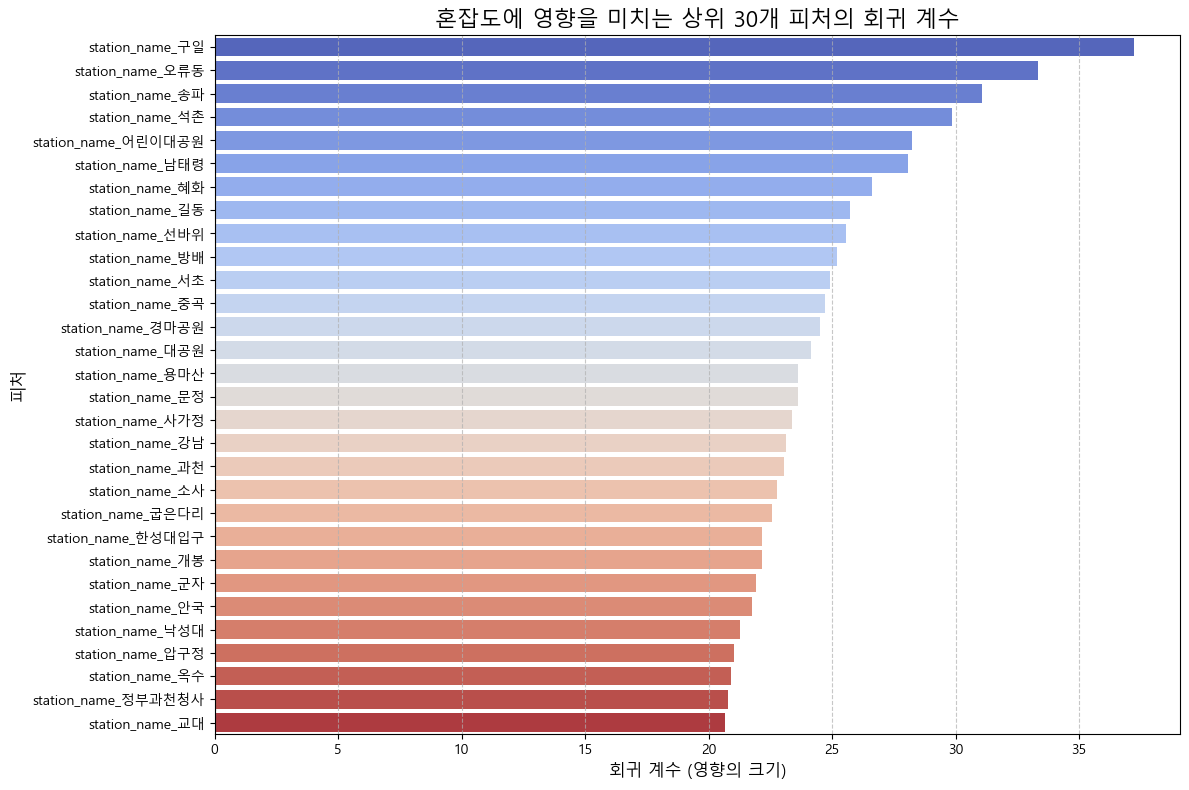

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# resultsÎäî sm.OLS().fit()Ïùò Í≤∞Í≥º Í∞ùÏ≤¥ÏûÖÎãàÎã§.
# Ïù¥Ï†ÑÏóê Ïã§ÌñâÎêú results Í∞ùÏ≤¥Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

# 1. Í≥ÑÏàò(Coef) Í∞í Ï∂îÏ∂ú
# results.paramsÎäî Í∞Å ÌîºÏ≤òÏùò Í≥ÑÏàò Í∞íÏùÑ Îã¥Í≥† ÏûàÎäî SeriesÏûÖÎãàÎã§.
coefficients = results.params.drop('const') # ÏÉÅÏàòÌï≠(const)ÏùÄ Î≥¥ÌÜµ ÏãúÍ∞ÅÌôîÏóêÏÑú Ï†úÏô∏Ìï©ÎãàÎã§.

# 2. Í≥ÑÏàò Í∞íÏùò Ï†àÎåìÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
# ÌòºÏû°ÎèÑÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÌîºÏ≤òÎì§ÏùÑ ÏÉÅÎã®Ïóê Î∞∞ÏπòÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
coefficients_to_plot = coefficients[coefficients_sorted.index] # Ï†ïÎ†¨Îêú ÏàúÏÑúÎåÄÎ°ú ÏõêÎ≥∏ Í≥ÑÏàò Í∞í Í∞ÄÏ†∏Ïò§Í∏∞

# ÏÉÅÏúÑ NÍ∞ú ÌîºÏ≤òÎßå ÏãúÍ∞ÅÌôî (ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Ïó¨Ï†ÑÌûà Î≥µÏû°Ìï† Ïàò ÏûàÏúºÎØÄÎ°ú)
# ÏòàÎ•º Îì§Ïñ¥, ÏÉÅÏúÑ 30Í∞ú ÌîºÏ≤òÎßå ÏãúÍ∞ÅÌôîÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
N_TOP_FEATURES = 30
coefficients_to_plot = coefficients_to_plot.head(N_TOP_FEATURES)

# 3. ÏãúÍ∞ÅÌôî: ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients_to_plot.values, y=coefficients_to_plot.index, palette='coolwarm')

plt.title(f'ÌòºÏû°ÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏÉÅÏúÑ {N_TOP_FEATURES}Í∞ú ÌîºÏ≤òÏùò ÌöåÍ∑Ä Í≥ÑÏàò', fontsize=16)
plt.xlabel('ÌöåÍ∑Ä Í≥ÑÏàò (ÏòÅÌñ•Ïùò ÌÅ¨Í∏∞)', fontsize=12)
plt.ylabel('ÌîºÏ≤ò', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # 0 Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
plt.tight_layout() # Í∑∏ÎûòÌîÑ ÏöîÏÜåÎì§Ïù¥ Ïûò Î≥¥Ïù¥ÎèÑÎ°ù Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()

# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú, P-Í∞íÎèÑ Ìï®Íªò ÏãúÍ∞ÅÌôîÌïòÏó¨ Ïú†ÏùòÎØ∏ÏÑ±ÏùÑ ÌëúÏãúÌï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
# ÌïòÏßÄÎßå Î™®Îì† P-Í∞íÏù¥ 0.000Ïù¥ÎùºÎ©¥, Coef Í∞í ÏãúÍ∞ÅÌôîÎßåÏúºÎ°úÎèÑ Ï∂©Î∂ÑÌï©ÎãàÎã§.


# Î™®Îç∏ÎßÅ

In [73]:
# Í∞ÑÎã®Ìïú Label Encoding
df['direction'] = df['direction'].map({'ÏÉÅÏÑ†': 0, 'ÌïòÏÑ†': 1})

Î™®Îç∏ ÏÑ±Îä•
   RMSE: 16.37
   R¬≤  : 0.386


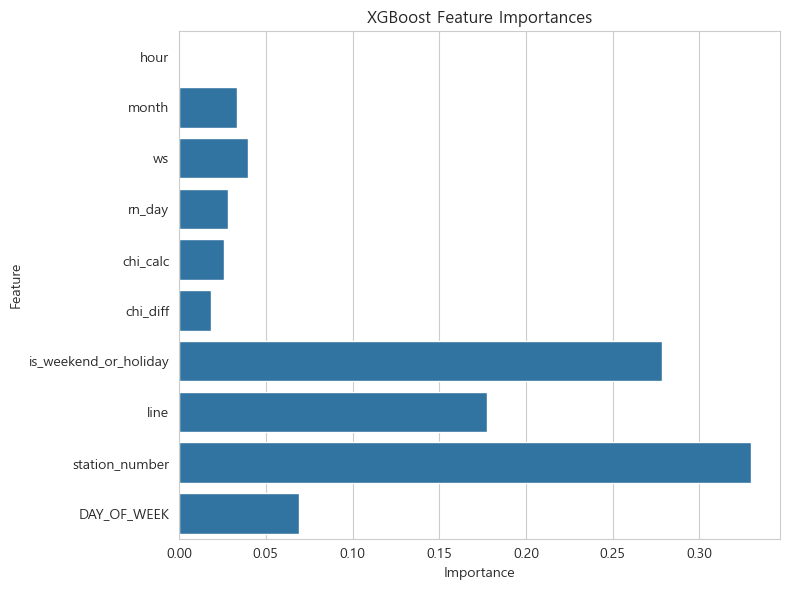

Ï†úÍ±∞Îêú ÏÉÅÏàòÌòï Ïª¨Îüº: ['hour']

‚ñ∂ VIF Í≤∞Í≥º (ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú)
                 feature       VIF
0                   line  6.990052
1            DAY_OF_WEEK  5.677588
2         station_number  5.259508
3               chi_calc  4.118419
4                  month  4.070926
5  is_weekend_or_holiday  2.874319
6                     ws  2.385876
7               chi_diff  1.381723
8                 rn_day  1.124456


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns


df['date_dt'] = pd.to_datetime(df['date_dt'])
df['year']       = df['date_dt'].dt.year
df['month']      = df['date_dt'].dt.month
df['hour']       = df['date_dt'].dt.hour
df['DAY_OF_WEEK']= df['date_dt'].dt.weekday  


df.rename(columns={'calculated_chi': 'chi_calc'}, inplace=True)
df_2023 = df[df['year'] == 2023].copy()
df_2023['chi_diff'] = df_2023['chi'] - df_2023['chi_calc']


features = [
    'hour', 'month', 'ws', 'rn_day',
    'chi_calc', 'chi_diff',
    'is_weekend_or_holiday',
    'line', 'station_number', 'DAY_OF_WEEK'
]
target = 'congestion'


df_model = df_2023[features + [target]].dropna().copy()
X, y    = df_model[features], df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


r2   = r2_score(y_test, y_pred)

print(f"Î™®Îç∏ ÏÑ±Îä•")
print(f"   RMSE: {rmse:.2f}")
print(f"   R¬≤  : {r2:.3f}")


plt.figure(figsize=(8, 6))
sns.barplot(x=model.feature_importances_, y=features, orient='h')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


X_vif = df_model[features].copy()
X_vif = X_vif.select_dtypes(include=[np.number])


X_vif.replace([np.inf, -np.inf], np.nan, inplace=True)
X_vif.fillna(0, inplace=True)


zero_var = X_vif.columns[X_vif.std() == 0].tolist()
if zero_var:
    print(f"Ï†úÍ±∞Îêú ÏÉÅÏàòÌòï Ïª¨Îüº: {zero_var}")
    X_vif.drop(columns=zero_var, inplace=True)


vif_data = pd.DataFrame({
    'feature': X_vif.columns,
    'VIF': [
        variance_inflation_factor(X_vif.values, i)
        for i in range(X_vif.shape[1])
    ]
})

print("\n‚ñ∂ VIF Í≤∞Í≥º (ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú)")
print(vif_data.sort_values('VIF', ascending=False).reset_index(drop=True))

‚Ä¢ Î™®Îì† VIFÍ∞Ä 10 ÎØ∏Îßå ‚Üí Ïã¨Ìïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÄ Ìï¥ÏÜåÎêú ÏÉÅÌÉú

‚Ä¢ hour Î≥ÄÏàòÎäî ÏÉòÌîåÎßÅ Í≥ºÏ†ïÏóêÏÑú Î∂ÑÏÇ∞Ïù¥ 0Ïù¥Ïñ¥ÏÑú Ï†úÍ±∞Îê®

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from scipy import sparse
from sklearn.metrics import mean_squared_error, r2_score


df['date_dt'] = pd.to_datetime(df['date_dt'])
df['year']  = df['date_dt'].dt.year
df['month'] = df['date_dt'].dt.month
df['hour']  = df['date_dt'].dt.hour
df['dow']   = df['date_dt'].dt.weekday

df2023 = df[df['year']==2023].copy()
df2023['chi_diff'] = df2023['chi'] - df2023['chi_calc']

features = ['hour','month','ws','rn_day','chi_calc','chi_diff',
            'is_weekend_or_holiday','line','station_number','dow']
target   = 'congestion'

dfm = df2023[features + [target]].dropna()
X, y = dfm[features], dfm[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ‚Äî Ìù¨ÏÜå ÌñâÎ†¨ Ï∂úÎ†•
numeric_feats = ['ws','rn_day','chi_calc','chi_diff']
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_feats = [
    'line','station_number',
    'is_weekend_or_holiday','month','hour','dow'
]
categorical_transformer = OneHotEncoder(
    drop='first',
    sparse_output=True,     
    handle_unknown='ignore'
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feats),
        ('cat', categorical_transformer, categorical_feats),
    ],
    sparse_threshold=0.1      # Ï†ÑÏ≤¥Í∞Ä 10% Ïù¥ÏÉÅ sparseÎ©¥ sparse matrix Ïú†ÏßÄ
)

# ÏÉòÌîåÎßÅ ÎòêÎäî RandomizedSearchCV Ï†ÅÏö©
#  - Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§ Ïì∞Î©¥ Î©îÎ™®Î¶¨ Ï¥àÍ≥ºÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
#    RandomizedSearchCV + ÏûëÏùÄ n_iter Ï†ïÎèÑÎ°ú ÏãúÎèÑÌï¥Î¥§Ïùå

pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', XGBRegressor(tree_method='hist',   
                           random_state=42))
])

param_dist = {
    'model__n_estimators':    [100, 200, 300],
    'model__max_depth':       [4, 6, 8],
    'model__learning_rate':   [0.01, 0.05, 0.1]
}

tscv = TimeSeriesSplit(n_splits=3)  # Ìè¥Îìú ÏàòÎèÑ Ï§ÑÏó¨ Î©îÎ™®Î¶¨ ÏÇ¨Ïö©Îüâ Ï†àÍ∞ê
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,                 # ÎûúÎç§Ï°∞ÏÇ¨ ÌöüÏàò Ï†úÌïú
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=4,                  # Î≥ëÎ†¨ Ïàò Ï§ÑÏù¥Í∏∞ (Î©îÎ™®Î¶¨ Ï†àÏïΩ)
    verbose=1,
    random_state=42
)

# (ÌïÑÏöîÏãú Ï†ÑÏ≤¥Í∞Ä ÏïÑÎãàÎùº ÏòàÎπÑ ÏÉòÌîå ÏÇ¨Ïö©)
# X_train_sub = X_train.sample(frac=0.3, random_state=42)
# y_train_sub = y_train.loc[X_train_sub.index]
# search.fit(X_train_sub, y_train_sub)

search.fit(X_train, y_train)

# ÏµúÏ†Å Î™®Îç∏ ÌèâÍ∞Ä
best = search.best_estimator_
y_pred = best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞:", search.best_params_)
print(f"Test RMSE: {rmse:.2f},  R¬≤: {r2:.3f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\mmtjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞: {'model__n_estimators': 300, 'model__max_depth': 8, 'model__learning_rate': 0.05}
Test RMSE: 22.68,  R¬≤: 0.025


ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©

In [76]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from xgboost import XGBRegressor


cat_cols = ['line','station_number','is_weekend_or_holiday','month','hour','dow']
te = TargetEncoder(cols=cat_cols)
X_train_te = te.fit_transform(X_train, y_train)
X_test_te  = te.transform(X_test)


num_cols = ['ws','rn_day','chi_calc','chi_diff']
scaler = StandardScaler()
X_train_te[num_cols] = scaler.fit_transform(X_train_te[num_cols])
X_test_te[num_cols]  = scaler.transform(X_test_te[num_cols])


xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    tree_method='hist',
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    early_stopping_rounds=50,
    eval_metric='rmse',
    random_state=42
)
xgb.fit(
    X_train_te, y_train,
    eval_set=[(X_test_te, y_test)],
    verbose=50
)

y_pred = xgb.predict(X_test_te)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print("XGBoost + Target Encoding")
print(f"RMSE: {rmse:.2f}, R¬≤: {r2:.3f}")

[0]	validation_0-rmse:23.17308
[50]	validation_0-rmse:22.47521
[100]	validation_0-rmse:22.39417
[150]	validation_0-rmse:22.36700
[200]	validation_0-rmse:22.34917
[250]	validation_0-rmse:22.33977
[300]	validation_0-rmse:22.33818
[350]	validation_0-rmse:22.33213
[400]	validation_0-rmse:22.32247
[450]	validation_0-rmse:22.31575
[499]	validation_0-rmse:22.30646
XGBoost + Target Encoding
RMSE: 22.31, R¬≤: 0.056


In [77]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

csv_file = 'train_df.csv'

# ÏÇ¨Ïö©ÌïòÍ≥†Ïûê ÌïòÎäî Ïª¨Îüº
desired_cols = [
    'date_dt', 'station_number', 'congestion',
    'chi', 'chi_calc', 'ws', 'rn_day',
    'is_weekend_or_holiday', 'line'
]
dtypes = {
    'ws': 'float32',
    'rn_day': 'float32',
    'station_number': 'category',
    'is_weekend_or_holiday': 'category',
    'line': 'category'
}

# Ïª¨Îüº ÌïÑÌÑ∞ÎßÅ
all_cols = pd.read_csv(csv_file, nrows=0).columns.tolist()
use_cols = [c for c in desired_cols if c in all_cols]
missing = set(desired_cols) - set(use_cols)
if missing:
    print(f"*** WARNING: {missing} Ïª¨ÎüºÏùÄ ÌååÏùºÏóê ÏóÜÏñ¥ Ï†úÏô∏Ìï©ÎãàÎã§.")
dtypes = {k: v for k, v in dtypes.items() if k in use_cols}

# DaskÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎìú
ddf = dd.read_csv(
    csv_file,
    usecols=use_cols,
    dtype=dtypes,
    parse_dates=['date_dt'] if 'date_dt' in use_cols else None,
    assume_missing=True,
    blocksize="64MB"
)

# 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
if 'date_dt' in use_cols:
    ddf = ddf[ddf.date_dt.dt.year == 2023]
    ddf['month'] = ddf.date_dt.dt.month.astype('int8')
    ddf['hour'] = ddf.date_dt.dt.hour.astype('int8')
    ddf['dow'] = ddf.date_dt.dt.weekday.astype('int8')

# ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
if 'chi' in use_cols and 'chi_calc' in use_cols:
    ddf['chi_diff'] = ddf['chi'] - ddf['chi_calc']
else:
    print("chi ÎòêÎäî chi_calc Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ chi_diffÎ•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.")
    ddf['chi_diff'] = 0.0


def make_lags(pdf):
    pdf['lag_1'] = pdf['congestion'].shift(1)
    pdf['roll_mean_3'] = pdf['congestion'].shift(1).rolling(3).mean()
    pdf['roll_mean_7'] = pdf['congestion'].shift(1).rolling(7).mean()
    return pdf

ddf = ddf.map_partitions(make_lags)

# NaN Ï†úÍ±∞ÌïòÍ≥† pandasÎ°ú Î≥ÄÌôò
features = [
    'hour', 'month', 'dow', 'ws', 'rn_day',
    'chi_calc', 'chi_diff', 'lag_1', 'roll_mean_3', 'roll_mean_7',
    'is_weekend_or_holiday', 'line', 'station_number'
]
features = [f for f in features if f in ddf.columns]
ddf_ready = ddf[features + ['congestion']].dropna()
pdf = ddf_ready.compute()
del ddf, ddf_ready
gc.collect()

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X = pdf[features]
y = pdf['congestion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


for col in ['is_weekend_or_holiday', 'line', 'station_number']:
    if col in X_train.columns:
        le = LabelEncoder()
        
        # ÌïôÏäµÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥êÏÑú Î†àÏù¥Î∏î ÌïôÏäµ
        combined_data = pd.concat([X_train[col], X_test[col]])
        le.fit(combined_data)
        
        # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
        X_train[col] = le.transform(X_train[col])
        
        # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
        X_test[col] = le.transform(X_test[col])

# Optuna ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôî
def objective(trial):
    params = {
        'tree_method': 'hist',
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'n_estimators': 200
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # RMSE Í≥ÑÏÇ∞ 
    mse = mean_squared_error(y_test, preds)  
    rmse = mse ** 0.5  
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# ÏµúÏ†Å ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ Ïû¨ÌõàÎ†®
best_params = study.best_params
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# ÌÖåÏä§Ìä∏ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = final_model.predict(X_test)

# RMSEÏôÄ R2 Í≥ÑÏÇ∞
mse = mean_squared_error(y_test, y_pred)  
rmse = mse ** 0.5  # RMSE Í≥ÑÏÇ∞
r2 = r2_score(y_test, y_pred)
print(f"ÏµúÏ¢Ö Î™®Îç∏ RMSE: {rmse:.4f}, R2: {r2:.4f}")

C:\Users\mmtjs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


*** WARNING: {'chi_calc'} Ïª¨ÎüºÏùÄ ÌååÏùºÏóê ÏóÜÏñ¥ Ï†úÏô∏Ìï©ÎãàÎã§.
chi ÎòêÎäî chi_calc Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ chi_diffÎ•º 0ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.


[I 2025-06-25 21:29:55,675] A new study created in memory with name: no-name-bb64d816-4e1c-4981-802b-506a3bf0366a
C:\Users\mmtjs\AppData\Local\Temp\ipykernel_19072\4178433197.py:106: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
C:\Users\mmtjs\AppData\Local\Temp\ipykernel_19072\4178433197.py:108: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Users\mmtjs\AppData\Local\Temp\ipykernel_19072\4178433197.py:109: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

ÏµúÏ¢Ö Î™®Îç∏ RMSE: 12.7079, R2: 0.6937


In [78]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce
import gc

csv_file = 'train_df.csv'


desired_cols = [
    'date_dt', 'line', 'station_number', 'ws', 'rn_day',
    'is_weekend_or_holiday', 'hour', 'chi', 'congestion'
]


dtypes = {
    'line': 'category',
    'station_number': 'category',
    'is_weekend_or_holiday': 'category',  
    'ws': 'float32',
    'rn_day': 'float32'
}

# Dask DataFrame Î°úÎìú
ddf = dd.read_csv(
    csv_file,
    usecols=desired_cols,
    dtype=dtypes,
    parse_dates=['date_dt'],
    blocksize="64MB"  # Î∏îÎ°ù ÌÅ¨Í∏∞ ÏßÄÏ†ï
)


ddf = ddf.categorize(columns=['is_weekend_or_holiday'])
ddf = ddf[ddf.date_dt.dt.year == 2023]

# ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
# dow(ÏöîÏùº Ï†ïÎ≥¥): 0=ÏõîÏöîÏùº, 6=ÏùºÏöîÏùº
ddf['dow'] = ddf['date_dt'].dt.dayofweek.astype('int8')

# Ï∂îÍ∞Ä ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
ddf['chi_x_hour'] = ddf['chi'] * ddf['hour']
ddf['chi_x_is_weekend_or_holiday'] = ddf['chi'] * ddf['is_weekend_or_holiday'].cat.codes

# chi_diff Í∏∞Î≥∏Í∞í ÏÑ§Ï†ï
ddf['chi_diff'] = 0.0

# Lag Î∞è Rolling Ï∂îÍ∞Ä Ìï®Ïàò Ï†ïÏùò
def make_lags(df):
    """Î≥ëÎ†¨ ÌååÌã∞ÏÖò ÎÇ¥ÏóêÏÑú lag Î∞è rolling Í∞í Ï∂îÍ∞Ä"""
    df['lag_1'] = df['congestion'].shift(1)
    df['roll_mean_3'] = df['congestion'].shift(1).rolling(3).mean()
    df['roll_mean_7'] = df['congestion'].shift(1).rolling(7).mean()
    return df

# Lag Î∞è Rolling Í∞í Í≥ÑÏÇ∞
ddf = ddf.map_partitions(make_lags)

# ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò Ï†ïÏùò
features = [
    'line', 'station_number', 'dow', 'hour', 'ws', 'rn_day',
    'chi', 'chi_diff', 'lag_1', 'roll_mean_3', 'roll_mean_7',
    'is_weekend_or_holiday', 'chi_x_hour', 'chi_x_is_weekend_or_holiday'
]

# Ï≤òÎ¶¨ Í≤∞Í≥ºÏóêÏÑú ÌïÑÏöîÌïú Ïó¥ Ï∂îÏ∂ú Î∞è Í≤∞Ï∏°Í∞í Ï†úÍ±∞
ddf_ready = ddf[features + ['congestion']].dropna()

# Dask ‚Üí Pandas Î≥ÄÌôò
pdf = ddf_ready.compute()
del ddf, ddf_ready  # Î©îÎ™®Î¶¨ Í¥ÄÎ¶¨
gc.collect()

# ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉùÏÑ±
def classify_congestion(value):
    """ÌòºÏû°ÎèÑÎ•º Low, Moderate, HighÎ°ú Î∂ÑÎ•ò"""
    if value < 30:
        return 0
    elif value < 60:
        return 1
    else:
        return 2

# ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉùÏÑ±
pdf['congestion_class'] = pdf['congestion'].apply(classify_congestion)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X = pdf[features]
y = pdf['congestion_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
categorical_cols = ['line', 'station_number', 'is_weekend_or_holiday']
encoder = ce.TargetEncoder(cols=categorical_cols)
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

# Ïä§ÏºÄÏùºÎßÅ Ï≤òÎ¶¨
scaler = StandardScaler()
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = logreg.predict(X_test)

# Î™®Îç∏ ÏÑ±Îä• Ï∂úÎ†•
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8305634350605694
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91    677602
           1       0.71      0.70      0.71    302751
           2       0.71      0.44      0.54     71250

    accuracy                           0.83   1051603
   macro avg       0.77      0.69      0.72   1051603
weighted avg       0.82      0.83      0.83   1051603

Confusion Matrix
[[630191  47228    183]
 [ 77960 212136  12655]
 [  2307  37847  31096]]


In [79]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_prob = logreg.predict_proba(X_test)
y_pred_soft = np.argmax(y_pred_prob, axis=1)

# R2 Í∞í Í≥ÑÏÇ∞
r2 = r2_score(y_test, y_pred_soft)
print("R¬≤ (R-squared):", r2)

# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(y_test, y_pred_soft))
print("RMSE (Root Mean Squared Error):", rmse)

R¬≤ (R-squared): 0.5349807180401422
RMSE (Root Mean Squared Error): 0.42016664083066885


In [89]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
import gc

csv_file = 'train_df.csv'


desired_cols = [
    'date_dt', 'line', 'station_number', 'ws', 'rn_day',
    'is_weekend_or_holiday', 'hour', 'chi', 'congestion'
]


dtypes = {
    'line': 'category',
    'station_number': 'category',
    'is_weekend_or_holiday': 'category',
    'ws': 'float32',
    'rn_day': 'float32'
}


ddf = dd.read_csv(
    csv_file,
    usecols=desired_cols,
    dtype=dtypes,
    parse_dates=['date_dt'],
    blocksize="64MB"  # Î∏îÎ°ù ÌÅ¨Í∏∞ ÏßÄÏ†ï
)


ddf = ddf.categorize(columns=['is_weekend_or_holiday'])
ddf = ddf[ddf.date_dt.dt.year == 2023]  


# ÏöîÏùº Ï†ïÎ≥¥
ddf['dow'] = ddf['date_dt'].dt.dayofweek.astype('int8')
ddf['chi_x_hour'] = ddf['chi'] * ddf['hour']
ddf['chi_x_is_weekend_or_holiday'] = ddf['chi'] * ddf['is_weekend_or_holiday'].cat.codes
ddf['chi_diff'] = 0.0  

# Lag Î∞è Rolling Ìï®Ïàò Ï†ïÏùò
def make_lags(df):
    """Î≥ëÎ†¨ ÌååÌã∞ÏÖò ÎÇ¥ÏóêÏÑú lag Î∞è rolling Í∞í Ï∂îÍ∞Ä"""
    df['lag_1'] = df['congestion'].shift(1)
    df['roll_mean_3'] = df['congestion'].shift(1).rolling(3).mean()
    df['roll_mean_7'] = df['congestion'].shift(1).rolling(7).mean()
    return df

# Lag Î∞è Rolling Í∞í Í≥ÑÏÇ∞
ddf = ddf.map_partitions(make_lags)


# ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò Ï†ïÏùò
features = [
    'line', 'station_number', 'dow', 'hour', 'ws', 'rn_day', 'chi',
    'chi_diff', 'lag_1', 'roll_mean_3', 'roll_mean_7',
    'is_weekend_or_holiday', 'chi_x_hour', 'chi_x_is_weekend_or_holiday'
]

# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù Î∞è Í≤∞Ï∏°Í∞í Ï†úÍ±∞
ddf_ready = ddf[features + ['congestion']].dropna()
pdf = ddf_ready.compute()  # Dask ‚Üí Pandas Î≥ÄÌôò
del ddf, ddf_ready  # Î©îÎ™®Î¶¨ Í¥ÄÎ¶¨
gc.collect()


def classify_congestion(value):
    """ÌòºÏû°ÎèÑÎ•º Low, Moderate, HighÎ°ú Î∂ÑÎ•ò"""
    if value < 30:
        return 0
    elif value < 60:
        return 1
    else:
        return 2

# ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉùÏÑ±
pdf['congestion_class'] = pdf['congestion'].apply(classify_congestion)


X = pdf[features]
y = pdf['congestion_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ['line', 'station_number', 'is_weekend_or_holiday']

# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ ÌÉÄÍ≤ü Ïù∏ÏΩîÎî©
encoder = ce.TargetEncoder(cols=categorical_cols)
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


# ÏòàÏ∏° ÏàòÌñâ
y_pred = logreg.predict(X_test)

# ÌÅ¥ÎûòÏä§ ‚Üí Ïã§Ï†ú ÌòºÏû°ÎèÑ Ï†êÏàòÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def map_to_congestion(value):
    """Î∂ÑÎ•ò Í∞íÏùÑ congestion Ï†êÏàòÎ°ú Îß§Ìïë"""
    if value == 0:
        return 15
    elif value == 1:
        return 45
    else:
        return 75

# ÏòàÏ∏°Îêú Í∞íÏùÑ Ïã§Ï†ú ÌòºÏû°ÎèÑ Ï†êÏàòÎ°ú Î≥ÄÌôò
test_predictions = pd.Series(y_pred).apply(map_to_congestion)


# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Í≥º Ï∂îÍ∞Ä
submission = X_test.copy()  # Í∏∞Ï°¥ ÌîºÏ≤ò Ìè¨Ìï® 
submission['congestion'] = test_predictions  # ÏµúÏ¢Ö 'congestion' Ïª¨Îüº Ï∂îÍ∞Ä

# Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû• (congestion Ïª¨ÎüºÎßå Ìè¨Ìï®ÌïòÎèÑÎ°ù Î≥ÄÌôò)
submission[['congestion']].to_csv("submission.csv", index=False)
print("submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!")

submission.csv ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å!
